In [ ]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from netCDF4 import Dataset
from netCDF4 import num2date
from mpl_toolkits.basemap import Basemap
import mpl_toolkits.basemap as basemap
import getpass

# Humboldt

## Leer datos crudos (ARGO)

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/ARGO/Humboldt/Core/'

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/ARGO/Humboldt/Core


In [ ]:
import datetime as dt
ds_final=pd.read_csv('df_T_S_final.csv',sep=',')
ds_final['Fecha']=pd.to_datetime(ds_final['Fecha'])
ds_final['Year']= ds_final['Fecha'].dt.year
ds_final['Month']= ds_final['Fecha'].dt.month
ds_final['Day']= ds_final['Fecha'].dt.day
print(ds_final.shape)
ds_final.head()

(9995740, 14)


Fecha     Lon     Lat  Pres  Pres_Adj       Temp   Temp_Adj  \
0 2003-12-05 13:47:36 -84.805 -20.431   7.5       7.5  19.789000  19.789000   
1 2003-12-05 13:47:36 -84.805 -20.431  17.5      17.5  19.788000  19.788000   
2 2003-12-05 13:47:36 -84.805 -20.431  27.5      27.5  19.783001  19.783001   
3 2003-12-05 13:47:36 -84.805 -20.431  37.5      37.5  19.523001  19.523001   
4 2003-12-05 13:47:36 -84.805 -20.431  47.5      47.5  18.490999  18.490999   

         Sal    Sal_Adj  Ciclo       Id  Year  Month  Day  
0  35.206001  35.237999      2  3900174  2003     12    5  
1  35.205002  35.237000      2  3900174  2003     12    5  
2  35.202000  35.234001      2  3900174  2003     12    5  
3  35.192001  35.223999      2  3900174  2003     12    5  
4  35.085999  35.118000      2  3900174  2003     12    5

In [ ]:
print(ds_final.shape)
df_perfil= ds_final[['Fecha','Lon','Lat','Ciclo','Month']]
df_perfil = df_perfil.drop_duplicates(subset = ['Fecha','Lon','Lat','Ciclo','Month'])
print(df_perfil.shape)
df_perfil.head()

(9995740, 14)
(20078, 5)


Fecha        Lon        Lat  Ciclo  Month
0   2003-12-05 13:47:36 -84.805000 -20.431000      2     12
43  2003-12-01 13:33:45 -77.944000 -20.054001      1     12
87  2003-12-11 14:45:17 -78.084999 -20.132000      2     12
131 2003-12-21 14:17:48 -78.334999 -20.164000      3     12
174 2003-12-01 13:35:40 -81.128998 -20.118999      1     12

In [ ]:
# Conteos por mes
for i in range(1,13,1):
  mes= df_perfil[df_perfil.Month == i]
  print('Mes: ',i, len(mes.Ciclo.unique()))

Mes:  1 253
Mes:  2 242
Mes:  3 256
Mes:  4 254
Mes:  5 252
Mes:  6 246
Mes:  7 250
Mes:  8 267
Mes:  9 298
Mes:  10 308
Mes:  11 308
Mes:  12 283


In [ ]:
# Funcion para sacar el numero de perfiles por cada mes
import numpy as np
import matplotlib.pyplot as plt
def cantidad_perfiles_mes(data):
  x = data.Lon;y = data.Lat;
  # Creacion de la grilla
  gridx = np.arange(-85,-70+1,1) # valores de lon
  #print(gridx.shape);print(gridx);
  gridy = np.arange(-45,-15+1,1)
  #print(gridy.shape);print(gridy);
  grid, _, _ = np.histogram2d(x, y, bins=[gridx, gridy]);
  #print(grid.shape)
  # Ponerlo en el mismo sentido para que quede alineado con Chile
  grid1=np.flip(grid.T, axis=0) # Izquierda°-85W , derecha -70°W, arriba -15°S, abajo -45°S
  x1= np.arange(-85+0.5, -70+0.5,1);y1= list(np.arange(-45+0.5,-15+0.5,1));y1=y1[::-1];y1= np.array(y1);
  #print(x1.shape);print(y1.shape)
  # Reemplazar 0 por nan
  grid1[grid1 == 0] = np.nan
  return grid1

In [ ]:
lista_conteos=[]
for j in range(1,13,1):
  lista_conteos.append(cantidad_perfiles_mes(df_perfil[df_perfil.Month == j]))

In [ ]:
lista_conteos[0].shape

(30, 15)

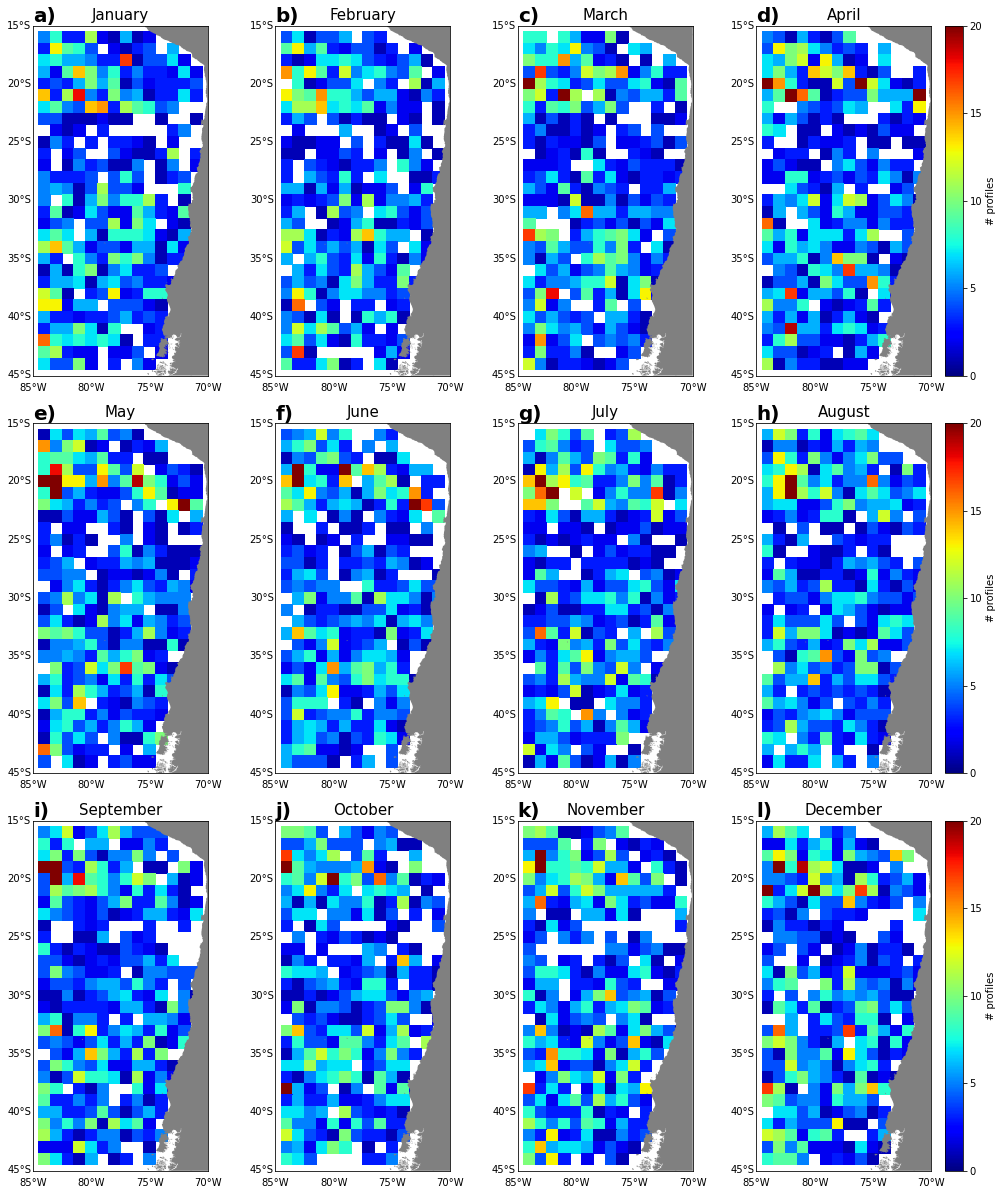

In [ ]:
import string
ticks= np.array([0,5,10,15,20]) #labels para el colorbar
x1= np.arange(-85+0.5, -70+0.5,1);y1= list(np.arange(-45+0.5,-15+0.5,1));y1=y1[::-1];y1= np.array(y1);
w=0.23;h=0.22
meses=['January','February','March','April','May','June','July','August','September','October','November','December']
# atributos [left, bottom, width,height] en escala (0,1)
list_o=[[0,0.9,w,h],[0.2,0.9,w,h],[0.4,0.9,w,h],[0.6,0.9,w,h],
        [0,0.65,w,h],[0.2,0.65,w,h],[0.4,0.65,w,h],[0.6,0.65,w,h],
        [0,0.4,w,h],[0.2,0.4,w,h],[0.4,0.4,w,h],[0.6,0.4,w,h],]
fig = plt.figure(figsize=(3.3*5.1,4.7*4.7)) # tamaño de figura
for i,j in zip(list_o,range(len(lista_conteos))):
  ax = plt.axes(i)
  ax.text(0.,1.01,string.ascii_lowercase[j]+')',fontsize=20, fontweight = 'bold', transform = ax.transAxes)
  ax.set_title(meses[j], fontsize=15)
  m=Basemap(projection='cyl',llcrnrlon=-85,llcrnrlat=-45,urcrnrlon=-70,urcrnrlat=-15, resolution ='h')
  x, y = m(x1, y1)
  z= lista_conteos[j]
  cmap= plt.get_cmap("jet")
  cs=m.pcolormesh(x1, y1, z,cmap='jet',shading='flat',latlon=True,vmin=0, vmax=20)
  m.drawcoastlines(color='white',zorder=0)
  m.fillcontinents(color='grey',lake_color='grey')
  m.drawparallels(np.arange(-45,-14,5.),labels=[1,0,0,0],linewidth=0.0)
  m.drawmeridians([-85,-80,-75,-70],labels=[0,0,0,1],linewidth=0.0)
  if j in [3,7,11]:
    cbar=plt.colorbar(ticks=ticks)
    cbar.set_label('# profiles', rotation=90)

In [ ]:
z.shape

(30, 15)

## Leer datos Producto reanalisis

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/GLOBAL_REANALYSIS_PHY_SSS/Humboldt/Data_anual/'
reanal=xr.open_dataset('GLOBAL_REANALYSIS_PHY_SSS.nc').groupby("time.month").mean()
reanal

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/GLOBAL_REANALYSIS_PHY_SSS/Humboldt/Data_anual


<xarray.Dataset>
Dimensions:  (lat: 121, lon: 61, month: 12)
Coordinates:
  * lon      (lon) float32 275.0 275.2 275.5 275.8 ... 289.2 289.5 289.8 290.0
  * lat      (lat) float32 -45.0 -44.75 -44.5 -44.25 ... -15.5 -15.25 -15.0
    depth    float32 0.5058
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    SSS      (month, lat, lon) float32 33.97 33.97 33.97 33.96 ... nan nan nan

**Filtro de 0 -100 dbar** (ARGO)

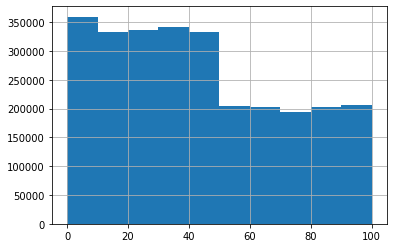

In [ ]:
ds_final = ds_final[ds_final['Pres_Adj']< 100]
ds_final.Pres_Adj.hist()

In [ ]:
# crear dataframes para cada mes a analizar, agrupar y sacar la media para evitar duplicados
lista_dfs=[]
for i in range(12):
  mes_i= ds_final[ds_final.Month == i+1]
  mes_i=mes_i[['Lon','Lat','Pres_Adj','Sal_Adj','Ciclo','Id']].groupby(by=['Lon','Lat','Ciclo','Pres_Adj','Id']).mean()
  mes_i=mes_i.reset_index()
  print('Mes: ', i+1, '- Dimension:',mes_i.shape)
  lista_dfs.append(mes_i)

Mes:  1 - Dimension: (84802, 6)
Mes:  2 - Dimension: (83012, 6)
Mes:  3 - Dimension: (88687, 6)
Mes:  4 - Dimension: (110158, 6)
Mes:  5 - Dimension: (127543, 6)
Mes:  6 - Dimension: (124662, 6)
Mes:  7 - Dimension: (122064, 6)
Mes:  8 - Dimension: (116406, 6)
Mes:  9 - Dimension: (116353, 6)
Mes:  10 - Dimension: (121817, 6)
Mes:  11 - Dimension: (131148, 6)
Mes:  12 - Dimension: (118650, 6)


In [ ]:
lista_dfs[0] # ejemplo de dataframe para Enero (indice empieza en 0)

Lon     Lat  Ciclo   Pres_Adj       Id    Sal_Adj
0     -84.998 -30.865    144   5.500000  3900224  34.922234
1     -84.998 -30.865    144   9.000000  3900224  34.921673
2     -84.998 -30.865    144  15.000000  3900224  34.933846
3     -84.998 -30.865    144  21.000000  3900224  34.925144
4     -84.998 -30.865    144  27.000000  3900224  34.920818
...       ...     ...    ...        ...      ...        ...
84797 -70.538 -19.062     78  90.129997  3901259  34.924000
84798 -70.538 -19.062     78  92.129997  3901259  34.923000
84799 -70.538 -19.062     78  94.129997  3901259  34.924999
84800 -70.538 -19.062     78  96.129997  3901259  34.928001
84801 -70.538 -19.062     78  98.129997  3901259  34.935001

[84802 rows x 6 columns]

## Ejemplo de prueba para un mes (Interpolacion vertical Akima)

------------------------------------
Id : 3900224
Ciclo 144 ......................... Check
Ciclo 146 ......................... Check
Ciclo 147 ......................... Check
Ciclo 32 ......................... Check
Ciclo 31 ......................... Check
Ciclo 108 ......................... Check
Ciclo 30 ......................... Check
Ciclo 107 ......................... Check
Ciclo 106 ......................... Check
Ciclo 185 ......................... Check
Ciclo 184 ......................... Check
Ciclo 183 ......................... Check
Ciclo 68 ......................... Check
Ciclo 69 ......................... Check
Ciclo 70 ......................... Check
Ciclo 223 ......................... Check
Ciclo 222 ......................... Check
Ciclo 221 ......................... Check


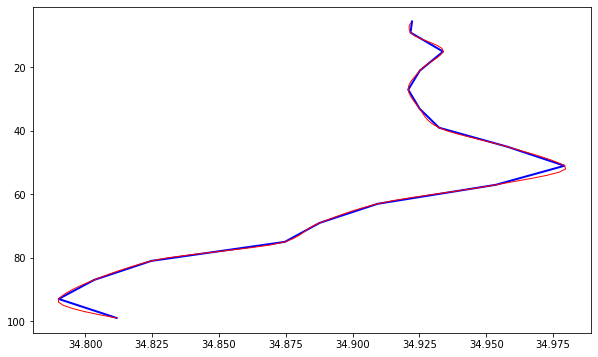

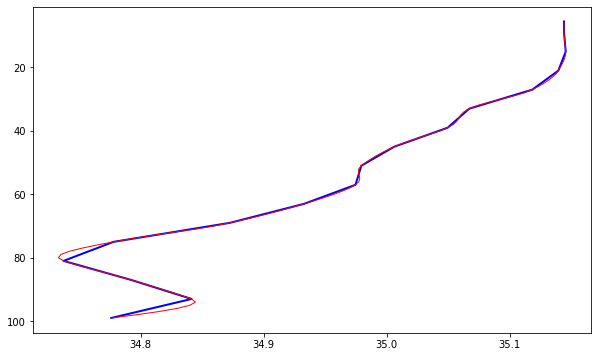

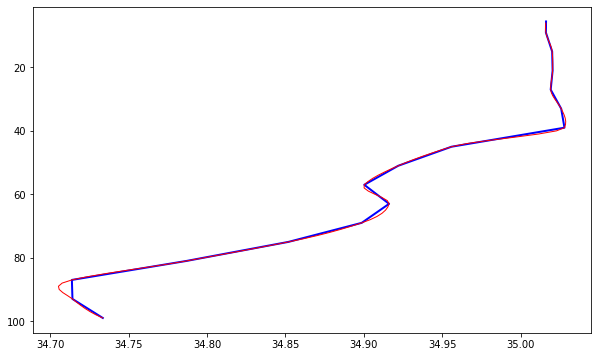

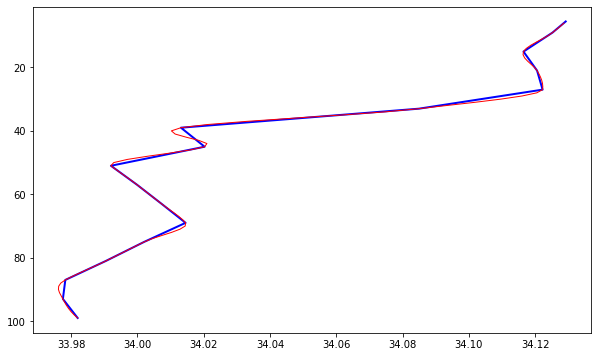

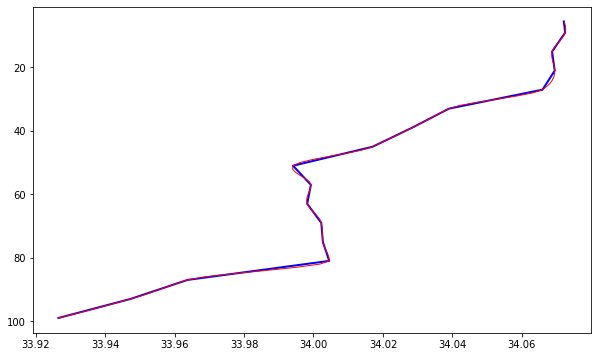

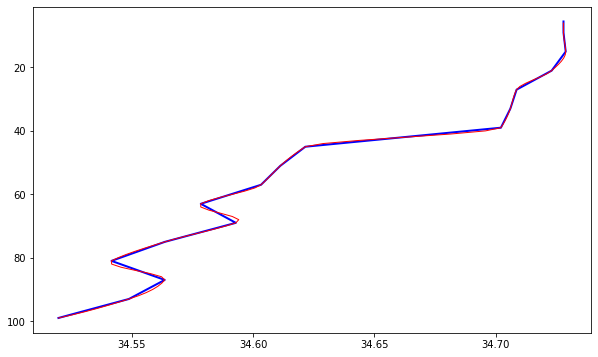

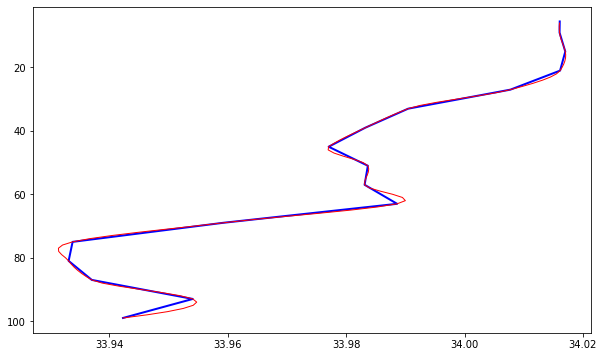

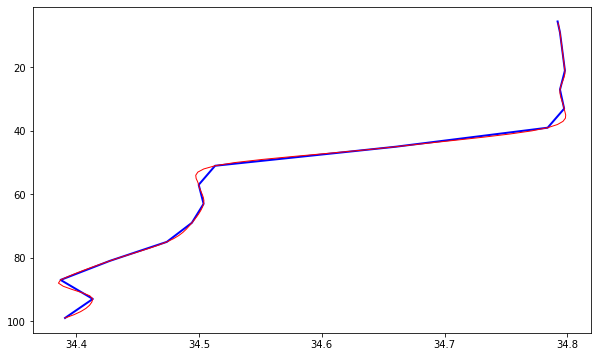

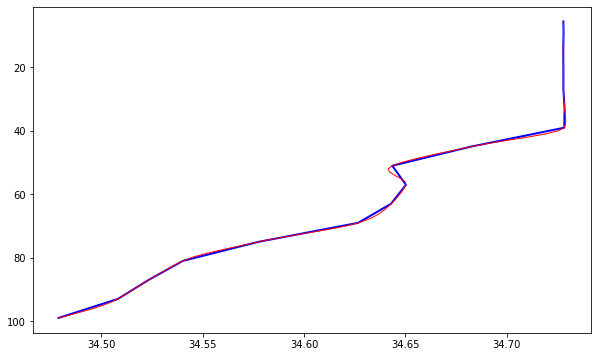

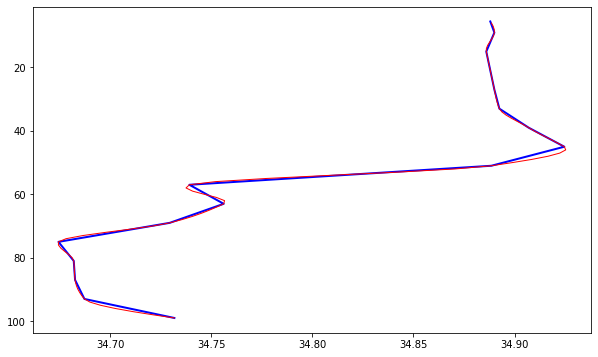

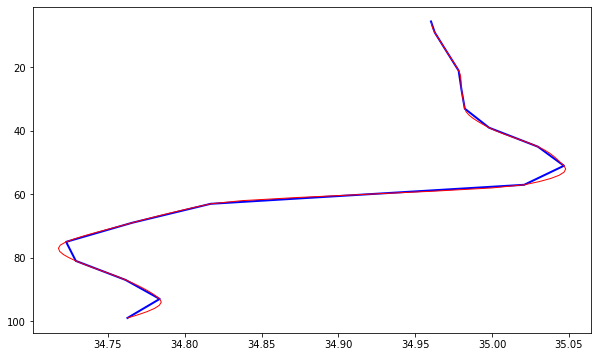

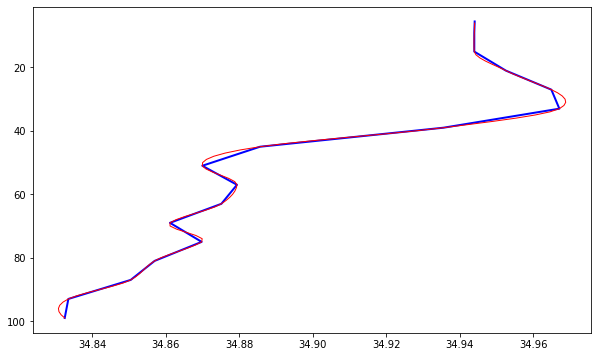

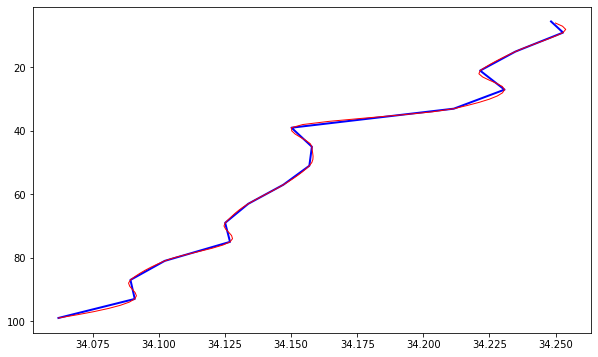

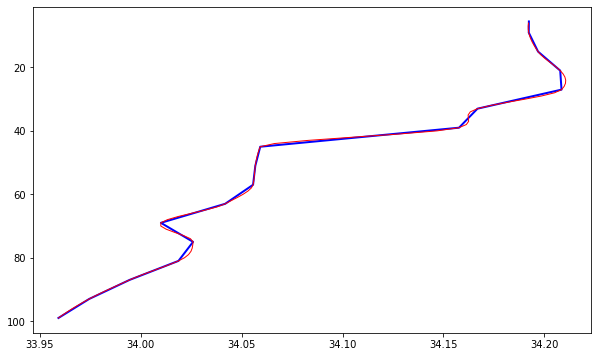

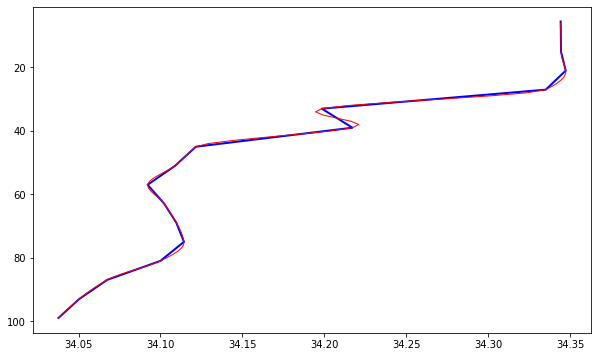

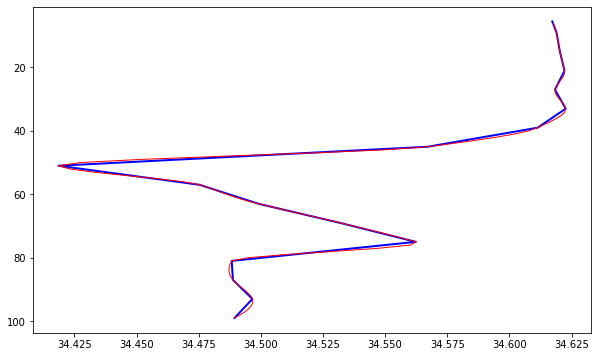

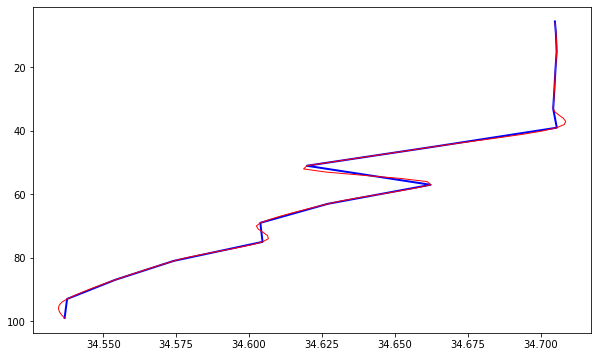

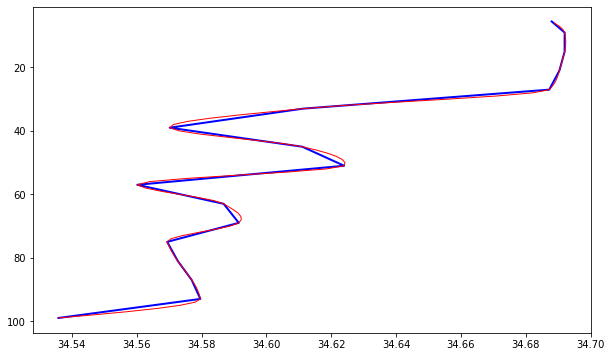

In [ ]:
import scipy.interpolate
from scipy.interpolate import interp1d
from scipy.interpolate import Akima1DInterpolator
import math
import warnings
from itertools import repeat
warnings.filterwarnings("ignore") # Ignorar warnings
enero= lista_dfs[0]
############################################################################################################33
ids= list(enero.Id.unique()) # Ids unicos del dataframe
ciclos= list(enero.Ciclo.unique()) # ciclos unicos del dataframe
dfs= [] # Lista donde voy a almacener cada uno de los dataframes resultantes de la interpolacion
# Creacion de ciclo for para hacer interpolacion
for i in ids[0:1]: # Iterar solo el primer elemento (al final seria 0:len(ids))
  print('------------------------------------')
  print('Id :',i)
  #print('Ciclos disponibles:', ds_3D_m[ds_3D_m['Id']==i].Ciclo.unique()) # Solo para ver los ciclos del primer id
  ciclos=enero[enero['Id']==i].Ciclo.unique()
  for j in ciclos:
    print('Ciclo',j,'......................... Check')
    # Filtro del id y ciclo respectivo
    ds= enero[(enero['Id']==i) & (enero['Ciclo']==j)] # Variable local (se sobre escribe cada vez)
    # Hacer el subset entre 0 y 2000 dbar para que no haya problemas de consistencia
    ds= ds[(ds['Pres_Adj']>=0) &(ds['Pres_Adj']<=100)] # Importante para que todos los valores queden entre 0 y 2000 dbar
    #print(ds) # Si se quiere ver el dataframe original
    # Extraer presion, temperatura y salinidad
    pres= ds.Pres_Adj; S= ds.Sal_Adj; # Variables locales otra vez
    # Objetos interpoladores de Salinidad y Temperatura
    # Caso 1: Spline (Espero que de mejor)
    spline_S= Akima1DInterpolator(pres,S) # Mejor metodo que encontre
    # Ahora se hace la interpolacion entre el rango de valores de presion:
    min_pres= math.floor(np.min(pres));max_pres= math.ceil(np.max(pres))
    # Crear la secuencia de valores entre el minimo y maximo encontrado en el perfil para interpolar
    pres_new= np.arange(min_pres,max_pres+1,1)
    # Interpolar T y S con (Metodo: Splines)
    S_new=spline_S(pres_new)
    #################################################################
    # Nueva grafica
    plt.figure(figsize=(10,6))
    plt.plot(ds.Sal_Adj,ds.Pres_Adj,color='b',linewidth=2)
    plt.plot(S_new,pres_new,color='r',linewidth=1)
    plt.gca().invert_yaxis()
    #################################################################
     # Crear el dataframe para cada perfil
    df_ts=pd.DataFrame();
    # Agregar lat y lon, id y ciclo automatica
    lat_0=ds.Lat.reset_index(drop=True);lon_0=ds.Lon.reset_index(drop=True);id_0=ds.Id.reset_index(drop=True);ciclo_0=ds.Ciclo.reset_index(drop=True)  
    # Valores de 0 a 2000 dbar espaciados cada 1 dbar
    df_ts['Presion_interp']=np.arange(0,100+1,1)
    df_ts['Lon']= np.repeat(lon_0[0],101);df_ts['Lat']= np.repeat(lat_0[0],101)
    df_ts['Id']= np.repeat(id_0[0],101);df_ts['Ciclo']= np.repeat(ciclo_0[0],101);
    df_ts['S_interp']=np.nan; df_ts['S_interp'][min_pres:max_pres+1]= S_new;
    #print(df_ts)
    # Concatenar todos los dataframes en dfs
    dfs.append(df_ts)

## Creacion de funcion para generalizar

In [ ]:
import scipy.interpolate
from scipy.interpolate import interp1d
from scipy.interpolate import Akima1DInterpolator
import math
import warnings
from itertools import repeat
warnings.filterwarnings("ignore") # Ignorar warnings
def interpolador_capas(dataframe, max_depth, intervalo):
  '''
  dataframe= pandas dataframe con columnas Lon, Lat,ciclo, Pres_adj, Id, Variable
  max_depth= valor entero de profundidad maxima a interpolar
  intervalo= intervalo de profundidad en m para interpolacion
  '''
  # Enfocarme en estas profundidades
  lista_prof = list(np.arange(0,max_depth+1,intervalo)) # Intervalos de 5m para extraer capas
  ############################################################################################################33
  ds_3D_m=dataframe
  ids= list(ds_3D_m.Id.unique()) # Ids unicos del dataframe
  ciclos= list(ds_3D_m.Ciclo.unique()) # ciclos unicos del dataframe
  dfs= [] # Lista donde voy a almacener cada uno de los dataframes resultantes de la interpolacion
  for i in ids: 
    # Iterar solo el primer elemento (al final seria 0:len(ids))
    #print('------------------------------------')
    #print('Id :',i,'................... Check')
    #print('Ciclos disponibles:', ds_3D_m[ds_3D_m['Id']==i].Ciclo.unique()) # Solo para ver los ciclos del primer id
    ciclos=ds_3D_m[ds_3D_m['Id']==i].Ciclo.unique()
    for j in ciclos:
      #print('Ciclo',j,'......................... Check')
      # Filtro del id y ciclo respectivo
      ds= ds_3D_m[(ds_3D_m['Id']==i) & (ds_3D_m['Ciclo']==j)] # Variable local (se sobre escribe cada vez)
      # Hacer el subset entre 0 y 2000 dbar para que no haya problemas de consistencia
      ds= ds[(ds['Pres_Adj']>=0) &(ds['Pres_Adj']<=max_depth)] # Importante para que todos los valores queden entre 0 y 2000 dbar
      # Extraer presion, temperatura y salinidad
      pres= ds.Pres_Adj;S= ds.Sal_Adj; # Variables locales otra vez
      # Objetos interpoladores de Salinidad y Temperatura
      # Caso 1: Spline (Espero que de mejor)
      try:
        spline_S= Akima1DInterpolator(pres,S) # Mejor metodo que encontre
        # Ahora se hace la interpolacion entre el rango de valores de presion:
        min_pres= math.floor(np.min(pres));max_pres= math.ceil(np.max(pres))
        # Crear la secuencia de valores entre el minimo y maximo encontrado en el perfil para interpolar
        pres_new= np.arange(min_pres,max_pres+1,1)
        S_new=spline_S(pres_new)# Interpolar T y S con (Metodo: Splines)
        df_ts=pd.DataFrame();# Crear el dataframe para cada perfil
        # Agregar lat y lon, id y ciclo automatica
        lat_0=ds.Lat.reset_index(drop=True);lon_0=ds.Lon.reset_index(drop=True);id_0=ds.Id.reset_index(drop=True);ciclo_0=ds.Ciclo.reset_index(drop=True)  
        df_ts['Presion_interp']=np.arange(0,max_depth+1,1)
        df_ts['Lon']= np.repeat(lon_0[0],max_depth+1);df_ts['Lat']= np.repeat(lat_0[0],max_depth+1)
        df_ts['Id']= np.repeat(id_0[0],max_depth+1);df_ts['Ciclo']= np.repeat(ciclo_0[0],max_depth+1);
        df_ts['S_interp']=np.nan;df_ts['S_interp'][min_pres:max_pres+1]= S_new;
        # Hacer el subset a las profundidades deseadas
        df_ts= df_ts[df_ts['Presion_interp'].isin(lista_prof)]
        dfs.append(df_ts)# Concatenar todos los dataframes en dfs
      except:
        print('Intento fallido en Id:',i, 'Ciclo',j)
        pass
  # Interpolar para llenar la capa superficial
  dfs_final=[]
  for i in dfs:
    try:
      data_f= i.interpolate(method='spline', order=1,limit_direction='backward')
      dfs_final.append(data_f)# Agregar los dataframes
    except:
      dfs_final.append(i)
  print('Tamaño de los dataframes generados :',len(dfs_final))
  df_final= pd.concat(dfs_final)
  # Agrupar por cada Lat, Lon y Presion sacando la media que no tiene en cuenta los nan
  df_final=df_final[['Presion_interp','Lon','Lat','S_interp']].groupby(by=['Lon','Lat','Presion_interp']).mean().reset_index()
  print(df_final.shape)
  return df_final

## Validacion-Enero 

In [ ]:
enero= interpolador_capas(dataframe= lista_dfs[0], max_depth= 100, intervalo=1)
enero

In [ ]:
np.arange(-85+0.5,-70+0.5,1).shape,np.arange(-45+0.5, -15+0.5,1).shape

((15,), (30,))

In [ ]:
import scipy
from scipy.interpolate import griddata
ds_final= enero #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_jan = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(-85+0.5,-70+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(-45+0.5, -15+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0=griddata(points,values, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur-Norte
  grid_z0_1=np.flip(grid_z0, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_jan.append(grid_z0_1)
datos_jan = np.stack(datos_jan)
#print(datos)
print(datos_jan.shape) 

(100, 30, 15)


(30, 15)


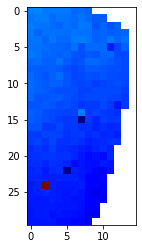

In [ ]:
print(np.mean(datos_jan[0:2,:,:], axis=0).shape)
plt.imshow(np.mean(datos_jan[0:2,:,:], axis=0),cmap='jet')

In [ ]:
x1= np.arange(-85+0.5, -70+0.5,1)
y1= list(np.arange(-45+0.5, -15+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
SST_jan=basemap.interp(datain=reanal.sel(month=1).SSS.values, xin=reanal.sel(month=1).lon.values-360,
                       yin=reanal.sel(month=1).lat.values,xout=X_t, yout=Y_t, order=1, masked= True)

In [ ]:
print(SST_jan.shape)
plt.imshow(SST_jan,cmap='jet')

In [ ]:
# Diferencia entre modelo y ARGO
plt.imshow(SST_jan-np.mean(datos_jan[0:2,:,:], axis=0),cmap='jet')

## Validacion-Febrero

In [ ]:
febrero= interpolador_capas(dataframe= lista_dfs[1], max_depth= 100, intervalo=1)
febrero

Intento fallido en Id: 3900491 Ciclo 14
Intento fallido en Id: 3901068 Ciclo 106
Intento fallido en Id: 3900185 Ciclo 10
Intento fallido en Id: 3900184 Ciclo 10
Intento fallido en Id: 3900530 Ciclo 0
Intento fallido en Id: 3900496 Ciclo 11
Intento fallido en Id: 3900496 Ciclo 12
Intento fallido en Id: 3900496 Ciclo 13
Intento fallido en Id: 4900512 Ciclo 24
Intento fallido en Id: 4900512 Ciclo 22
Intento fallido en Id: 4900512 Ciclo 23
Intento fallido en Id: 3900495 Ciclo 11
Intento fallido en Id: 3900495 Ciclo 12
Intento fallido en Id: 3900495 Ciclo 13
Intento fallido en Id: 4900513 Ciclo 24
Intento fallido en Id: 4900513 Ciclo 23
Intento fallido en Id: 4900513 Ciclo 22
Tamaño de los dataframes generados : 1469
(148369, 4)


Lon       Lat  Presion_interp   S_interp
0      -84.98703 -18.00377               0  35.470583
1      -84.98703 -18.00377               1  35.469409
2      -84.98703 -18.00377               2  35.471001
3      -84.98703 -18.00377               3  35.470967
4      -84.98703 -18.00377               4  35.471324
...          ...       ...             ...        ...
148364 -70.63400 -21.38400              96  34.777532
148365 -70.63400 -21.38400              97  34.769654
148366 -70.63400 -21.38400              98  34.760252
148367 -70.63400 -21.38400              99  34.750812
148368 -70.63400 -21.38400             100        NaN

[148369 rows x 4 columns]

In [ ]:
%%time
import scipy
from scipy.interpolate import griddata
# Coordenadas para grafica
ds_final= febrero #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_feb = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(-85+0.5,-70+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(-45+0.5, -15+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0=griddata(points,values, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur -Norte
  grid_z0_1=np.flip(grid_z0, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_feb.append(grid_z0_1)
datos_feb = np.stack(datos_feb)
#print(datos)
print(datos_feb.shape) 

(100, 30, 15)
CPU times: user 2.86 s, sys: 2.6 s, total: 5.46 s
Wall time: 2.81 s


(30, 15)


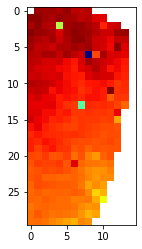

In [ ]:
print(np.mean(datos_feb[0:2,:,:], axis=0).shape)
plt.imshow(np.mean(datos_feb[0:2,:,:], axis=0),cmap='jet')

In [ ]:
x1= np.arange(-85+0.5, -70+0.5,1)
y1= list(np.arange(-45+0.5, -15+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
SST_feb=basemap.interp(datain=reanal.sel(month=2).SSS.values, xin=reanal.sel(month=2).lon.values-360,
                       yin=reanal.sel(month=2).lat.values,xout=X_t, yout=Y_t, order=1, masked= True)

(30, 15)


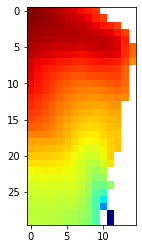

In [ ]:
print(SST_feb.shape)
plt.imshow(SST_feb,cmap='jet')

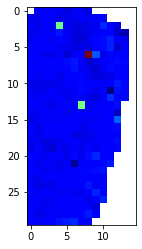

In [ ]:
# Diferencia entre modelo y ARGO
plt.imshow(SST_feb-np.mean(datos_feb[0:2,:,:], axis=0),cmap='jet')

## Validacion-Marzo

In [ ]:
marzo= interpolador_capas(dataframe= lista_dfs[2], max_depth= 100, intervalo=1)
marzo

Intento fallido en Id: 3900526 Ciclo 0
Intento fallido en Id: 3901068 Ciclo 115
Intento fallido en Id: 3901068 Ciclo 114
Intento fallido en Id: 3900491 Ciclo 16
Intento fallido en Id: 3900491 Ciclo 15
Intento fallido en Id: 3900491 Ciclo 17
Intento fallido en Id: 3900529 Ciclo 0
Intento fallido en Id: 3900496 Ciclo 14
Intento fallido en Id: 3900496 Ciclo 15
Intento fallido en Id: 3900496 Ciclo 16
Intento fallido en Id: 4900512 Ciclo 25
Intento fallido en Id: 4900512 Ciclo 26
Intento fallido en Id: 4900512 Ciclo 27
Intento fallido en Id: 3900495 Ciclo 14
Intento fallido en Id: 3900495 Ciclo 15
Intento fallido en Id: 3900495 Ciclo 16
Intento fallido en Id: 4900513 Ciclo 27
Intento fallido en Id: 4900513 Ciclo 26
Intento fallido en Id: 4900513 Ciclo 25
Tamaño de los dataframes generados : 1601
(161701, 4)


Lon     Lat  Presion_interp   S_interp
0      -84.995 -32.694               0  34.648840
1      -84.995 -32.694               1  34.645266
2      -84.995 -32.694               2  34.641691
3      -84.995 -32.694               3  34.638117
4      -84.995 -32.694               4  34.634542
...        ...     ...             ...        ...
161696 -70.629 -18.742              96  34.887991
161697 -70.629 -18.742              97  34.891268
161698 -70.629 -18.742              98  34.895256
161699 -70.629 -18.742              99  34.901287
161700 -70.629 -18.742             100        NaN

[161701 rows x 4 columns]

In [ ]:
%%time
import scipy
from scipy.interpolate import griddata
# Coordenadas para grafica
ds_final= marzo #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_mar = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(-85+0.5,-70+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(-45+0.5, -15+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0=griddata(points,values, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur -Norte
  grid_z0_1=np.flip(grid_z0, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_mar.append(grid_z0_1)
datos_mar = np.stack(datos_mar)
#print(datos)
print(datos_mar.shape) 

(100, 30, 15)
CPU times: user 3.07 s, sys: 2.89 s, total: 5.96 s
Wall time: 3.1 s


(30, 15)


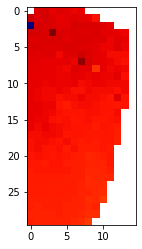

In [ ]:
print(np.mean(datos_mar[0:2,:,:], axis=0).shape)
plt.imshow(np.mean(datos_mar[0:2,:,:], axis=0),cmap='jet')

In [ ]:
x1= np.arange(-85+0.5, -70+0.5,1)
y1= list(np.arange(-45+0.5, -15+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
SST_mar=basemap.interp(datain=reanal.sel(month=3).SSS.values, xin=reanal.sel(month=3).lon.values-360,
                       yin=reanal.sel(month=3).lat.values,xout=X_t, yout=Y_t, order=1, masked= True)

(30, 15)


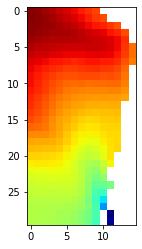

In [ ]:
print(SST_mar.shape)
plt.imshow(SST_mar,cmap='jet')

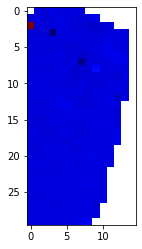

In [ ]:
# Diferencia entre modelo y ARGO
plt.imshow(SST_mar-np.mean(datos_mar[0:2,:,:], axis=0),cmap='jet')

## Validacion-Abril

In [ ]:
abril= interpolador_capas(dataframe= lista_dfs[3], max_depth= 100, intervalo=1)
abril

Intento fallido en Id: 3900549 Ciclo 8
Intento fallido en Id: 3900549 Ciclo 7
Intento fallido en Id: 3900491 Ciclo 18
Intento fallido en Id: 3900491 Ciclo 19
Intento fallido en Id: 3900491 Ciclo 20
Intento fallido en Id: 3900496 Ciclo 17
Intento fallido en Id: 3900496 Ciclo 18
Intento fallido en Id: 3900496 Ciclo 19
Intento fallido en Id: 4900512 Ciclo 28
Intento fallido en Id: 4900512 Ciclo 29
Intento fallido en Id: 4900512 Ciclo 30
Intento fallido en Id: 3900495 Ciclo 19
Intento fallido en Id: 3900495 Ciclo 17
Intento fallido en Id: 3900495 Ciclo 18
Intento fallido en Id: 4900513 Ciclo 30
Intento fallido en Id: 4900513 Ciclo 29
Intento fallido en Id: 4900513 Ciclo 28
Tamaño de los dataframes generados : 1650
(166650, 4)


Lon     Lat  Presion_interp   S_interp
0      -85.000 -42.673               0  33.874050
1      -85.000 -42.673               1  33.874425
2      -85.000 -42.673               2  33.874799
3      -85.000 -42.673               3  33.875174
4      -85.000 -42.673               4  33.875548
...        ...     ...             ...        ...
166645 -70.603 -19.033              96  34.851009
166646 -70.603 -19.033              97  34.854088
166647 -70.603 -19.033              98  34.855693
166648 -70.603 -19.033              99        NaN
166649 -70.603 -19.033             100        NaN

[166650 rows x 4 columns]

In [ ]:
%%time
import scipy
from scipy.interpolate import griddata
# Coordenadas para grafica
ds_final= abril #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_abr = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(-85+0.5,-70+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(-45+0.5, -15+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0=griddata(points,values, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur -Norte
  grid_z0_1=np.flip(grid_z0, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_abr.append(grid_z0_1)
datos_abr = np.stack(datos_abr)
#print(datos)
print(datos_abr.shape) 

(100, 30, 15)
CPU times: user 3.19 s, sys: 2.88 s, total: 6.07 s
Wall time: 3.17 s


(30, 15)


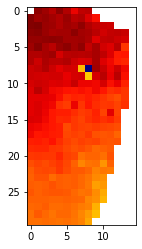

In [ ]:
print(np.mean(datos_abr[0:2,:,:], axis=0).shape)
plt.imshow(np.mean(datos_abr[0:2,:,:], axis=0),cmap='jet')

In [ ]:
x1= np.arange(-85+0.5, -70+0.5,1)
y1= list(np.arange(-45+0.5, -15+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
SST_abr=basemap.interp(datain=reanal.sel(month=4).SSS.values, xin=reanal.sel(month=4).lon.values-360,
                       yin=reanal.sel(month=4).lat.values,xout=X_t, yout=Y_t, order=1, masked= True)

(30, 15)


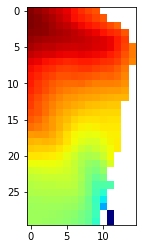

In [ ]:
print(SST_abr.shape)
plt.imshow(SST_abr,cmap='jet')

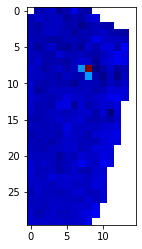

In [ ]:
# Diferencia entre modelo y ARGO
plt.imshow(SST_abr-np.mean(datos_abr[0:2,:,:], axis=0),cmap='jet')

## Validacion-Mayo

In [ ]:
mayo= interpolador_capas(dataframe= lista_dfs[4], max_depth= 100, intervalo=1)
mayo

Intento fallido en Id: 3900549 Ciclo 12
Intento fallido en Id: 3900549 Ciclo 10
Intento fallido en Id: 3900549 Ciclo 11
Intento fallido en Id: 3900491 Ciclo 21
Intento fallido en Id: 3900496 Ciclo 20
Intento fallido en Id: 3900496 Ciclo 21
Intento fallido en Id: 3900496 Ciclo 22
Intento fallido en Id: 4900512 Ciclo 31
Intento fallido en Id: 4900512 Ciclo 33
Intento fallido en Id: 4900512 Ciclo 32
Intento fallido en Id: 3900495 Ciclo 20
Intento fallido en Id: 3900495 Ciclo 21
Intento fallido en Id: 3900495 Ciclo 22
Intento fallido en Id: 4900513 Ciclo 31
Intento fallido en Id: 4900513 Ciclo 32
Intento fallido en Id: 4900513 Ciclo 33
Tamaño de los dataframes generados : 1698
(171498, 4)


Lon       Lat  Presion_interp   S_interp
0      -84.99817 -21.80639               0  35.516136
1      -84.99817 -21.80639               1  35.331001
2      -84.99817 -21.80639               2  35.331001
3      -84.99817 -21.80639               3  35.330978
4      -84.99817 -21.80639               4  35.330996
...          ...       ...             ...        ...
171493 -70.70500 -20.44900              96  34.844132
171494 -70.70500 -20.44900              97  34.845131
171495 -70.70500 -20.44900              98  34.846131
171496 -70.70500 -20.44900              99  34.847130
171497 -70.70500 -20.44900             100        NaN

[171498 rows x 4 columns]

In [ ]:
%%time
import scipy
from scipy.interpolate import griddata
ds_final= mayo #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_may = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(-85+0.5,-70+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(-45+0.5, -15+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0=griddata(points,values, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur -Norte
  grid_z0_1=np.flip(grid_z0, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_may.append(grid_z0_1)
datos_may = np.stack(datos_may)
#print(datos)
print(datos_may.shape) 

(100, 30, 15)
CPU times: user 3.28 s, sys: 2.96 s, total: 6.24 s
Wall time: 3.24 s


(30, 15)


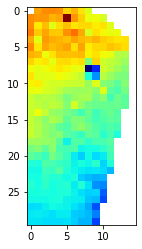

In [ ]:
print(np.mean(datos_may[0:2,:,:], axis=0).shape)
plt.imshow(np.mean(datos_may[0:2,:,:], axis=0),cmap='jet')

In [ ]:
x1= np.arange(-85+0.5, -70+0.5,1)
y1= list(np.arange(-45+0.5, -15+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
SST_may=basemap.interp(datain=reanal.sel(month=5).SSS.values, xin=reanal.sel(month=5).lon.values-360,
                       yin=reanal.sel(month=5).lat.values,xout=X_t, yout=Y_t, order=1, masked= True)

(30, 15)


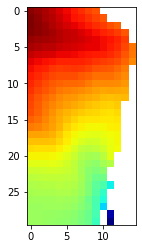

In [ ]:
print(SST_may.shape)
plt.imshow(SST_may,cmap='jet')

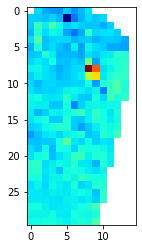

In [ ]:
# Diferencia entre modelo y ARGO
plt.imshow(SST_may-np.mean(datos_may[0:2,:,:], axis=0),cmap='jet')

## Validacion-Junio

In [ ]:
junio= interpolador_capas(dataframe= lista_dfs[5], max_depth= 100, intervalo=1)
junio

Intento fallido en Id: 3900549 Ciclo 15
Intento fallido en Id: 3900549 Ciclo 14
Intento fallido en Id: 3900549 Ciclo 13
Intento fallido en Id: 3900548 Ciclo 13
Intento fallido en Id: 3900548 Ciclo 14
Intento fallido en Id: 3900524 Ciclo 74
Intento fallido en Id: 3900496 Ciclo 25
Intento fallido en Id: 3900496 Ciclo 24
Intento fallido en Id: 3900496 Ciclo 23
Intento fallido en Id: 4900512 Ciclo 34
Intento fallido en Id: 4900512 Ciclo 35
Intento fallido en Id: 4900512 Ciclo 36
Intento fallido en Id: 3901066 Ciclo 145
Intento fallido en Id: 3900520 Ciclo 0
Intento fallido en Id: 3900495 Ciclo 23
Intento fallido en Id: 3900495 Ciclo 24
Intento fallido en Id: 3900495 Ciclo 25
Intento fallido en Id: 4900513 Ciclo 34
Intento fallido en Id: 4900513 Ciclo 35
Intento fallido en Id: 4900513 Ciclo 36
Intento fallido en Id: 3901068 Ciclo 31
Intento fallido en Id: 3901068 Ciclo 30
Intento fallido en Id: 3901068 Ciclo 29
Intento fallido en Id: 3901068 Ciclo 26
Tamaño de los dataframes generados : 163

Lon     Lat  Presion_interp   S_interp
0      -84.999 -28.125               0  35.159787
1      -84.999 -28.125               1  35.159933
2      -84.999 -28.125               2  35.160078
3      -84.999 -28.125               3  35.160224
4      -84.999 -28.125               4  35.160369
...        ...     ...             ...        ...
164928 -70.575 -19.081              96  34.826819
164929 -70.575 -19.081              97  34.827291
164930 -70.575 -19.081              98  34.831330
164931 -70.575 -19.081              99        NaN
164932 -70.575 -19.081             100        NaN

[164933 rows x 4 columns]

In [ ]:
%%time
import scipy
from scipy.interpolate import griddata
ds_final= junio #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_jun = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(-85+0.5,-70+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(-45+0.5, -15+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0=griddata(points,values, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur -Norte
  grid_z0_1=np.flip(grid_z0, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_jun.append(grid_z0_1)
datos_jun = np.stack(datos_jun)
#print(datos)
print(datos_jun.shape) 

(100, 30, 15)
CPU times: user 3.13 s, sys: 2.93 s, total: 6.06 s
Wall time: 3.21 s


(30, 15)


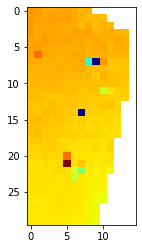

In [ ]:
print(np.mean(datos_jun[0:2,:,:], axis=0).shape)
plt.imshow(np.mean(datos_jun[0:2,:,:], axis=0),cmap='jet')

In [ ]:
x1= np.arange(-85+0.5, -70+0.5,1)
y1= list(np.arange(-45+0.5, -15+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
SST_jun=basemap.interp(datain=reanal.sel(month=6).SSS.values, xin=reanal.sel(month=6).lon.values-360,
                       yin=reanal.sel(month=6).lat.values,xout=X_t, yout=Y_t, order=1, masked= True)

(30, 15)


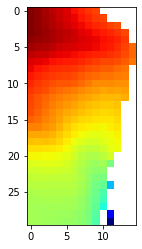

In [ ]:
print(SST_jun.shape)
plt.imshow(SST_jun,cmap='jet')

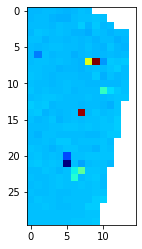

In [ ]:
# Diferencia entre modelo y ARGO
plt.imshow(SST_jun-np.mean(datos_jun[0:2,:,:], axis=0),cmap='jet')

## Validacion-Julio

In [ ]:
julio= interpolador_capas(dataframe= lista_dfs[6], max_depth= 100, intervalo=1)
julio

Intento fallido en Id: 3900496 Ciclo 27
Intento fallido en Id: 3900496 Ciclo 26
Intento fallido en Id: 3900496 Ciclo 28
Intento fallido en Id: 3900491 Ciclo 29
Intento fallido en Id: 3900491 Ciclo 28
Intento fallido en Id: 3900548 Ciclo 16
Intento fallido en Id: 3900548 Ciclo 15
Intento fallido en Id: 3900548 Ciclo 17
Intento fallido en Id: 3900524 Ciclo 79
Intento fallido en Id: 4900512 Ciclo 39
Intento fallido en Id: 4900512 Ciclo 38
Intento fallido en Id: 4900512 Ciclo 37
Intento fallido en Id: 3900495 Ciclo 28
Intento fallido en Id: 3900495 Ciclo 26
Intento fallido en Id: 3900495 Ciclo 27
Intento fallido en Id: 4900513 Ciclo 39
Intento fallido en Id: 4900513 Ciclo 38
Intento fallido en Id: 4900513 Ciclo 37
Tamaño de los dataframes generados : 1662
(167862, 4)


Lon       Lat  Presion_interp   S_interp
0      -84.98846 -23.77449               0  35.214527
1      -84.98846 -23.77449               1  35.230125
2      -84.98846 -23.77449               2  35.230041
3      -84.98846 -23.77449               3  35.229003
4      -84.98846 -23.77449               4  35.229000
...          ...       ...             ...        ...
167857 -70.57400 -18.82500              96  34.810632
167858 -70.57400 -18.82500              97  34.815262
167859 -70.57400 -18.82500              98  34.822109
167860 -70.57400 -18.82500              99        NaN
167861 -70.57400 -18.82500             100        NaN

[167862 rows x 4 columns]

In [ ]:
%%time
import scipy
from scipy.interpolate import griddata
ds_final= julio #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_jul = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(-85+0.5,-70+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(-45+0.5, -15+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0=griddata(points,values, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur -Norte
  grid_z0_1=np.flip(grid_z0, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_jul.append(grid_z0_1)
datos_jul = np.stack(datos_jul)
#print(datos)
print(datos_jul.shape) 

(100, 30, 15)
CPU times: user 3.23 s, sys: 2.91 s, total: 6.14 s
Wall time: 3.2 s


(30, 15)


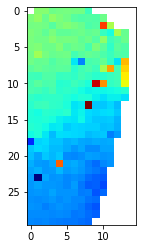

In [ ]:
print(np.mean(datos_jul[0:2,:,:], axis=0).shape)
plt.imshow(np.mean(datos_jul[0:2,:,:], axis=0),cmap='jet')

In [ ]:
x1= np.arange(-85+0.5, -70+0.5,1)
y1= list(np.arange(-45+0.5, -15+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
SST_jul=basemap.interp(datain=reanal.sel(month=7).SSS.values, xin=reanal.sel(month=7).lon.values-360,
                       yin=reanal.sel(month=7).lat.values,xout=X_t, yout=Y_t, order=1, masked= True)

(30, 15)


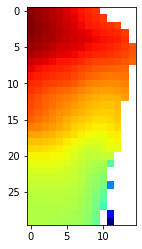

In [ ]:
print(SST_jul.shape)
plt.imshow(SST_jul,cmap='jet')

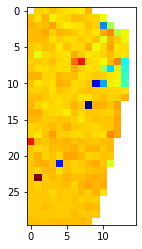

In [ ]:
# Diferencia entre modelo y ARGO
plt.imshow(SST_jul-np.mean(datos_jul[0:2,:,:], axis=0),cmap='jet')

## Validacion-Agosto

In [ ]:
agosto= interpolador_capas(dataframe= lista_dfs[7], max_depth= 100, intervalo=1)
agosto

Intento fallido en Id: 3900496 Ciclo 31
Intento fallido en Id: 3900496 Ciclo 30
Intento fallido en Id: 3900496 Ciclo 29
Intento fallido en Id: 3900491 Ciclo 30
Intento fallido en Id: 3900491 Ciclo 32
Intento fallido en Id: 3900491 Ciclo 31
Intento fallido en Id: 3900549 Ciclo 20
Intento fallido en Id: 3900549 Ciclo 19
Intento fallido en Id: 3900549 Ciclo 18
Intento fallido en Id: 3900548 Ciclo 18
Intento fallido en Id: 3900548 Ciclo 19
Intento fallido en Id: 3900548 Ciclo 20
Intento fallido en Id: 4900512 Ciclo 40
Intento fallido en Id: 4900512 Ciclo 41
Intento fallido en Id: 4900512 Ciclo 42
Intento fallido en Id: 3901066 Ciclo 53
Intento fallido en Id: 3901066 Ciclo 49
Intento fallido en Id: 3901068 Ciclo 53
Intento fallido en Id: 3901068 Ciclo 52
Intento fallido en Id: 3900495 Ciclo 29
Intento fallido en Id: 3900495 Ciclo 30
Intento fallido en Id: 3900495 Ciclo 31
Intento fallido en Id: 4900513 Ciclo 42
Intento fallido en Id: 4900513 Ciclo 41
Intento fallido en Id: 4900513 Ciclo 40


Lon     Lat  Presion_interp   S_interp
0      -84.995003 -25.129               0  35.026791
1      -84.995003 -25.129               1  35.023307
2      -84.995003 -25.129               2  35.019823
3      -84.995003 -25.129               3  35.016339
4      -84.995003 -25.129               4  35.012855
...           ...     ...             ...        ...
165635 -70.519000 -18.972              96  34.919998
165636 -70.519000 -18.972              97  34.919998
165637 -70.519000 -18.972              98  34.919998
165638 -70.519000 -18.972              99        NaN
165639 -70.519000 -18.972             100        NaN

[165640 rows x 4 columns]

In [ ]:
%%time
import scipy
from scipy.interpolate import griddata
ds_final= agosto #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_ago = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(-85+0.5,-70+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(-45+0.5, -15+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0=griddata(points,values, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur -Norte
  grid_z0_1=np.flip(grid_z0, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_ago.append(grid_z0_1)
datos_ago = np.stack(datos_ago)
#print(datos)
print(datos_ago.shape) 

(100, 30, 15)
CPU times: user 3.25 s, sys: 2.92 s, total: 6.18 s
Wall time: 3.26 s


(30, 15)


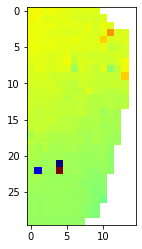

In [ ]:
print(np.mean(datos_ago[0:2,:,:], axis=0).shape)
plt.imshow(np.mean(datos_ago[0:2,:,:], axis=0),cmap='jet')

In [ ]:
x1= np.arange(-85+0.5, -70+0.5,1)
y1= list(np.arange(-45+0.5, -15+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
SST_ago=basemap.interp(datain=reanal.sel(month=8).SSS.values, xin=reanal.sel(month=8).lon.values-360,
                       yin=reanal.sel(month=8).lat.values,xout=X_t, yout=Y_t, order=1, masked= True)

(30, 15)


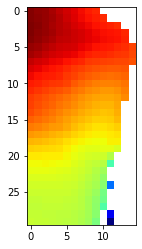

In [ ]:
print(SST_ago.shape)
plt.imshow(SST_ago,cmap='jet')

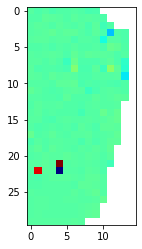

In [ ]:
# Diferencia entre modelo y ARGO
plt.imshow(SST_ago-np.mean(datos_ago[0:2,:,:], axis=0),cmap='jet')

## Validacion-Septiembre

In [ ]:
septiembre= interpolador_capas(dataframe= lista_dfs[8], max_depth= 100, intervalo=1)
septiembre

Intento fallido en Id: 3900563 Ciclo 23
Intento fallido en Id: 3900549 Ciclo 21
Intento fallido en Id: 3900549 Ciclo 22
Intento fallido en Id: 3900549 Ciclo 23
Intento fallido en Id: 3900491 Ciclo 35
Intento fallido en Id: 3900491 Ciclo 34
Intento fallido en Id: 3900491 Ciclo 33
Intento fallido en Id: 3900548 Ciclo 23
Intento fallido en Id: 3900548 Ciclo 22
Intento fallido en Id: 3900548 Ciclo 21
Intento fallido en Id: 3900528 Ciclo 0
Intento fallido en Id: 4900512 Ciclo 45
Intento fallido en Id: 4900512 Ciclo 44
Intento fallido en Id: 4900512 Ciclo 43
Intento fallido en Id: 3900496 Ciclo 34
Intento fallido en Id: 3900496 Ciclo 33
Intento fallido en Id: 3900496 Ciclo 32
Intento fallido en Id: 3901068 Ciclo 63
Intento fallido en Id: 3901068 Ciclo 60
Intento fallido en Id: 3901068 Ciclo 54
Intento fallido en Id: 4900513 Ciclo 43
Intento fallido en Id: 4900513 Ciclo 45
Intento fallido en Id: 4900513 Ciclo 44
Intento fallido en Id: 3900495 Ciclo 34
Intento fallido en Id: 3900495 Ciclo 32
I

Lon     Lat  Presion_interp   S_interp
0      -84.997 -43.035               0  33.934310
1      -84.997 -43.035               1  33.934364
2      -84.997 -43.035               2  33.934418
3      -84.997 -43.035               3  33.934472
4      -84.997 -43.035               4  33.934526
...        ...     ...             ...        ...
160282 -70.631 -19.198              96  34.854753
160283 -70.631 -19.198              97  34.856539
160284 -70.631 -19.198              98  34.857877
160285 -70.631 -19.198              99        NaN
160286 -70.631 -19.198             100        NaN

[160287 rows x 4 columns]

In [ ]:
%%time
import scipy
from scipy.interpolate import griddata
ds_final= septiembre #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_sep = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(-85+0.5,-70+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(-45+0.5, -15+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0=griddata(points,values, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur -Norte
  grid_z0_1=np.flip(grid_z0, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_sep.append(grid_z0_1)
datos_sep = np.stack(datos_sep)
#print(datos)
print(datos_sep.shape) 

(100, 30, 15)
CPU times: user 3.14 s, sys: 2.9 s, total: 6.04 s
Wall time: 3.17 s


(30, 15)


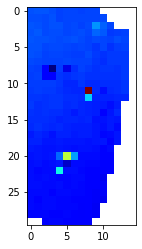

In [ ]:
print(np.mean(datos_sep[0:2,:,:], axis=0).shape)
plt.imshow(np.mean(datos_sep[0:2,:,:], axis=0),cmap='jet')

In [ ]:
x1= np.arange(-85+0.5, -70+0.5,1)
y1= list(np.arange(-45+0.5, -15+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
SST_sep=basemap.interp(datain=reanal.sel(month=9).SSS.values, xin=reanal.sel(month=9).lon.values-360,
                       yin=reanal.sel(month=9).lat.values,xout=X_t, yout=Y_t, order=1, masked= True)

(30, 15)


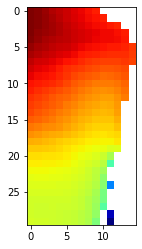

In [ ]:
print(SST_sep.shape)
plt.imshow(SST_sep,cmap='jet')

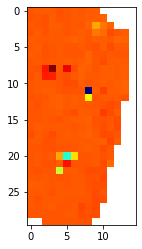

In [ ]:
# Diferencia entre modelo y ARGO
plt.imshow(SST_sep-np.mean(datos_sep[0:2,:,:], axis=0),cmap='jet')

## Validacion-Octubre

In [ ]:
octubre= interpolador_capas(dataframe= lista_dfs[9], max_depth= 100, intervalo=1)
octubre

Intento fallido en Id: 3900491 Ciclo 36
Intento fallido en Id: 3900594 Ciclo 0
Intento fallido en Id: 3900563 Ciclo 24
Intento fallido en Id: 3900563 Ciclo 25
Intento fallido en Id: 3900563 Ciclo 26
Intento fallido en Id: 4900797 Ciclo 0
Intento fallido en Id: 3900549 Ciclo 26
Intento fallido en Id: 3900549 Ciclo 25
Intento fallido en Id: 3900549 Ciclo 24
Intento fallido en Id: 3901036 Ciclo 55
Intento fallido en Id: 4900798 Ciclo 0
Intento fallido en Id: 3900519 Ciclo 0
Intento fallido en Id: 4900796 Ciclo 1
Intento fallido en Id: 4900796 Ciclo 0
Intento fallido en Id: 3900548 Ciclo 25
Intento fallido en Id: 3900548 Ciclo 26
Intento fallido en Id: 3900548 Ciclo 24
Intento fallido en Id: 4900512 Ciclo 46
Intento fallido en Id: 4900512 Ciclo 47
Intento fallido en Id: 4900512 Ciclo 48
Intento fallido en Id: 3900496 Ciclo 37
Intento fallido en Id: 3900496 Ciclo 36
Intento fallido en Id: 3900496 Ciclo 35
Intento fallido en Id: 3901068 Ciclo 72
Intento fallido en Id: 3901068 Ciclo 70
Intent

Lon     Lat  Presion_interp   S_interp
0      -84.996002 -15.985               0  35.435524
1      -84.996002 -15.985               1  35.435516
2      -84.996002 -15.985               2  35.435509
3      -84.996002 -15.985               3  35.435502
4      -84.996002 -15.985               4  35.435494
...           ...     ...             ...        ...
165534 -70.670000 -21.766              96  34.827046
165535 -70.670000 -21.766              97  34.830803
165536 -70.670000 -21.766              98  34.833016
165537 -70.670000 -21.766              99  34.834404
165538 -70.670000 -21.766             100        NaN

[165539 rows x 4 columns]

In [ ]:
%%time
import scipy
from scipy.interpolate import griddata
ds_final= octubre #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_oct = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(-85+0.5,-70+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(-45+0.5, -15+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0=griddata(points,values, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur -Norte
  grid_z0_1=np.flip(grid_z0, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_oct.append(grid_z0_1)
datos_oct = np.stack(datos_oct)
#print(datos)
print(datos_oct.shape) 

(100, 30, 15)
CPU times: user 3.13 s, sys: 2.87 s, total: 6 s
Wall time: 3.13 s


(30, 15)


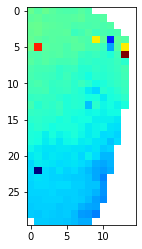

In [ ]:
print(np.mean(datos_oct[0:2,:,:], axis=0).shape)
plt.imshow(np.mean(datos_oct[0:2,:,:], axis=0),cmap='jet')

In [ ]:
x1= np.arange(-85+0.5, -70+0.5,1)
y1= list(np.arange(-45+0.5, -15+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
SST_oct=basemap.interp(datain=reanal.sel(month=10).SSS.values, xin=reanal.sel(month=10).lon.values-360,
                       yin=reanal.sel(month=10).lat.values,xout=X_t, yout=Y_t, order=1, masked= True)

(30, 15)


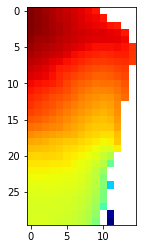

In [ ]:
print(SST_oct.shape)
plt.imshow(SST_oct,cmap='jet')

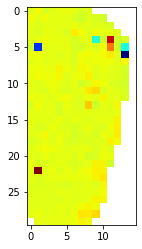

In [ ]:
# Diferencia entre modelo y ARGO
plt.imshow(SST_oct-np.mean(datos_oct[0:2,:,:], axis=0),cmap='jet')

## Validacion-Noviembre

In [ ]:
noviembre= interpolador_capas(dataframe= lista_dfs[10], max_depth= 100, intervalo=1)
noviembre

Intento fallido en Id: 3900563 Ciclo 29
Intento fallido en Id: 3900563 Ciclo 28
Intento fallido en Id: 3900563 Ciclo 27
Intento fallido en Id: 3900549 Ciclo 27
Intento fallido en Id: 4900798 Ciclo 3
Intento fallido en Id: 4900798 Ciclo 2
Intento fallido en Id: 4900798 Ciclo 1
Intento fallido en Id: 3900790 Ciclo 71
Intento fallido en Id: 4900796 Ciclo 4
Intento fallido en Id: 4900796 Ciclo 3
Intento fallido en Id: 4900796 Ciclo 2
Intento fallido en Id: 3900548 Ciclo 28
Intento fallido en Id: 3900548 Ciclo 27
Intento fallido en Id: 3901068 Ciclo 83
Intento fallido en Id: 3901068 Ciclo 74
Intento fallido en Id: 3900496 Ciclo 40
Intento fallido en Id: 3900496 Ciclo 39
Intento fallido en Id: 3900496 Ciclo 38
Intento fallido en Id: 3900495 Ciclo 40
Intento fallido en Id: 3900495 Ciclo 39
Intento fallido en Id: 3900495 Ciclo 38
Intento fallido en Id: 4900512 Ciclo 49
Intento fallido en Id: 4900512 Ciclo 51
Intento fallido en Id: 4900512 Ciclo 50
Intento fallido en Id: 4900513 Ciclo 49
Intent

Lon       Lat  Presion_interp   S_interp
0      -84.99869 -29.50214               0  35.034212
1      -84.99869 -29.50214               1  35.011564
2      -84.99869 -29.50214               2  35.012960
3      -84.99869 -29.50214               3  35.013927
4      -84.99869 -29.50214               4  35.026001
...          ...       ...             ...        ...
170483 -70.52700 -21.89100              96  34.783290
170484 -70.52700 -21.89100              97  34.374969
170485 -70.52700 -21.89100              98  34.881052
170486 -70.52700 -21.89100              99  35.217412
170487 -70.52700 -21.89100             100        NaN

[170488 rows x 4 columns]

In [ ]:
%%time
import scipy
from scipy.interpolate import griddata
ds_final= noviembre #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_nov = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(-85+0.5,-70+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(-45+0.5, -15+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0=griddata(points,values, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur -Norte
  grid_z0_1=np.flip(grid_z0, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_nov.append(grid_z0_1)
datos_nov = np.stack(datos_nov)
#print(datos)
print(datos_nov.shape) 

(100, 30, 15)
CPU times: user 3.21 s, sys: 2.92 s, total: 6.13 s
Wall time: 3.16 s


(30, 15)


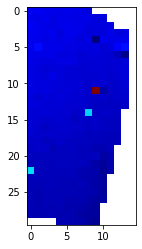

In [ ]:
print(np.mean(datos_nov[0:2,:,:], axis=0).shape)
plt.imshow(np.mean(datos_nov[0:2,:,:], axis=0),cmap='jet')

In [ ]:
x1= np.arange(-85+0.5, -70+0.5,1)
y1= list(np.arange(-45+0.5, -15+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
SST_nov=basemap.interp(datain=reanal.sel(month=11).SSS.values, xin=reanal.sel(month=11).lon.values-360,
                       yin=reanal.sel(month=11).lat.values,xout=X_t, yout=Y_t, order=1, masked= True)

(30, 15)


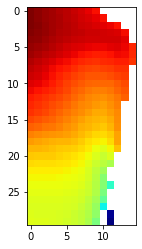

In [ ]:
print(SST_nov.shape)
plt.imshow(SST_nov,cmap='jet')

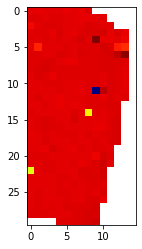

In [ ]:
# Diferencia entre modelo y ARGO
plt.imshow(SST_nov-np.mean(datos_nov[0:2,:,:], axis=0),cmap='jet')

## Validacion-Diciembre

In [ ]:
diciembre= interpolador_capas(dataframe= lista_dfs[11], max_depth= 100, intervalo=1)
diciembre

Intento fallido en Id: 3900563 Ciclo 32
Intento fallido en Id: 4900798 Ciclo 6
Intento fallido en Id: 4900798 Ciclo 5
Intento fallido en Id: 4900798 Ciclo 4
Intento fallido en Id: 4900796 Ciclo 6
Intento fallido en Id: 4900796 Ciclo 7
Intento fallido en Id: 4900796 Ciclo 5
Intento fallido en Id: 3901068 Ciclo 91
Intento fallido en Id: 3901068 Ciclo 89
Intento fallido en Id: 3901068 Ciclo 88
Intento fallido en Id: 3901068 Ciclo 87
Intento fallido en Id: 3901068 Ciclo 85
Intento fallido en Id: 3900495 Ciclo 43
Intento fallido en Id: 3900495 Ciclo 42
Intento fallido en Id: 3900495 Ciclo 41
Intento fallido en Id: 3900496 Ciclo 43
Intento fallido en Id: 3900496 Ciclo 42
Intento fallido en Id: 3900496 Ciclo 41
Intento fallido en Id: 4900512 Ciclo 54
Intento fallido en Id: 4900512 Ciclo 52
Intento fallido en Id: 4900512 Ciclo 53
Intento fallido en Id: 3901046 Ciclo 181
Intento fallido en Id: 4900513 Ciclo 52
Intento fallido en Id: 4900513 Ciclo 53
Intento fallido en Id: 4900513 Ciclo 54
Tamañ

Lon     Lat  Presion_interp   S_interp
0      -84.987 -44.156               0  33.937954
1      -84.987 -44.156               1  33.937968
2      -84.987 -44.156               2  33.937982
3      -84.987 -44.156               3  33.937995
4      -84.987 -44.156               4  33.938009
...        ...     ...             ...        ...
172301 -70.486 -22.136              96  34.808600
172302 -70.486 -22.136              97  34.682296
172303 -70.486 -22.136              98  34.813958
172304 -70.486 -22.136              99  34.914788
172305 -70.486 -22.136             100        NaN

[172306 rows x 4 columns]

In [ ]:
%%time
import scipy
from scipy.interpolate import griddata
ds_final= diciembre #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_dic = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(-85+0.5,-70+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(-45+0.5, -15+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0=griddata(points,values, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur -Norte
  grid_z0_1=np.flip(grid_z0, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_dic.append(grid_z0_1)
datos_dic = np.stack(datos_dic)
#print(datos)
print(datos_dic.shape) 

(100, 30, 15)
CPU times: user 3.32 s, sys: 2.96 s, total: 6.28 s
Wall time: 3.24 s


(30, 15)


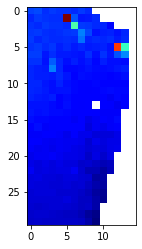

In [ ]:
print(np.mean(datos_dic[0:2,:,:], axis=0).shape)
plt.imshow(np.mean(datos_dic[0:2,:,:], axis=0),cmap='jet')

In [ ]:
x1= np.arange(-85+0.5, -70+0.5,1)
y1= list(np.arange(-45+0.5, -15+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
SST_dic=basemap.interp(datain=reanal.sel(month=12).SSS.values, xin=reanal.sel(month=12).lon.values-360,
                       yin=reanal.sel(month=12).lat.values,xout=X_t, yout=Y_t, order=1, masked= True)

(30, 15)


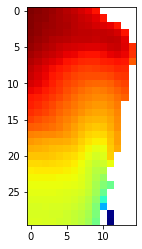

In [ ]:
print(SST_dic.shape)
plt.imshow(SST_dic,cmap='jet')

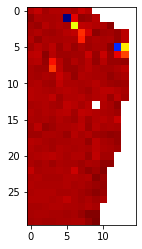

In [ ]:
# Diferencia entre modelo y ARGO
plt.imshow(SST_dic-np.mean(datos_dic[0:2,:,:], axis=0),cmap='jet')

## Diagrama de Taylor  

In [ ]:
STD_m =[]
CORRCOEF = []
RMSE=[]
Meses=['January','February','March','April','May','June','July','August','September','October','November','December']
MARCADORES = ['s', 'v', 'X', '*', 'D','.','^','<','>','1','2','3','4','8','p','P','h','H','d']
COLORES = plt.cm.get_cmap('nipy_spectral', 24)
MODELOS=[SST_jan,SST_feb,SST_mar,SST_abr,SST_may,SST_jun,SST_jul,SST_ago,SST_sep,SST_oct,SST_nov, SST_dic]
ARGO=[np.mean(datos_jan[0:2,:,:], axis=0),np.mean(datos_feb[0:2,:,:], axis=0),np.mean(datos_mar[0:2,:,:], axis=0),
      np.mean(datos_abr[0:2,:,:], axis=0),np.mean(datos_may[0:2,:,:], axis=0),np.mean(datos_jun[0:2,:,:], axis=0),
      np.mean(datos_jul[0:2,:,:], axis=0),np.mean(datos_ago[0:2,:,:], axis=0),np.mean(datos_sep[0:2,:,:], axis=0),
      np.mean(datos_oct[0:2,:,:], axis=0),np.mean(datos_nov[0:2,:,:], axis=0),np.mean(datos_dic[0:2,:,:], axis=0)]
for k in range(1,12+1,1):
  # Extraccion de datos de modelo y satelite
  modelo= MODELOS[k-1]# aplicar media en dimension tiempo
  satelite= ARGO[k-1] # aplicar media en dimension tiempo
  # Sacar los indices que comparten en el espacio
  IND = np.invert(np.isnan(satelite) | np.isnan(modelo))
  P = modelo[IND] # Modelo
  A = satelite[IND] # Referencia Era
  DD = np.ma.std(A.ravel()) # Desviacion estandar Referencia
  P = P/DD # Normalizacion por Std referencia
  A = A/DD 
  STD_m.append(np.ma.std(P.ravel()))
  CORRCOEF.append(np.ma.corrcoef(P.ravel(), A.ravel()).data[0,1])
  RMSE.append(np.sqrt(np.mean((P-A)**2)))

In [ ]:
dfr=pd.DataFrame({'STD':STD_m,'CORR':CORRCOEF,'RMSE':RMSE,'Mes':Meses})
dfr

STD      CORR      RMSE        Mes
0   0.581728  0.574440  0.819258    January
1   0.725698  0.712159  0.712286   February
2   0.299027  0.245057  0.972448      March
3   0.716121  0.758291  0.653557      April
4   0.841668  0.918952  0.402338        May
5   0.370344  0.378338  0.927283       June
6   0.709328  0.765566  0.650941       July
7   0.577101  0.627180  0.781143     August
8   0.428993  0.407722  0.914330  September
9   0.669048  0.743462  0.673355    October
10  0.306800  0.298977  0.955383   November
11  0.501019  0.623352  0.793275   December

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/'
dfr.to_csv('Datos_Taylor_Validacion_Salinidad_Humboldt.csv',index=False)

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM


In [2]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/'
from taylorDiagram_mod import TaylorDiagram as TaDiM

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM


In [56]:
dfr=pd.read_csv('Datos_Taylor_Validacion_Salinidad_Humboldt.csv')
STD_m =list(dfr.STD)
CORRCOEF =list(dfr.CORR)
RMSE=list(dfr.RMSE)
Meses=['January','February','March','April','May','June','July','August','September','October','November','December']
MARCADORES = ['s', 'v', 'X', '*', 'D','.','^','<','>','1','2','3','4','8','p','P','h','H','d']

(array([-0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,
         2.  ]), <a list of 10 Text major ticklabel objects>)

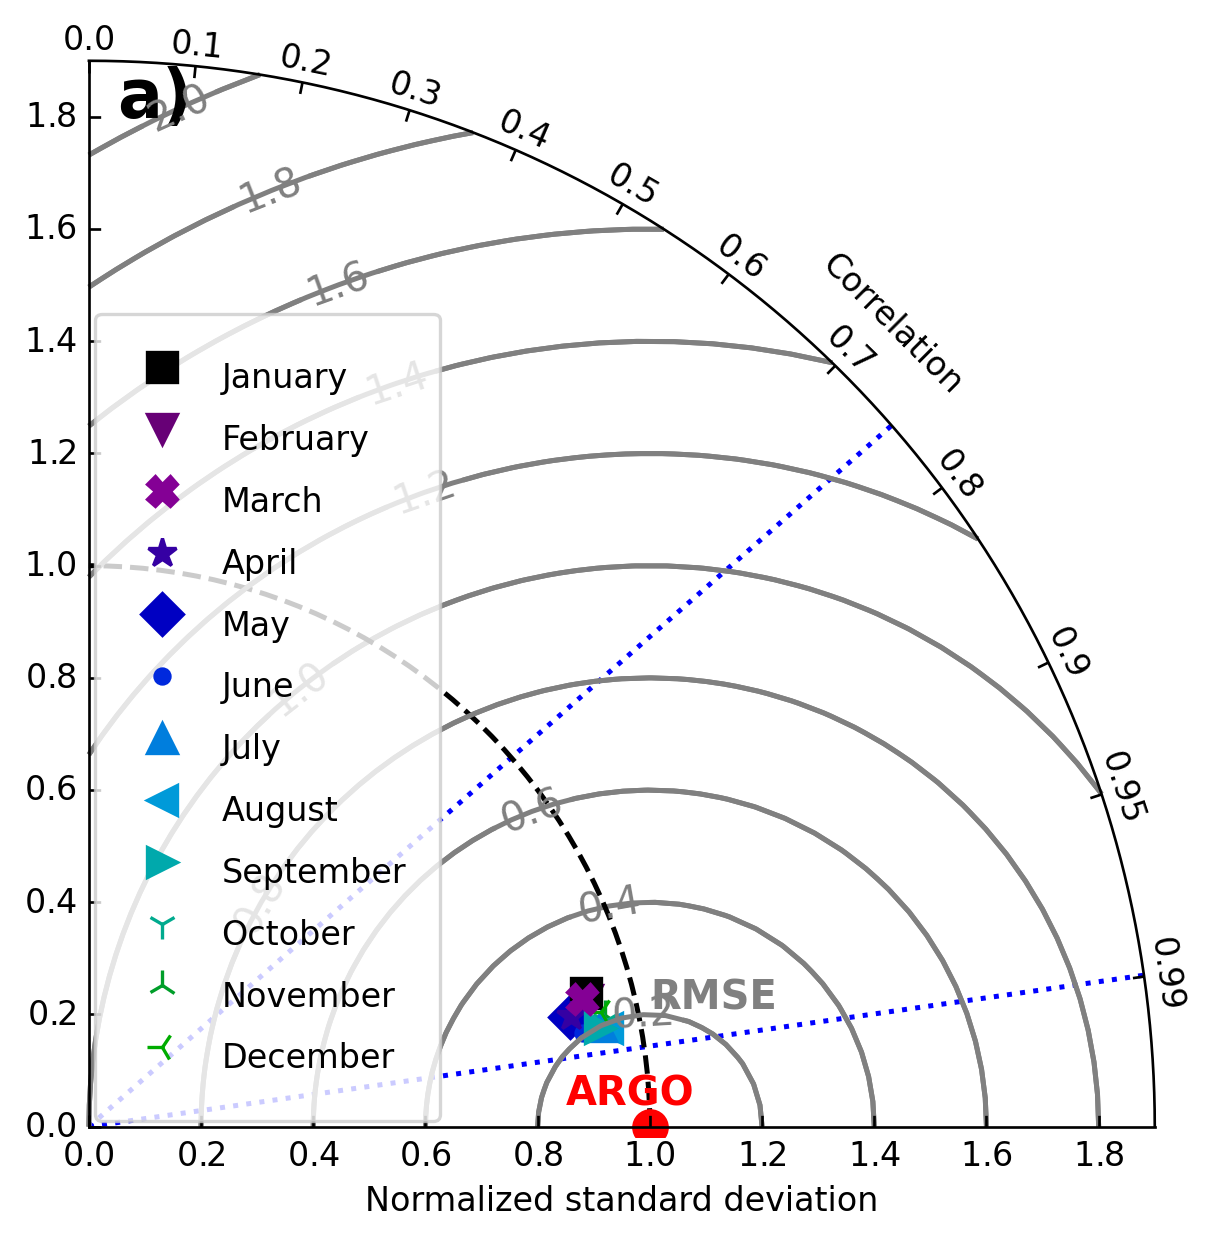

In [57]:
import numpy as NP
figID_Taylor = plt.figure(num=25, dpi=240)
figID_Taylor.set_size_inches(6., 6.)
TayDia = TaDiM(1, fig=figID_Taylor, rect=111, srange=(0., 1.9), label='ARGO')
COLORES = plt.cm.get_cmap('nipy_spectral', 24)
pp=[]
for i in range(11+1):
  ttt=TayDia.add_sample(STD_m[i], CORRCOEF[i], marker=MARCADORES[i%len(MARCADORES)], linestyle='None', color=COLORES(i), ms=9)#, ax=axs.ravel()[i])
  pp.append(ttt)
contours = TayDia.add_contours(levels=10, colors='0.5')
contours = TayDia.add_contours(levels=10, colors='0.5')
plt.plot([0,NP.sqrt(1.9**2 -1.25**2)],[0,1.25], color='blue',linestyle=':') # correlacion 0.75
plt.plot([0,NP.sqrt(1.9**2 -0.27**2)],[0,0.27], color='blue',linestyle=':') # correlacion 0.99
TayDia.ax.clabel(contours, inline=1, fontsize=12, fmt='%.1f')
plt.legend(pp, Meses,  prop=dict(size='medium'), loc='lower left', borderpad=1.0, ncol=1,handleheight=2.4, labelspacing=0.05) # numpoints=1,
plt.text(0.85,0.04,'ARGO', color='red',weight='bold',fontsize=12)
#plt.text(0.85,0.35,'MMM', color='red',weight='bold')
plt.text(0.05,1.8,'a)', color='black',weight='bold', fontsize=20)
plt.text(1.00,0.21,'RMSE', color='gray',weight='bold',fontsize=12)
plt.xticks(fontsize=25)

## Grafico de comparacion espacial

In [ ]:
!pip install cmocean
import cmocean

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 223 kB 14.3 MB/s 


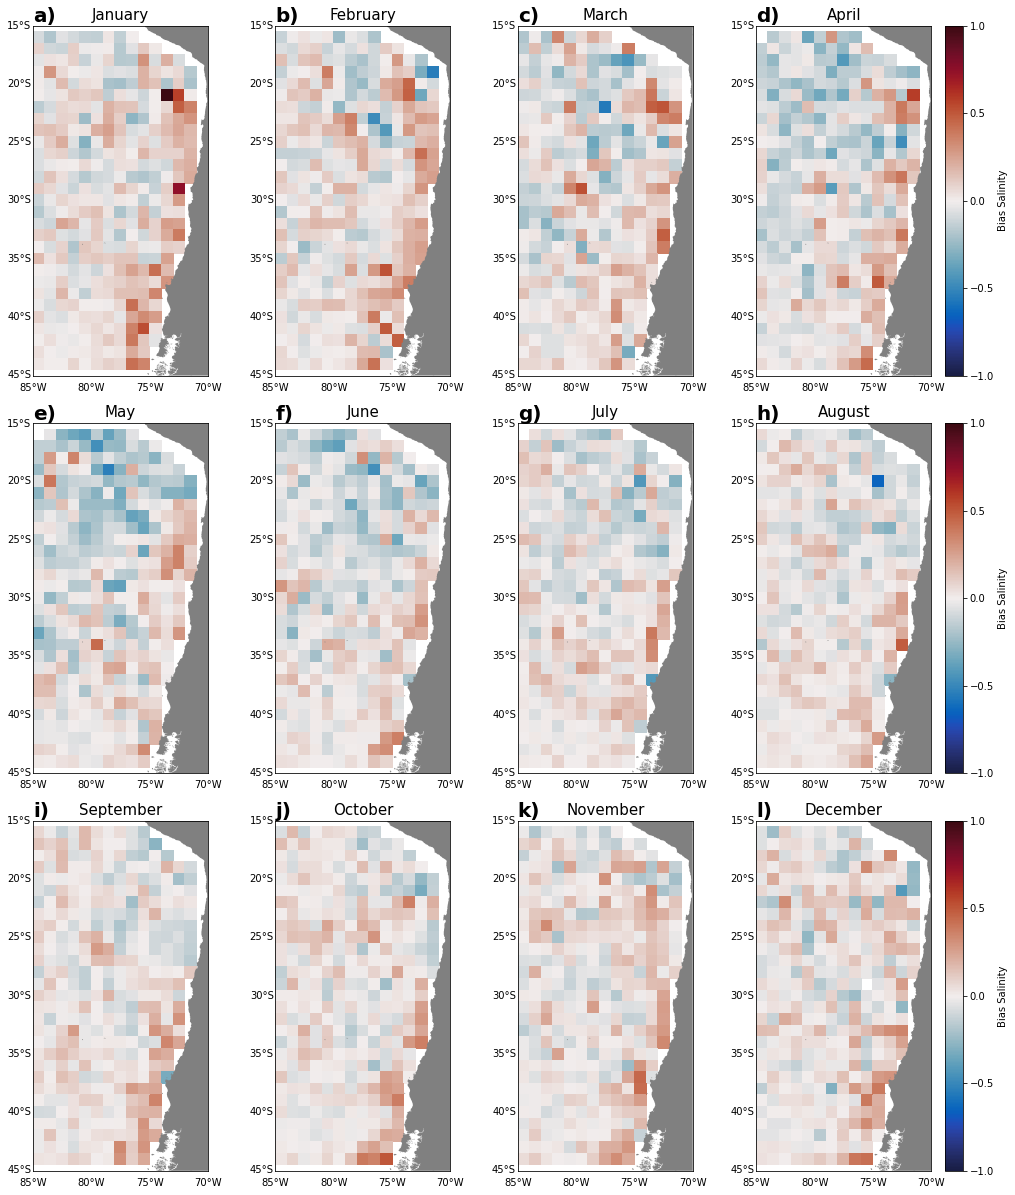

In [ ]:
import string
x1= np.arange(-85, -70+0.5,1)
y1= list(np.arange(-45+0.5, -15+0.5,1));y1=y1[::-1];y1= np.array(y1)
ticks= np.array([-1,-0.5,0,0.5,1]) #labels para el colorbar
MODELOS=[SST_jan,SST_feb,SST_mar,SST_abr,SST_may,SST_jun,SST_jul,SST_ago,SST_sep,SST_oct,SST_nov, SST_dic]
ARGO=[np.mean(datos_jan[0:2,:,:], axis=0),np.mean(datos_feb[0:2,:,:], axis=0),np.mean(datos_mar[0:2,:,:], axis=0),
      np.mean(datos_abr[0:2,:,:], axis=0),np.mean(datos_may[0:2,:,:], axis=0),np.mean(datos_jun[0:2,:,:], axis=0),
      np.mean(datos_jul[0:2,:,:], axis=0),np.mean(datos_ago[0:2,:,:], axis=0),np.mean(datos_sep[0:2,:,:], axis=0),
      np.mean(datos_oct[0:2,:,:], axis=0),np.mean(datos_nov[0:2,:,:], axis=0),np.mean(datos_dic[0:2,:,:], axis=0)]
w=0.23;h=0.22
meses=['January','February','March','April','May','June','July','August','September','October','November','December']
# atributos [left, bottom, width,height] en escala (0,1)
list_o=[[0,0.9,w,h],[0.2,0.9,w,h],[0.4,0.9,w,h],[0.6,0.9,w,h],
        [0,0.65,w,h],[0.2,0.65,w,h],[0.4,0.65,w,h],[0.6,0.65,w,h],
        [0,0.4,w,h],[0.2,0.4,w,h],[0.4,0.4,w,h],[0.6,0.4,w,h],]
fig = plt.figure(figsize=(3.3*5.1,4.7*4.7)) # tamaño de figura
for i,j in zip(list_o,range(12)):
  ax = plt.axes(i)
  ax.text(0.,1.01,string.ascii_lowercase[j]+')',fontsize=20, fontweight = 'bold', transform = ax.transAxes)
  ax.set_title(meses[j], fontsize=15)
  m=Basemap(projection='cyl',llcrnrlon=-85,llcrnrlat=-45,urcrnrlon=-70,urcrnrlat=-15, resolution ='h')
  x, y = m(x1, y1)
  z= MODELOS[j]-ARGO[j]
  cmap= plt.get_cmap("jet")
  cs=m.pcolormesh(x1, y1, z,cmap=cmocean.cm.balance,shading='flat',latlon=True,vmin=-1, vmax=1)
  m.drawcoastlines(color='white',zorder=0)
  m.fillcontinents(color='grey',lake_color='grey')
  m.drawparallels(np.arange(-45,-14,5.),labels=[1,0,0,0],linewidth=0.0)
  m.drawmeridians([-85,-80,-75,-70],labels=[0,0,0,1],linewidth=0.0)
  if j in [3,7,11]:
    cbar=plt.colorbar(ticks=ticks)
    cbar.set_label('Bias Salinity', rotation=90)

# California

## Leer datos crudos (ARGO)

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/ARGO/California/Core/'

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/ARGO/California/Core


In [ ]:
import datetime as dt
ds_final=pd.read_csv('df_T_S_final.csv',sep=',')
ds_final['Fecha']=pd.to_datetime(ds_final['Fecha'])
ds_final['Year']= ds_final['Fecha'].dt.year
ds_final['Month']= ds_final['Fecha'].dt.month
ds_final['Day']= ds_final['Fecha'].dt.day
print(ds_final.shape)
ds_final.head()

(2202601, 14)


Fecha         Lon        Lat       Pres   Pres_Adj       Temp  \
0 2002-09-07 08:00:50 -125.904999  32.081001   4.400000   3.400000  18.731001   
1 2002-09-07 08:00:50 -125.904999  32.081001   9.300000   8.300000  18.605000   
2 2002-09-07 08:00:50 -125.904999  32.081001  19.400000  18.400000  18.502001   
3 2002-09-07 08:00:50 -125.904999  32.081001  29.799999  28.799999  18.319000   
4 2002-09-07 08:00:50 -125.904999  32.081001  39.099998  38.099998  15.905000   

    Temp_Adj        Sal    Sal_Adj  Ciclo       Id  Year  Month  Day  
0  18.731001  32.916000  32.916000      1  4900096  2002      9    7  
1  18.605000  32.929001  32.929001      1  4900096  2002      9    7  
2  18.502001  33.030998  33.030998      1  4900096  2002      9    7  
3  18.319000  33.023998  33.023998      1  4900096  2002      9    7  
4  15.905000  32.907001  32.907001      1  4900096  2002      9    7

In [ ]:
print(ds_final.shape)
df_perfil= ds_final[['Fecha','Lon','Lat','Ciclo','Month']]
df_perfil = df_perfil.drop_duplicates(subset = ['Fecha','Lon','Lat','Ciclo','Month'])
print(df_perfil.shape)
df_perfil.head()

(2202601, 14)
(24408, 5)


Fecha         Lon        Lat  Ciclo  Month
0   2002-09-07 08:00:50 -125.904999  32.081001      1      9
31  2002-09-17 20:53:12 -125.593002  32.291000      2      9
62  2002-09-28 10:49:39 -125.321999  32.631001      3      9
93  2002-10-08 23:47:11 -125.061996  32.994999      4     10
124 2002-10-19 11:29:24 -124.744003  33.252998      5     10

In [ ]:
# Conteos por mes
for i in range(1,13,1):
  mes= df_perfil[df_perfil.Month == i]
  print('Mes: ',i, len(mes.Ciclo.unique()))

Mes:  1 334
Mes:  2 318
Mes:  3 335
Mes:  4 341
Mes:  5 339
Mes:  6 356
Mes:  7 356
Mes:  8 340
Mes:  9 363
Mes:  10 323
Mes:  11 326
Mes:  12 316


In [ ]:
# Funcion para sacar el numero de perfiles por cada mes
import numpy as np
import matplotlib.pyplot as plt
def cantidad_perfiles_mes(data):
  x = data.Lon;y = data.Lat;
  # Creacion de la grilla
  gridx = np.arange(-130,-110+1,1) # valores de lon
  #print(gridx.shape);print(gridx);
  gridy = np.arange(20,50+1,1)
  #print(gridy.shape);print(gridy);
  grid, _, _ = np.histogram2d(x, y, bins=[gridx, gridy]);
  #print(grid.shape)
  # Ponerlo en el mismo sentido para que quede alineado con Chile
  grid1=np.flip(grid.T, axis=0) # Izquierda°-85W , derecha -70°W, arriba -15°S, abajo -45°S
  #grid1= grid.T
  x1= np.arange(-130+0.5, -110+0.5,1);y1= list(np.arange(20+0.5,50+0.5,1));y1=y1[::-1];y1= np.array(y1);
  #print(x1.shape);print(y1.shape)
  # Reemplazar 0 por nan
  grid1[grid1 == 0] = np.nan
  return grid1

In [ ]:
lista_conteos=[]
for j in range(1,13,1):
  lista_conteos.append(cantidad_perfiles_mes(df_perfil[df_perfil.Month == j]))

In [ ]:
lista_conteos[0].shape

(30, 20)

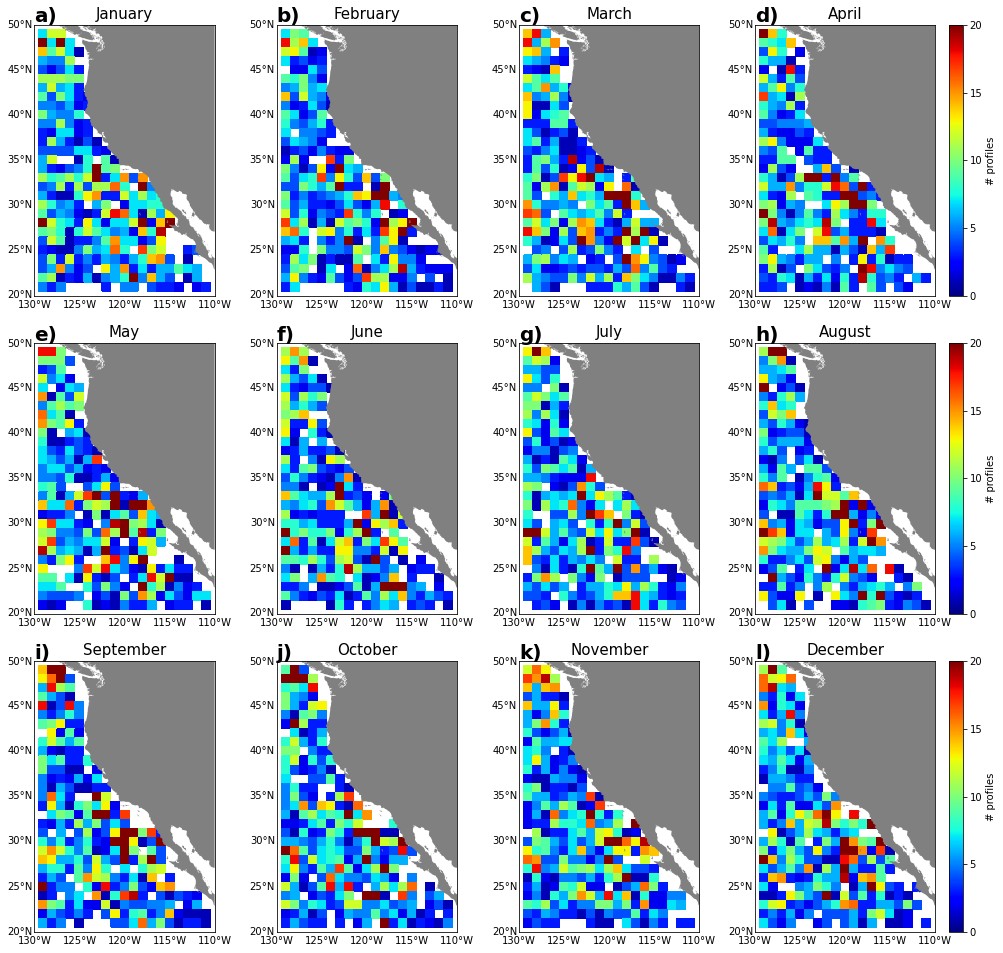

In [ ]:
import string
ticks= np.array([0,5,10,15,20]) #labels para el colorbar
x1= np.arange(-130+0.5, -110+0.5,1);y1= list(np.arange(20+0.5,50+0.5,1));y1=y1[::-1];y1= np.array(y1);
w=0.23;h=0.17
meses=['January','February','March','April','May','June','July','August','September','October','November','December']
# atributos [left, bottom, width,height] en escala (0,1)
list_o=[[0,0.9,w,h],[0.2,0.9,w,h],[0.4,0.9,w,h],[0.6,0.9,w,h],
        [0,0.70,w,h],[0.2,0.7,w,h],[0.4,0.7,w,h],[0.6,0.7,w,h],
        [0,0.5,w,h],[0.2,0.5,w,h],[0.4,0.5,w,h],[0.6,0.5,w,h],]
fig = plt.figure(figsize=(3.3*5.1,4.7*4.7)) # tamaño de figura
for i,j in zip(list_o,range(len(lista_conteos))):
  ax = plt.axes(i)
  ax.text(0.,1.01,string.ascii_lowercase[j]+')',fontsize=20, fontweight = 'bold', transform = ax.transAxes)
  ax.set_title(meses[j], fontsize=15)
  m=Basemap(projection='cyl',llcrnrlon=-130,llcrnrlat=20,urcrnrlon=-110,urcrnrlat=50, resolution ='h')
  x, y = m(x1, y1)
  z= lista_conteos[j]
  cmap= plt.get_cmap("jet")
  cs=m.pcolormesh(x1, y1, z,cmap='jet',shading='flat',latlon=True,vmin=0, vmax=20)
  m.drawcoastlines(color='white',zorder=0)
  m.fillcontinents(color='grey',lake_color='grey')
  m.drawparallels(np.arange(20,51,5.),labels=[1,0,0,0],linewidth=0.0)
  m.drawmeridians([-130,-125,-120,-115,-110],labels=[0,0,0,1],linewidth=0.0)
  if j in [3,7,11]:
    cbar=plt.colorbar(ticks=ticks)
    cbar.set_label('# profiles', rotation=90)

## Leer datos Producto reanalisis

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/GLOBAL_REANALYSIS_PHY_SSS/California/Data_anual/'
reanal=xr.open_dataset('GLOBAL_REANALYSIS_PHY_SSS.nc').groupby("time.month").mean()
reanal

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/GLOBAL_REANALYSIS_PHY_SSS/California/Data_anual


<xarray.Dataset>
Dimensions:  (lon: 81, lat: 121, month: 12)
Coordinates:
  * lon      (lon) float32 230.0 230.2 230.5 230.8 ... 249.2 249.5 249.8 250.0
  * lat      (lat) float32 20.0 20.25 20.5 20.75 21.0 ... 49.25 49.5 49.75 50.0
    depth    float32 0.5058
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    SSS      (month, lat, lon) float32 34.7 34.69 34.69 34.69 ... nan nan nan

**Filtro de 0 -100 dbar** (ARGO)

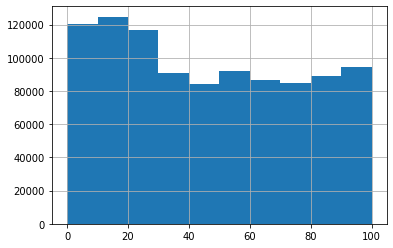

In [ ]:
ds_final = ds_final[ds_final['Pres_Adj']< 100]
ds_final.Pres_Adj.hist()

In [ ]:
# crear dataframes para cada mes a analizar, agrupar y sacar la media para evitar duplicados
lista_dfs=[]
for i in range(12):
  mes_i= ds_final[ds_final.Month == i+1]
  mes_i=mes_i[['Lon','Lat','Pres_Adj','Sal_Adj','Ciclo','Id']].groupby(by=['Lon','Lat','Ciclo','Pres_Adj','Id']).mean()
  mes_i=mes_i.reset_index()
  print('Mes: ', i+1, '- Dimension:',mes_i.shape)
  lista_dfs.append(mes_i)

Mes:  1 - Dimension: (71182, 6)
Mes:  2 - Dimension: (65419, 6)
Mes:  3 - Dimension: (81223, 6)
Mes:  4 - Dimension: (75919, 6)
Mes:  5 - Dimension: (77108, 6)
Mes:  6 - Dimension: (73108, 6)
Mes:  7 - Dimension: (75780, 6)
Mes:  8 - Dimension: (78619, 6)
Mes:  9 - Dimension: (76375, 6)
Mes:  10 - Dimension: (77902, 6)
Mes:  11 - Dimension: (83454, 6)
Mes:  12 - Dimension: (84734, 6)


## Ejemplo de prueba para un mes (Interpolacion vertical Akima)

Ciclo 139 ......................... Check
Ciclo 138 ......................... Check


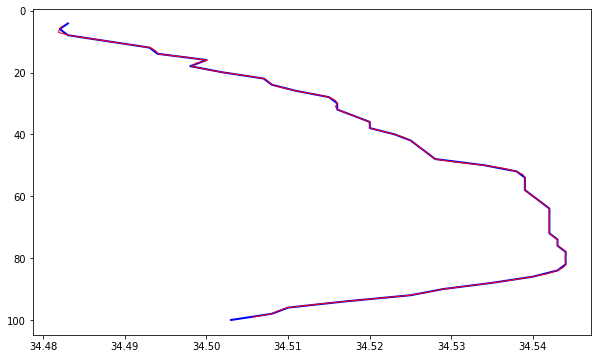

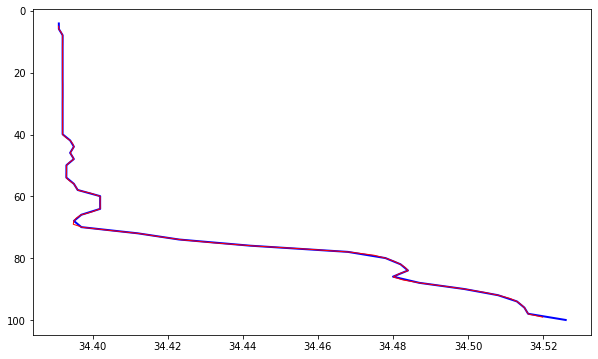

In [ ]:
import scipy.interpolate
from scipy.interpolate import interp1d
from scipy.interpolate import Akima1DInterpolator
import math
import warnings
from itertools import repeat
warnings.filterwarnings("ignore") # Ignorar warnings
enero= lista_dfs[0]
############################################################################################################33
ids= list(enero.Id.unique()) # Ids unicos del dataframe
ciclos= list(enero.Ciclo.unique()) # ciclos unicos del dataframe
dfs= [] # Lista donde voy a almacener cada uno de los dataframes resultantes de la interpolacion
# Creacion de ciclo for para hacer interpolacion
for i in ids[0:1]: # Iterar solo el primer elemento (al final seria 0:len(ids))
  #print('------------------------------------')
  #print('Id :',i)
  #print('Ciclos disponibles:', ds_3D_m[ds_3D_m['Id']==i].Ciclo.unique()) # Solo para ver los ciclos del primer id
  ciclos=enero[enero['Id']==i].Ciclo.unique()
  for j in ciclos:
    print('Ciclo',j,'......................... Check')
    # Filtro del id y ciclo respectivo
    ds= enero[(enero['Id']==i) & (enero['Ciclo']==j)] # Variable local (se sobre escribe cada vez)
    # Hacer el subset entre 0 y 2000 dbar para que no haya problemas de consistencia
    ds= ds[(ds['Pres_Adj']>=0) &(ds['Pres_Adj']<=100)] # Importante para que todos los valores queden entre 0 y 2000 dbar
    #print(ds) # Si se quiere ver el dataframe original
    # Extraer presion, temperatura y salinidad
    pres= ds.Pres_Adj; S= ds.Sal_Adj; # Variables locales otra vez
    # Objetos interpoladores de Salinidad y Temperatura
    # Caso 1: Spline (Espero que de mejor)
    spline_S= Akima1DInterpolator(pres,S) # Mejor metodo que encontre
    # Ahora se hace la interpolacion entre el rango de valores de presion:
    min_pres= math.floor(np.min(pres));max_pres= math.ceil(np.max(pres))
    # Crear la secuencia de valores entre el minimo y maximo encontrado en el perfil para interpolar
    pres_new= np.arange(min_pres,max_pres+1,1)
    # Interpolar T y S con (Metodo: Splines)
    S_new=spline_S(pres_new)
    #################################################################
    # Nueva grafica
    plt.figure(figsize=(10,6))
    plt.plot(ds.Sal_Adj,ds.Pres_Adj,color='b',linewidth=2)
    plt.plot(S_new,pres_new,color='r',linewidth=1)
    plt.gca().invert_yaxis()
    #################################################################
     # Crear el dataframe para cada perfil
    df_ts=pd.DataFrame();
    # Agregar lat y lon, id y ciclo automatica
    lat_0=ds.Lat.reset_index(drop=True);lon_0=ds.Lon.reset_index(drop=True);id_0=ds.Id.reset_index(drop=True);ciclo_0=ds.Ciclo.reset_index(drop=True)  
    # Valores de 0 a 2000 dbar espaciados cada 1 dbar
    df_ts['Presion_interp']=np.arange(0,100+1,1)
    df_ts['Lon']= np.repeat(lon_0[0],101);df_ts['Lat']= np.repeat(lat_0[0],101)
    df_ts['Id']= np.repeat(id_0[0],101);df_ts['Ciclo']= np.repeat(ciclo_0[0],101);
    df_ts['S_interp']=np.nan; df_ts['S_interp'][min_pres:max_pres+1]= S_new;
    #print(df_ts)
    # Concatenar todos los dataframes en dfs
    dfs.append(df_ts)

## Creacion de funcion para generalizar

In [ ]:
import scipy.interpolate
from scipy.interpolate import interp1d
from scipy.interpolate import Akima1DInterpolator
import math
import warnings
from itertools import repeat
warnings.filterwarnings("ignore") # Ignorar warnings
def interpolador_capas(dataframe, max_depth, intervalo):
  '''
  dataframe= pandas dataframe con columnas Lon, Lat,ciclo, Pres_adj, Id, Variable
  max_depth= valor entero de profundidad maxima a interpolar
  intervalo= intervalo de profundidad en m para interpolacion
  '''
  # Enfocarme en estas profundidades
  lista_prof = list(np.arange(0,max_depth+1,intervalo)) # Intervalos de 5m para extraer capas
  ############################################################################################################33
  ds_3D_m=dataframe
  ids= list(ds_3D_m.Id.unique()) # Ids unicos del dataframe
  ciclos= list(ds_3D_m.Ciclo.unique()) # ciclos unicos del dataframe
  dfs= [] # Lista donde voy a almacener cada uno de los dataframes resultantes de la interpolacion
  for i in ids: 
    # Iterar solo el primer elemento (al final seria 0:len(ids))
    #print('------------------------------------')
    #print('Id :',i,'................... Check')
    #print('Ciclos disponibles:', ds_3D_m[ds_3D_m['Id']==i].Ciclo.unique()) # Solo para ver los ciclos del primer id
    ciclos=ds_3D_m[ds_3D_m['Id']==i].Ciclo.unique()
    for j in ciclos:
      #print('Ciclo',j,'......................... Check')
      # Filtro del id y ciclo respectivo
      ds= ds_3D_m[(ds_3D_m['Id']==i) & (ds_3D_m['Ciclo']==j)] # Variable local (se sobre escribe cada vez)
      # Hacer el subset entre 0 y 2000 dbar para que no haya problemas de consistencia
      ds= ds[(ds['Pres_Adj']>=0) &(ds['Pres_Adj']<=max_depth)] # Importante para que todos los valores queden entre 0 y 2000 dbar
      # Extraer presion, temperatura y salinidad
      pres= ds.Pres_Adj;S= ds.Sal_Adj; # Variables locales otra vez
      # Objetos interpoladores de Salinidad y Temperatura
      # Caso 1: Spline (Espero que de mejor)
      try:
        spline_S= Akima1DInterpolator(pres,S) # Mejor metodo que encontre
        # Ahora se hace la interpolacion entre el rango de valores de presion:
        min_pres= math.floor(np.min(pres));max_pres= math.ceil(np.max(pres))
        # Crear la secuencia de valores entre el minimo y maximo encontrado en el perfil para interpolar
        pres_new= np.arange(min_pres,max_pres+1,1)
        S_new=spline_S(pres_new)# Interpolar T y S con (Metodo: Splines)
        df_ts=pd.DataFrame();# Crear el dataframe para cada perfil
        # Agregar lat y lon, id y ciclo automatica
        lat_0=ds.Lat.reset_index(drop=True);lon_0=ds.Lon.reset_index(drop=True);id_0=ds.Id.reset_index(drop=True);ciclo_0=ds.Ciclo.reset_index(drop=True)  
        df_ts['Presion_interp']=np.arange(0,max_depth+1,1)
        df_ts['Lon']= np.repeat(lon_0[0],max_depth+1);df_ts['Lat']= np.repeat(lat_0[0],max_depth+1)
        df_ts['Id']= np.repeat(id_0[0],max_depth+1);df_ts['Ciclo']= np.repeat(ciclo_0[0],max_depth+1);
        df_ts['S_interp']=np.nan;df_ts['S_interp'][min_pres:max_pres+1]= S_new;
        # Hacer el subset a las profundidades deseadas
        df_ts= df_ts[df_ts['Presion_interp'].isin(lista_prof)]
        dfs.append(df_ts)# Concatenar todos los dataframes en dfs
      except:
        print('Intento fallido en Id:',i, 'Ciclo',j)
        pass
  # Interpolar para llenar la capa superficial
  dfs_final=[]
  for i in dfs:
    try:
      data_f= i.interpolate(method='spline', order=1,limit_direction='backward')
      dfs_final.append(data_f)# Agregar los dataframes
    except:
      dfs_final.append(i)
  print('Tamaño de los dataframes generados :',len(dfs_final))
  df_final= pd.concat(dfs_final)
  # Agrupar por cada Lat, Lon y Presion sacando la media que no tiene en cuenta los nan
  df_final=df_final[['Presion_interp','Lon','Lat','S_interp']].groupby(by=['Lon','Lat','Presion_interp']).mean().reset_index()
  print(df_final.shape)
  return df_final

## Validacion-Enero 

In [ ]:
enero= interpolador_capas(dataframe= lista_dfs[0], max_depth= 100, intervalo=1)
enero

In [ ]:
import scipy
from scipy.interpolate import griddata
ds_final= enero #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_jan = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(-130+0.5,-110+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(20+0.5, 50+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0=griddata(points,values, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur-Norte
  grid_z0_1=np.flip(grid_z0, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_jan.append(grid_z0_1)
datos_jan = np.stack(datos_jan)
#print(datos)
print(datos_jan.shape) 

(100, 30, 20)


In [ ]:
print(np.mean(datos_jan[0:2,:,:], axis=0).shape)
plt.imshow(np.mean(datos_jan[0:2,:,:], axis=0),cmap='jet')

In [ ]:
x1= np.arange(-130+0.5, -110+0.5,1)
y1= list(np.arange(20+0.5, 50+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
SST_jan=basemap.interp(datain=reanal.sel(month=1).SSS.values, xin=reanal.sel(month=1).lon.values-360,
                       yin=reanal.sel(month=1).lat.values,xout=X_t, yout=Y_t, order=1, masked= True)

In [ ]:
print(SST_jan.shape)
plt.imshow(SST_jan,cmap='jet')

In [ ]:
# Diferencia entre modelo y ARGO
plt.imshow(SST_jan-np.mean(datos_jan[0:2,:,:], axis=0),cmap='jet')

## Validacion-Febrero

In [ ]:
febrero= interpolador_capas(dataframe= lista_dfs[1], max_depth= 100, intervalo=1)
febrero

In [ ]:
import scipy
from scipy.interpolate import griddata
ds_final= febrero #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_feb = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(-130+0.5,-110+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(20+0.5, 50+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0=griddata(points,values, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur-Norte
  grid_z0_1=np.flip(grid_z0, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_feb.append(grid_z0_1)
datos_feb = np.stack(datos_feb)
#print(datos)
print(datos_feb.shape) 

(100, 30, 20)


In [ ]:
print(np.mean(datos_feb[0:2,:,:], axis=0).shape)
plt.imshow(np.mean(datos_feb[0:2,:,:], axis=0),cmap='jet')

In [ ]:
x1= np.arange(-130+0.5, -110+0.5,1)
y1= list(np.arange(20+0.5, 50+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
SST_feb=basemap.interp(datain=reanal.sel(month=2).SSS.values, xin=reanal.sel(month=2).lon.values-360,
                       yin=reanal.sel(month=2).lat.values,xout=X_t, yout=Y_t, order=1, masked= True)

In [ ]:
print(SST_feb.shape)
plt.imshow(SST_feb,cmap='jet')

In [ ]:
# Diferencia entre modelo y ARGO
plt.imshow(SST_feb-np.mean(datos_feb[0:2,:,:], axis=0),cmap='jet')

## Validacion-Marzo

In [ ]:
marzo= interpolador_capas(dataframe= lista_dfs[2], max_depth= 100, intervalo=1)
marzo

In [ ]:
%%time
import scipy
from scipy.interpolate import griddata
# Coordenadas para grafica
ds_final= marzo #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_mar = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(-130+0.5,-110+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(20+0.5, 50+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0=griddata(points,values, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur -Norte
  grid_z0_1=np.flip(grid_z0, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_mar.append(grid_z0_1)
datos_mar = np.stack(datos_mar)
#print(datos)
print(datos_mar.shape) 

(100, 30, 20)
CPU times: user 4.17 s, sys: 3.61 s, total: 7.77 s
Wall time: 5.09 s


In [ ]:
print(np.mean(datos_mar[0:2,:,:], axis=0).shape)
plt.imshow(np.mean(datos_mar[0:2,:,:], axis=0),cmap='jet')

In [ ]:
x1= np.arange(-130+0.5, -110+0.5,1)
y1= list(np.arange(20+0.5, 50+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
SST_mar=basemap.interp(datain=reanal.sel(month=3).SSS.values, xin=reanal.sel(month=3).lon.values-360,
                       yin=reanal.sel(month=3).lat.values,xout=X_t, yout=Y_t, order=1, masked= True)

In [ ]:
print(SST_mar.shape)
plt.imshow(SST_mar,cmap='jet')

In [ ]:
# Diferencia entre modelo y ARGO
plt.imshow(SST_mar-np.mean(datos_mar[0:2,:,:], axis=0),cmap='jet')

## Validacion-Abril

In [ ]:
abril= interpolador_capas(dataframe= lista_dfs[3], max_depth= 100, intervalo=1)
abril

In [ ]:
%%time
import scipy
from scipy.interpolate import griddata
# Coordenadas para grafica
ds_final= abril #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_abr = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(-130+0.5,-110+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(20+0.5, 50+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0=griddata(points,values, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur -Norte
  grid_z0_1=np.flip(grid_z0, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_abr.append(grid_z0_1)
datos_abr = np.stack(datos_abr)
#print(datos)
print(datos_abr.shape) 

(100, 30, 20)
CPU times: user 3.75 s, sys: 3.23 s, total: 6.98 s
Wall time: 3.61 s


In [ ]:
print(np.mean(datos_abr[0:2,:,:], axis=0).shape)
plt.imshow(np.mean(datos_abr[0:2,:,:], axis=0),cmap='jet')

In [ ]:
x1= np.arange(-130+0.5, -110+0.5,1)
y1= list(np.arange(20+0.5, 50+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
SST_abr=basemap.interp(datain=reanal.sel(month=4).SSS.values, xin=reanal.sel(month=4).lon.values-360,
                       yin=reanal.sel(month=4).lat.values,xout=X_t, yout=Y_t, order=1, masked= True)

In [ ]:
print(SST_abr.shape)
plt.imshow(SST_abr,cmap='jet')

In [ ]:
# Diferencia entre modelo y ARGO
plt.imshow(SST_abr-np.mean(datos_abr[0:2,:,:], axis=0),cmap='jet')

## Validacion-Mayo

In [ ]:
mayo= interpolador_capas(dataframe= lista_dfs[4], max_depth= 100, intervalo=1)
mayo

In [ ]:
%%time
import scipy
from scipy.interpolate import griddata
ds_final= mayo #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_may = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(-130+0.5,-110+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(20+0.5, 50+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0=griddata(points,values, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur -Norte
  grid_z0_1=np.flip(grid_z0, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_may.append(grid_z0_1)
datos_may = np.stack(datos_may)
#print(datos)
print(datos_may.shape) 

(100, 30, 20)
CPU times: user 3.82 s, sys: 3.3 s, total: 7.13 s
Wall time: 3.68 s


In [ ]:
print(np.mean(datos_may[0:2,:,:], axis=0).shape)
plt.imshow(np.mean(datos_may[0:2,:,:], axis=0),cmap='jet')

In [ ]:
x1= np.arange(-130+0.5, -110+0.5,1)
y1= list(np.arange(20+0.5, 50+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
SST_may=basemap.interp(datain=reanal.sel(month=5).SSS.values, xin=reanal.sel(month=5).lon.values-360,
                       yin=reanal.sel(month=5).lat.values,xout=X_t, yout=Y_t, order=1, masked= True)

In [ ]:
print(SST_may.shape)
plt.imshow(SST_may,cmap='jet')

In [ ]:
# Diferencia entre modelo y ARGO
plt.imshow(SST_may-np.mean(datos_may[0:2,:,:], axis=0),cmap='jet')

## Validacion-Junio

In [ ]:
junio= interpolador_capas(dataframe= lista_dfs[5], max_depth= 100, intervalo=1)
junio

In [ ]:
%%time
import scipy
from scipy.interpolate import griddata
ds_final= junio #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_jun = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(-130+0.5,-110+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(20+0.5, 50+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0=griddata(points,values, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur -Norte
  grid_z0_1=np.flip(grid_z0, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_jun.append(grid_z0_1)
datos_jun = np.stack(datos_jun)
#print(datos)
print(datos_jun.shape) 

(100, 30, 20)
CPU times: user 3.65 s, sys: 3.23 s, total: 6.88 s
Wall time: 3.55 s


In [ ]:
print(np.mean(datos_jun[0:2,:,:], axis=0).shape)
plt.imshow(np.mean(datos_jun[0:2,:,:], axis=0),cmap='jet')

In [ ]:
x1= np.arange(-130+0.5, -110+0.5,1)
y1= list(np.arange(20+0.5, 50+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
SST_jun=basemap.interp(datain=reanal.sel(month=6).SSS.values, xin=reanal.sel(month=6).lon.values-360,
                       yin=reanal.sel(month=6).lat.values,xout=X_t, yout=Y_t, order=1, masked= True)

In [ ]:
print(SST_jun.shape)
plt.imshow(SST_jun,cmap='jet')

In [ ]:
# Diferencia entre modelo y ARGO
plt.imshow(SST_jun-np.mean(datos_jun[0:2,:,:], axis=0),cmap='jet')

## Validacion-Julio

In [ ]:
julio= interpolador_capas(dataframe= lista_dfs[6], max_depth= 100, intervalo=1)
julio

In [ ]:
%%time
import scipy
from scipy.interpolate import griddata
ds_final= julio #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_jul = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(-130+0.5,-110+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(20+0.5, 50+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0=griddata(points,values, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur -Norte
  grid_z0_1=np.flip(grid_z0, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_jul.append(grid_z0_1)
datos_jul = np.stack(datos_jul)
#print(datos)
print(datos_jul.shape) 

(100, 30, 20)
CPU times: user 3.66 s, sys: 3.23 s, total: 6.89 s
Wall time: 3.56 s


In [ ]:
print(np.mean(datos_jul[0:2,:,:], axis=0).shape)
plt.imshow(np.mean(datos_jul[0:2,:,:], axis=0),cmap='jet')

In [ ]:
x1= np.arange(-130+0.5, -110+0.5,1)
y1= list(np.arange(20+0.5, 50+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
SST_jul=basemap.interp(datain=reanal.sel(month=7).SSS.values, xin=reanal.sel(month=7).lon.values-360,
                       yin=reanal.sel(month=7).lat.values,xout=X_t, yout=Y_t, order=1, masked= True)

In [ ]:
print(SST_jul.shape)
plt.imshow(SST_jul,cmap='jet')

In [ ]:
# Diferencia entre modelo y ARGO
plt.imshow(SST_jul-np.mean(datos_jul[0:2,:,:], axis=0),cmap='jet')

## Validacion-Agosto

In [ ]:
agosto= interpolador_capas(dataframe= lista_dfs[7], max_depth= 100, intervalo=1)
agosto

In [ ]:
%%time
import scipy
from scipy.interpolate import griddata
ds_final= agosto #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_ago = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(-130+0.5,-110+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(20+0.5, 50+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0=griddata(points,values, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur -Norte
  grid_z0_1=np.flip(grid_z0, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_ago.append(grid_z0_1)
datos_ago = np.stack(datos_ago)
#print(datos)
print(datos_ago.shape) 

(100, 30, 20)
CPU times: user 3.87 s, sys: 3.33 s, total: 7.2 s
Wall time: 3.69 s


In [ ]:
print(np.mean(datos_ago[0:2,:,:], axis=0).shape)
plt.imshow(np.mean(datos_ago[0:2,:,:], axis=0),cmap='jet')

In [ ]:
x1= np.arange(-130+0.5, -110+0.5,1)
y1= list(np.arange(20+0.5, 50+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
SST_ago=basemap.interp(datain=reanal.sel(month=8).SSS.values, xin=reanal.sel(month=8).lon.values-360,
                       yin=reanal.sel(month=8).lat.values,xout=X_t, yout=Y_t, order=1, masked= True)

In [ ]:
print(SST_ago.shape)
plt.imshow(SST_ago,cmap='jet')

In [ ]:
# Diferencia entre modelo y ARGO
plt.imshow(SST_ago-np.mean(datos_ago[0:2,:,:], axis=0),cmap='jet')

## Validacion-Septiembre

In [ ]:
septiembre= interpolador_capas(dataframe= lista_dfs[8], max_depth= 100, intervalo=1)
septiembre

In [ ]:
%%time
import scipy
from scipy.interpolate import griddata
ds_final= septiembre #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_sep = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(-130+0.5,-110+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(20+0.5, 50+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0=griddata(points,values, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur -Norte
  grid_z0_1=np.flip(grid_z0, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_sep.append(grid_z0_1)
datos_sep = np.stack(datos_sep)
#print(datos)
print(datos_sep.shape) 

(100, 30, 20)
CPU times: user 3.93 s, sys: 3.57 s, total: 7.5 s
Wall time: 5.49 s


In [ ]:
print(np.mean(datos_sep[0:2,:,:], axis=0).shape)
plt.imshow(np.mean(datos_sep[0:2,:,:], axis=0),cmap='jet')

In [ ]:
x1= np.arange(-130+0.5, -110+0.5,1)
y1= list(np.arange(20+0.5, 50+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
SST_sep=basemap.interp(datain=reanal.sel(month=9).SSS.values, xin=reanal.sel(month=9).lon.values-360,
                       yin=reanal.sel(month=9).lat.values,xout=X_t, yout=Y_t, order=1, masked= True)

In [ ]:
print(SST_sep.shape)
plt.imshow(SST_sep,cmap='jet')

In [ ]:
# Diferencia entre modelo y ARGO
plt.imshow(SST_sep-np.mean(datos_sep[0:2,:,:], axis=0),cmap='jet')

## Validacion-Octubre

In [ ]:
octubre= interpolador_capas(dataframe= lista_dfs[9], max_depth= 100, intervalo=1)
octubre

In [ ]:
%%time
import scipy
from scipy.interpolate import griddata
ds_final= octubre #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_oct = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(-130+0.5,-110+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(20+0.5, 50+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0=griddata(points,values, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur -Norte
  grid_z0_1=np.flip(grid_z0, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_oct.append(grid_z0_1)
datos_oct = np.stack(datos_oct)
#print(datos)
print(datos_oct.shape) 

(100, 30, 20)
CPU times: user 3.95 s, sys: 3.45 s, total: 7.39 s
Wall time: 3.8 s


In [ ]:
print(np.mean(datos_oct[0:2,:,:], axis=0).shape)
plt.imshow(np.mean(datos_oct[0:2,:,:], axis=0),cmap='jet')

In [ ]:
x1= np.arange(-130+0.5, -110+0.5,1)
y1= list(np.arange(20+0.5, 50+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
SST_oct=basemap.interp(datain=reanal.sel(month=10).SSS.values, xin=reanal.sel(month=10).lon.values-360,
                       yin=reanal.sel(month=10).lat.values,xout=X_t, yout=Y_t, order=1, masked= True)

In [ ]:
print(SST_oct.shape)
plt.imshow(SST_oct,cmap='jet')

In [ ]:
# Diferencia entre modelo y ARGO
plt.imshow(SST_oct-np.mean(datos_oct[0:2,:,:], axis=0),cmap='jet')

## Validacion-Noviembre

In [ ]:
noviembre= interpolador_capas(dataframe= lista_dfs[10], max_depth= 100, intervalo=1)
noviembre

In [ ]:
%%time
import scipy
from scipy.interpolate import griddata
ds_final= noviembre #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_nov = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(-130+0.5,-110+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(20+0.5, 50+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0=griddata(points,values, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur -Norte
  grid_z0_1=np.flip(grid_z0, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_nov.append(grid_z0_1)
datos_nov = np.stack(datos_nov)
#print(datos)
print(datos_nov.shape) 

(100, 30, 20)
CPU times: user 3.81 s, sys: 3.28 s, total: 7.09 s
Wall time: 3.65 s


In [ ]:
print(np.mean(datos_nov[0:2,:,:], axis=0).shape)
plt.imshow(np.mean(datos_nov[0:2,:,:], axis=0),cmap='jet')

In [ ]:
x1= np.arange(-130+0.5, -110+0.5,1)
y1= list(np.arange(20+0.5, 50+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
SST_nov=basemap.interp(datain=reanal.sel(month=11).SSS.values, xin=reanal.sel(month=11).lon.values-360,
                       yin=reanal.sel(month=11).lat.values,xout=X_t, yout=Y_t, order=1, masked= True)

In [ ]:
print(SST_nov.shape)
plt.imshow(SST_nov,cmap='jet')

In [ ]:
# Diferencia entre modelo y ARGO
plt.imshow(SST_nov-np.mean(datos_nov[0:2,:,:], axis=0),cmap='jet')

## Validacion-Diciembre

In [ ]:
diciembre= interpolador_capas(dataframe= lista_dfs[11], max_depth= 100, intervalo=1)
diciembre

In [ ]:
%%time
import scipy
from scipy.interpolate import griddata
ds_final= diciembre #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_dic = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(-130+0.5,-110+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(20+0.5, 50+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0=griddata(points,values, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur -Norte
  grid_z0_1=np.flip(grid_z0, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_dic.append(grid_z0_1)
datos_dic = np.stack(datos_dic)
#print(datos)
print(datos_dic.shape) 

(100, 30, 20)
CPU times: user 3.9 s, sys: 3.32 s, total: 7.23 s
Wall time: 3.71 s


In [ ]:
print(np.mean(datos_dic[0:2,:,:], axis=0).shape)
plt.imshow(np.mean(datos_dic[0:2,:,:], axis=0),cmap='jet')

In [ ]:
x1= np.arange(-130+0.5, -110+0.5,1)
y1= list(np.arange(20+0.5, 50+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
SST_dic=basemap.interp(datain=reanal.sel(month=12).SSS.values, xin=reanal.sel(month=12).lon.values-360,
                       yin=reanal.sel(month=12).lat.values,xout=X_t, yout=Y_t, order=1, masked= True)

In [ ]:
print(SST_dic.shape)
plt.imshow(SST_dic,cmap='jet')

In [ ]:
# Diferencia entre modelo y ARGO
plt.imshow(SST_dic-np.mean(datos_dic[0:2,:,:], axis=0),cmap='jet')

## Diagrama de Taylor  

In [ ]:
STD_m =[]
CORRCOEF = []
RMSE=[]
Meses=['January','February','March','April','May','June','July','August','September','October','November','December']
MARCADORES = ['s', 'v', 'X', '*', 'D','.','^','<','>','1','2','3','4','8','p','P','h','H','d']
COLORES = plt.cm.get_cmap('nipy_spectral', 24)
MODELOS=[SST_jan,SST_feb,SST_mar,SST_abr,SST_may,SST_jun,SST_jul,SST_ago,SST_sep,SST_oct,SST_nov, SST_dic]
ARGO=[np.mean(datos_jan[0:2,:,:], axis=0),np.mean(datos_feb[0:2,:,:], axis=0),np.mean(datos_mar[0:2,:,:], axis=0),
      np.mean(datos_abr[0:2,:,:], axis=0),np.mean(datos_may[0:2,:,:], axis=0),np.mean(datos_jun[0:2,:,:], axis=0),
      np.mean(datos_jul[0:2,:,:], axis=0),np.mean(datos_ago[0:2,:,:], axis=0),np.mean(datos_sep[0:2,:,:], axis=0),
      np.mean(datos_oct[0:2,:,:], axis=0),np.mean(datos_nov[0:2,:,:], axis=0),np.mean(datos_dic[0:2,:,:], axis=0)]
for k in range(1,12+1,1):
  # Extraccion de datos de modelo y satelite
  modelo= MODELOS[k-1]# aplicar media en dimension tiempo
  satelite= ARGO[k-1] # aplicar media en dimension tiempo
  # Sacar los indices que comparten en el espacio
  IND = np.invert(np.isnan(satelite) | np.isnan(modelo))
  P = modelo[IND] # Modelo
  A = satelite[IND] # Referencia Era
  DD = np.ma.std(A.ravel()) # Desviacion estandar Referencia
  P = P/DD # Normalizacion por Std referencia
  A = A/DD 
  STD_m.append(np.ma.std(P.ravel()))
  CORRCOEF.append(np.ma.corrcoef(P.ravel(), A.ravel()).data[0,1])
  RMSE.append(np.sqrt(np.mean((P-A)**2)))

In [ ]:
dfr=pd.DataFrame({'STD':STD_m,'CORR':CORRCOEF,'RMSE':RMSE,'Mes':Meses})
dfr

STD      CORR      RMSE        Mes
0   0.926956  0.975098  0.229347    January
1   0.935748  0.971232  0.243624   February
2   0.953806  0.966734  0.261826      March
3   1.019037  0.944898  0.338358      April
4   1.010325  0.954513  0.306966        May
5   1.088279  0.942433  0.367037       June
6   1.082056  0.924026  0.413807       July
7   1.043422  0.942753  0.348731     August
8   0.992808  0.952221  0.308104  September
9   0.936527  0.961924  0.274607    October
10  0.889296  0.973220  0.245004   November
11  0.890620  0.972383  0.247434   December

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/'
dfr.to_csv('Datos_Taylor_Validacion_Salinidad_California.csv',index=False)

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM


In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/'
from taylorDiagram_mod import TaylorDiagram as TaDiM

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM


In [54]:
dfr=pd.read_csv('Datos_Taylor_Validacion_Salinidad_California.csv')
STD_m =list(dfr.STD)
CORRCOEF =list(dfr.CORR)
RMSE=list(dfr.RMSE)
Meses=['January','February','March','April','May','June','July','August','September','October','November','December']
MARCADORES = ['s', 'v', 'X', '*', 'D','.','^','<','>','1','2','3','4','8','p','P','h','H','d']

Text(1.0, 0.21, 'RMSE')

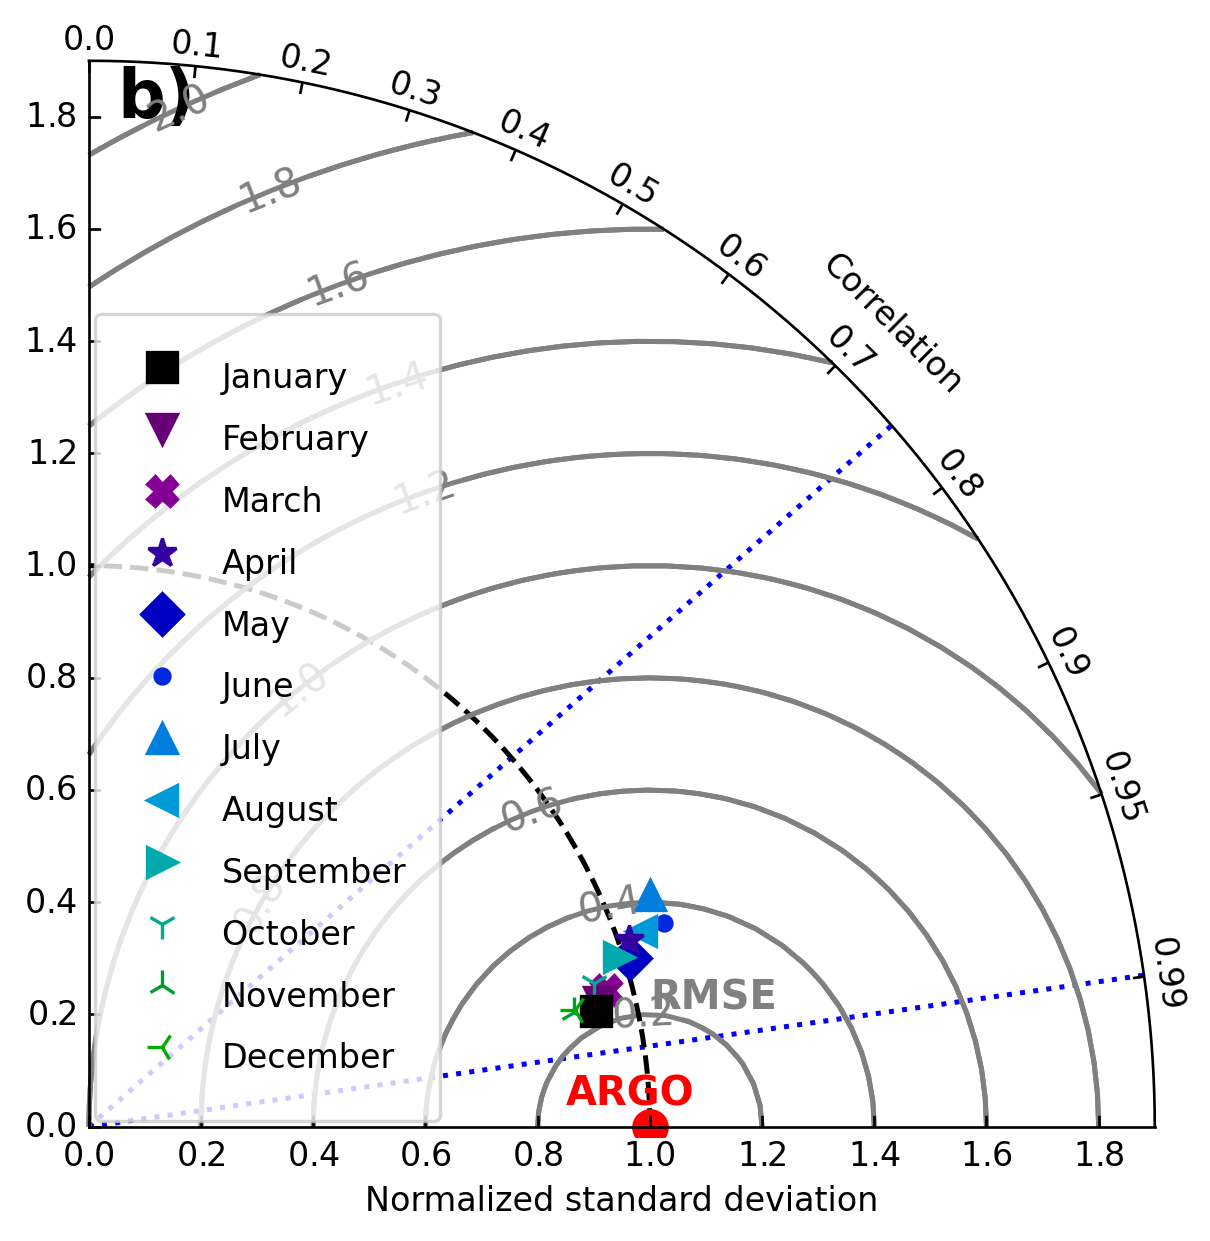

In [55]:
import numpy as NP
figID_Taylor = plt.figure(num=25, dpi=240)
figID_Taylor.set_size_inches(6., 6.)
TayDia = TaDiM(1, fig=figID_Taylor, rect=111, srange=(0., 1.9), label='ARGO')
pp=[]
for i in range(11+1):
  ttt=TayDia.add_sample(STD_m[i], CORRCOEF[i], marker=MARCADORES[i%len(MARCADORES)], linestyle='None', color=COLORES(i), ms=9)#, ax=axs.ravel()[i])
  pp.append(ttt)
contours = TayDia.add_contours(levels=10, colors='0.5')
contours = TayDia.add_contours(levels=10, colors='0.5')
plt.plot([0,NP.sqrt(1.9**2 -1.25**2)],[0,1.25], color='blue',linestyle=':') # correlacion 0.75
plt.plot([0,NP.sqrt(1.9**2 -0.27**2)],[0,0.27], color='blue',linestyle=':') # correlacion 0.99
TayDia.ax.clabel(contours, inline=1, fontsize=12, fmt='%.1f')
plt.legend(pp, Meses,  prop=dict(size='medium'), loc='lower left', borderpad=1.0, ncol=1,handleheight=2.4, labelspacing=0.05) # numpoints=1,
plt.text(0.85,0.04,'ARGO', color='red',weight='bold',fontsize=12)
#plt.text(0.85,0.35,'MMM', color='red',weight='bold')
plt.text(0.05,1.8,'b)', color='black',weight='bold', fontsize=20)
plt.text(1.00,0.21,'RMSE', color='gray',weight='bold',fontsize=12)

Text(1.0, 0.21, 'RMSE')

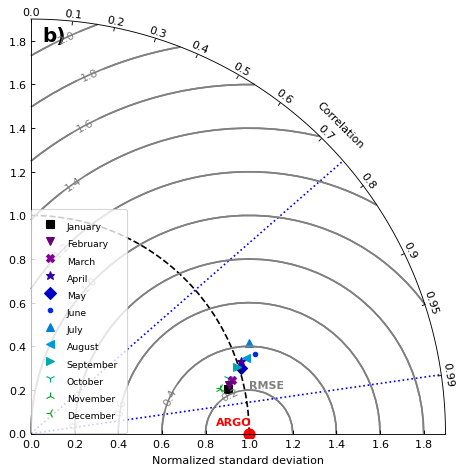

In [ ]:
import numpy as NP
figID_Taylor = plt.figure(num=11, dpi=80)
figID_Taylor.set_size_inches(7., 7.)
TayDia = TaDiM(1, fig=figID_Taylor, rect=111, srange=(0., 1.9), label='ARGO')
pp=[]
for i in range(11+1):
  ttt=TayDia.add_sample(STD_m[i], CORRCOEF[i], marker=MARCADORES[i%len(MARCADORES)], linestyle='None', color=COLORES(i), ms=8)#, ax=axs.ravel()[i])
  pp.append(ttt)
contours = TayDia.add_contours(levels=10, colors='0.5')
contours = TayDia.add_contours(levels=10, colors='0.5')
plt.plot([0,NP.sqrt(1.9**2 -1.25**2)],[0,1.25], color='blue',linestyle=':') # correlacion 0.75
plt.plot([0,NP.sqrt(1.9**2 -0.27**2)],[0,0.27], color='blue',linestyle=':') # correlacion 0.99
TayDia.ax.clabel(contours, inline=1, fontsize=10, fmt='%.1f')
plt.legend(pp, Meses,  prop=dict(size='small'), loc='lower left', borderpad=1.0, ncol=1,handleheight=2.4, labelspacing=0.05) # numpoints=1,
plt.text(0.85,0.04,'ARGO', color='red',weight='bold')
#plt.text(0.85,0.35,'MMM', color='red',weight='bold')
plt.text(0.05,1.8,'b)', color='black',weight='bold', fontsize=18)
plt.text(1.00,0.21,'RMSE', color='gray',weight='bold')

## Grafico de comparacion espacial

In [ ]:
!pip install cmocean
import cmocean

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


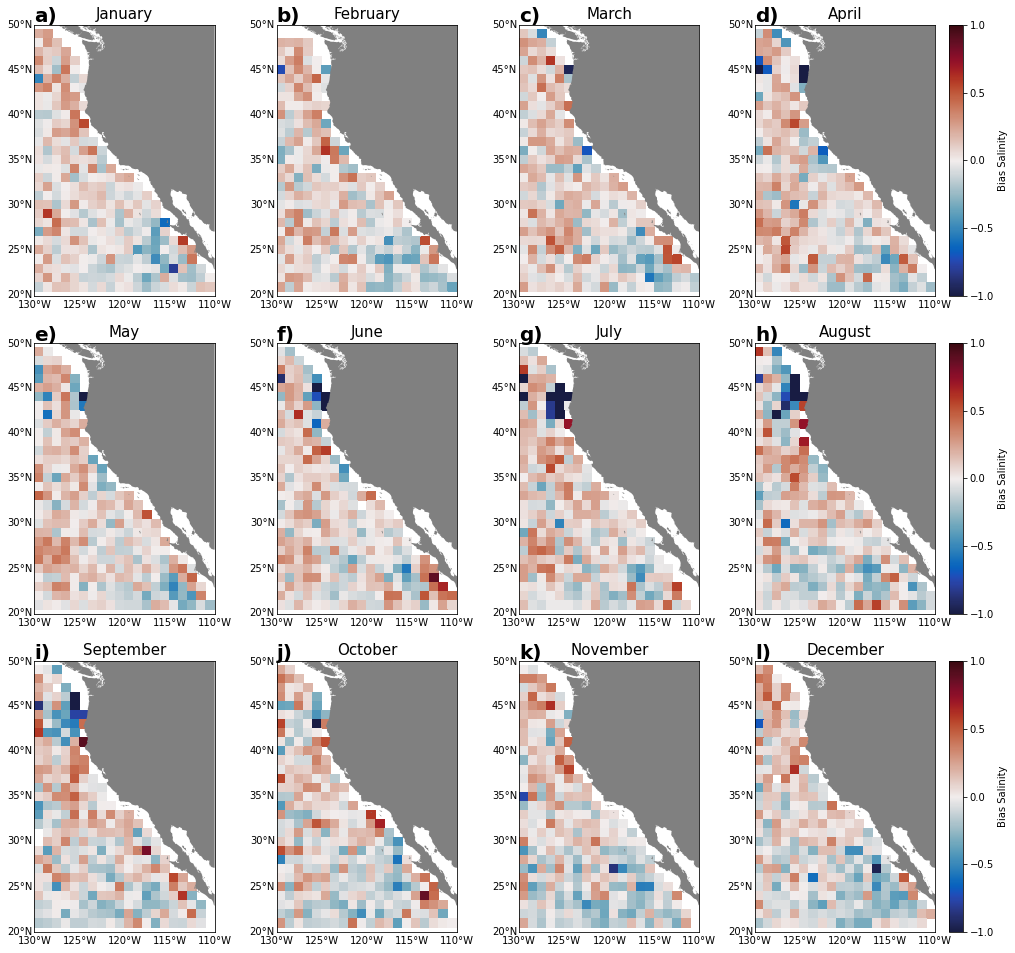

In [ ]:
import string
x1= np.arange(-130, -110+0.5,1)
y1= list(np.arange(20+0.5, 50+0.5,1));y1=y1[::-1];y1= np.array(y1)
ticks= np.array([-1,-0.5,0,0.5,1]) #labels para el colorbar
MODELOS=[SST_jan,SST_feb,SST_mar,SST_abr,SST_may,SST_jun,SST_jul,SST_ago,SST_sep,SST_oct,SST_nov, SST_dic]
ARGO=[np.mean(datos_jan[0:2,:,:], axis=0),np.mean(datos_feb[0:2,:,:], axis=0),np.mean(datos_mar[0:2,:,:], axis=0),
      np.mean(datos_abr[0:2,:,:], axis=0),np.mean(datos_may[0:2,:,:], axis=0),np.mean(datos_jun[0:2,:,:], axis=0),
      np.mean(datos_jul[0:2,:,:], axis=0),np.mean(datos_ago[0:2,:,:], axis=0),np.mean(datos_sep[0:2,:,:], axis=0),
      np.mean(datos_oct[0:2,:,:], axis=0),np.mean(datos_nov[0:2,:,:], axis=0),np.mean(datos_dic[0:2,:,:], axis=0)]
w=0.23;h=0.17
meses=['January','February','March','April','May','June','July','August','September','October','November','December']
# atributos [left, bottom, width,height] en escala (0,1)
list_o=[[0,0.9,w,h],[0.2,0.9,w,h],[0.4,0.9,w,h],[0.6,0.9,w,h],
        [0,0.70,w,h],[0.2,0.7,w,h],[0.4,0.7,w,h],[0.6,0.7,w,h],
        [0,0.5,w,h],[0.2,0.5,w,h],[0.4,0.5,w,h],[0.6,0.5,w,h],]
fig = plt.figure(figsize=(3.3*5.1,4.7*4.7)) # tamaño de figura
for i,j in zip(list_o,range(12)):
  ax = plt.axes(i)
  ax.text(0.,1.01,string.ascii_lowercase[j]+')',fontsize=20, fontweight = 'bold', transform = ax.transAxes)
  ax.set_title(meses[j], fontsize=15)
  m=Basemap(projection='cyl',llcrnrlon=-130,llcrnrlat=20,urcrnrlon=-110,urcrnrlat=50, resolution ='h')
  x, y = m(x1, y1)
  z= MODELOS[j]-ARGO[j]
  cmap= plt.get_cmap("jet")
  cs=m.pcolormesh(x1, y1, z,cmap=cmocean.cm.balance,shading='flat',latlon=True,vmin=-1, vmax=1)
  m.drawcoastlines(color='white',zorder=0)
  m.fillcontinents(color='grey',lake_color='grey')
  m.drawparallels(np.arange(20,51,5.),labels=[1,0,0,0],linewidth=0.0)
  m.drawmeridians([-130,-125,-120,-115,-110],labels=[0,0,0,1],linewidth=0.0)
  if j in [3,7,11]:
    cbar=plt.colorbar(ticks=ticks)
    cbar.set_label('Bias Salinity', rotation=90)

# Canarias

## Leer datos crudos (ARGO)

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/ARGO/Canarias/Core/'

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/ARGO/Canarias/Core


In [ ]:
import datetime as dt
ds_final=pd.read_csv('df_T_S_final.csv',sep=',')
ds_final['Fecha']=pd.to_datetime(ds_final['Fecha'])
ds_final['Year']= ds_final['Fecha'].dt.year
ds_final['Month']= ds_final['Fecha'].dt.month
ds_final['Day']= ds_final['Fecha'].dt.day
print(ds_final.shape)
ds_final.head()

(1461814, 14)


Fecha        Lon        Lat  Pres  Pres_Adj       Temp  \
0 2002-01-06 21:05:15 -24.679001  36.168999  10.0      10.0  17.400000   
1 2002-01-06 21:05:15 -24.679001  36.168999  20.0      20.0  17.384001   
2 2002-01-06 21:05:15 -24.679001  36.168999  30.0      30.0  17.379999   
3 2002-01-06 21:05:15 -24.679001  36.168999  40.0      40.0  17.375999   
4 2002-01-06 21:05:15 -24.679001  36.168999  50.0      50.0  17.378000   

    Temp_Adj        Sal    Sal_Adj  Ciclo       Id  Year  Month  Day  
0  17.400000  36.208000  36.228001      3  1900036  2002      1    6  
1  17.384001  36.212002  36.230999      3  1900036  2002      1    6  
2  17.379999  36.212002  36.231998      3  1900036  2002      1    6  
3  17.375999  36.212002  36.230999      3  1900036  2002      1    6  
4  17.378000  36.212002  36.231998      3  1900036  2002      1    6

In [ ]:
print(ds_final.shape)
df_perfil= ds_final[['Fecha','Lon','Lat','Ciclo','Month']]
df_perfil = df_perfil.drop_duplicates(subset = ['Fecha','Lon','Lat','Ciclo','Month'])
print(df_perfil.shape)
df_perfil.head()

(1461814, 14)
(28144, 5)


Fecha        Lon        Lat  Ciclo  Month
0   2002-01-06 21:05:15 -24.679001  36.168999      3      1
25  2002-02-16 03:03:30 -24.653000  35.270000      7      2
50  2002-02-26 02:55:02 -24.495001  35.235001      8      2
75  2002-03-08 02:47:37 -24.200001  35.096001      9      3
100 2002-03-18 02:41:53 -24.099001  34.852001     10      3

In [ ]:
# Conteos por mes
for i in range(1,13,1):
  mes= df_perfil[df_perfil.Month == i]
  print('Mes: ',i, len(mes.Ciclo.unique()))

Mes:  1 235
Mes:  2 237
Mes:  3 246
Mes:  4 242
Mes:  5 246
Mes:  6 267
Mes:  7 346
Mes:  8 333
Mes:  9 242
Mes:  10 241
Mes:  11 251
Mes:  12 236


In [ ]:
# Funcion para sacar el numero de perfiles por cada mes
import numpy as np
import matplotlib.pyplot as plt
def cantidad_perfiles_mes(data):
  x = data.Lon;y = data.Lat;
  # Creacion de la grilla
  gridx = np.arange(-25,-5+1,1) # valores de lon
  #print(gridx.shape);print(gridx);
  gridy = np.arange(15,45+1,1)
  #print(gridy.shape);print(gridy);
  grid, _, _ = np.histogram2d(x, y, bins=[gridx, gridy]);
  #print(grid.shape)
  # Ponerlo en el mismo sentido para que quede alineado con Chile
  grid1=np.flip(grid.T, axis=0) # Izquierda°-85W , derecha -70°W, arriba -15°S, abajo -45°S
  x1= np.arange(-25+0.5, -5+0.5,1);y1= list(np.arange(15+0.5,45+0.5,1));y1=y1[::-1];y1= np.array(y1);
  #print(x1.shape);print(y1.shape)
  # Reemplazar 0 por nan
  grid1[grid1 == 0] = np.nan
  return grid1

In [ ]:
lista_conteos=[]
for j in range(1,13,1):
  lista_conteos.append(cantidad_perfiles_mes(df_perfil[df_perfil.Month == j]))

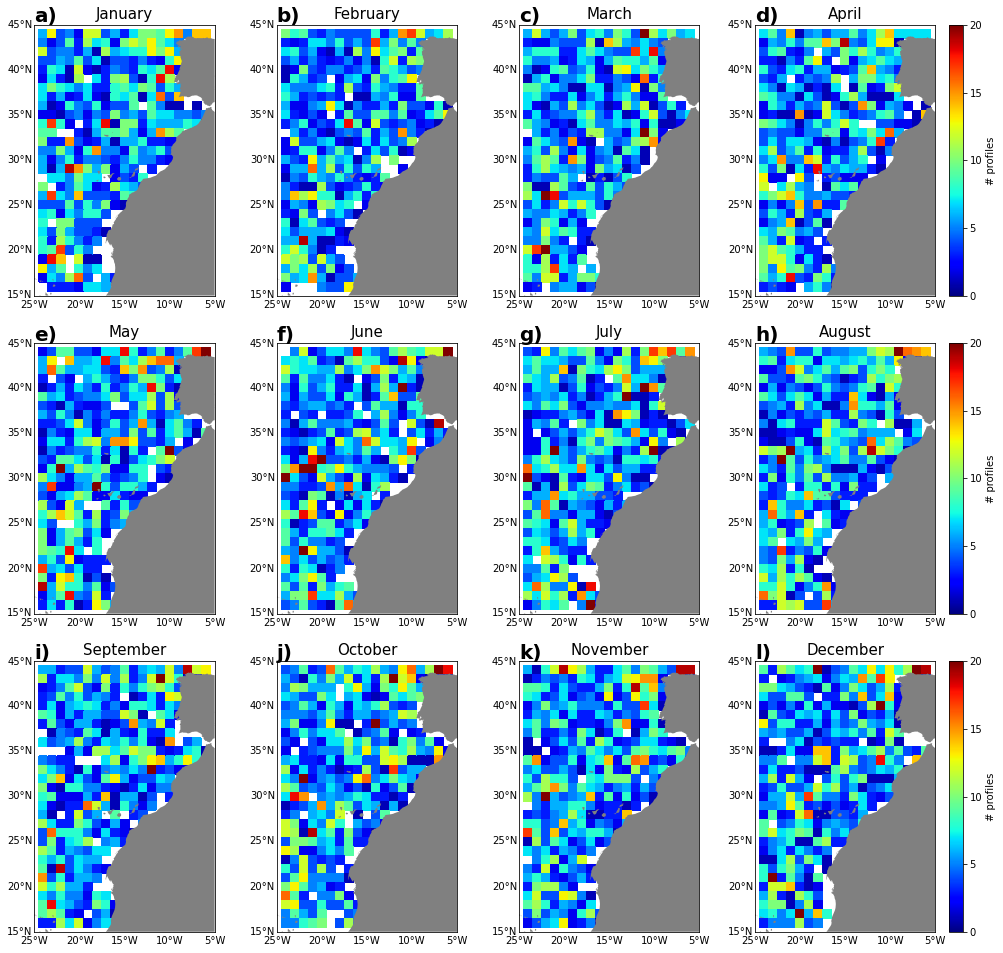

In [ ]:
import string
ticks= np.array([0,5,10,15,20]) #labels para el colorbar
x1= np.arange(-25+0.5, -5+0.5,1);y1= list(np.arange(15+0.5,45+0.5,1));y1=y1[::-1];y1= np.array(y1);
w=0.23;h=0.17
meses=['January','February','March','April','May','June','July','August','September','October','November','December']
# atributos [left, bottom, width,height] en escala (0,1)
list_o=[[0,0.9,w,h],[0.2,0.9,w,h],[0.4,0.9,w,h],[0.6,0.9,w,h],
        [0,0.70,w,h],[0.2,0.7,w,h],[0.4,0.7,w,h],[0.6,0.7,w,h],
        [0,0.5,w,h],[0.2,0.5,w,h],[0.4,0.5,w,h],[0.6,0.5,w,h],]
fig = plt.figure(figsize=(3.3*5.1,4.7*4.7)) # tamaño de figura
for i,j in zip(list_o,range(len(lista_conteos))):
  ax = plt.axes(i)
  ax.text(0.,1.01,string.ascii_lowercase[j]+')',fontsize=20, fontweight = 'bold', transform = ax.transAxes)
  ax.set_title(meses[j], fontsize=15)
  m=Basemap(projection='cyl',llcrnrlon=-25,llcrnrlat=15,urcrnrlon=-5,urcrnrlat=45, resolution ='h')
  x, y = m(x1, y1)
  z= lista_conteos[j]
  cmap= plt.get_cmap("jet")
  cs=m.pcolormesh(x1, y1, z,cmap='jet',shading='flat',latlon=True,vmin=0, vmax=20)
  m.drawcoastlines(color='white',zorder=0)
  m.fillcontinents(color='grey',lake_color='grey')
  m.drawparallels(np.arange(15,46,5.),labels=[1,0,0,0],linewidth=0.0)
  m.drawmeridians([-25,-20,-15,-10,-5],labels=[0,0,0,1],linewidth=0.0)
  if j in [3,7,11]:
    cbar=plt.colorbar(ticks=ticks)
    cbar.set_label('# profiles', rotation=90)

## Leer datos Producto reanalisis

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/GLOBAL_REANALYSIS_PHY_SSS/Canarias/Data_anual/'
reanal=xr.open_dataset('GLOBAL_REANALYSIS_PHY_SSS.nc').groupby("time.month").mean()
reanal

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/GLOBAL_REANALYSIS_PHY_SSS/Canarias/Data_anual


<xarray.Dataset>
Dimensions:  (lon: 81, lat: 121, month: 12)
Coordinates:
  * lon      (lon) float32 335.0 335.2 335.5 335.8 ... 354.2 354.5 354.8 355.0
  * lat      (lat) float32 15.0 15.25 15.5 15.75 16.0 ... 44.25 44.5 44.75 45.0
    depth    float32 0.5058
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    SSS      (month, lat, lon) float32 36.03 36.03 36.05 ... 35.63 35.62 35.61

**Filtro de 0 -100 dbar** (ARGO)

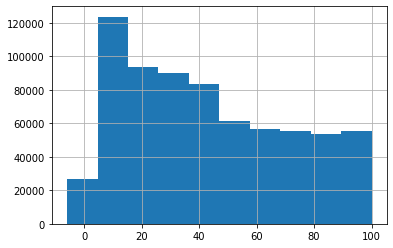

In [ ]:
ds_final = ds_final[ds_final['Pres_Adj']< 100]
ds_final.Pres_Adj.hist()

In [ ]:
# crear dataframes para cada mes a analizar, agrupar y sacar la media para evitar duplicados
lista_dfs=[]
for i in range(12):
  mes_i= ds_final[ds_final.Month == i+1]
  mes_i=mes_i[['Lon','Lat','Pres_Adj','Sal_Adj','Ciclo','Id']].groupby(by=['Lon','Lat','Ciclo','Pres_Adj','Id']).mean()
  mes_i=mes_i.reset_index()
  print('Mes: ', i+1, '- Dimension:',mes_i.shape)
  lista_dfs.append(mes_i)

Mes:  1 - Dimension: (46177, 6)
Mes:  2 - Dimension: (40446, 6)
Mes:  3 - Dimension: (47835, 6)
Mes:  4 - Dimension: (48025, 6)
Mes:  5 - Dimension: (60347, 6)
Mes:  6 - Dimension: (82578, 6)
Mes:  7 - Dimension: (84091, 6)
Mes:  8 - Dimension: (65068, 6)
Mes:  9 - Dimension: (50971, 6)
Mes:  10 - Dimension: (55619, 6)
Mes:  11 - Dimension: (55597, 6)
Mes:  12 - Dimension: (53312, 6)


## Ejemplo de prueba para un mes (Interpolacion vertical Akima)

------------------------------------
Id : 1900983
Ciclo 40 ......................... Check
Ciclo 39 ......................... Check
Ciclo 76 ......................... Check
Ciclo 5 ......................... Check
Ciclo 4 ......................... Check
Ciclo 3 ......................... Check


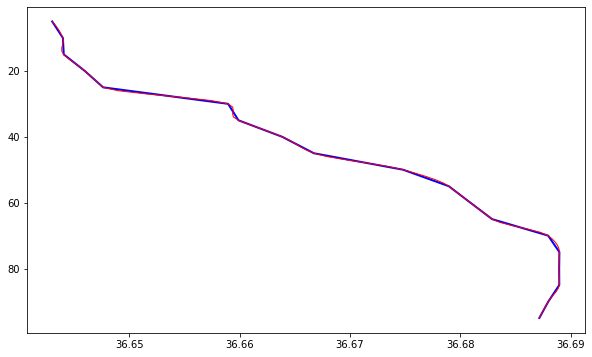

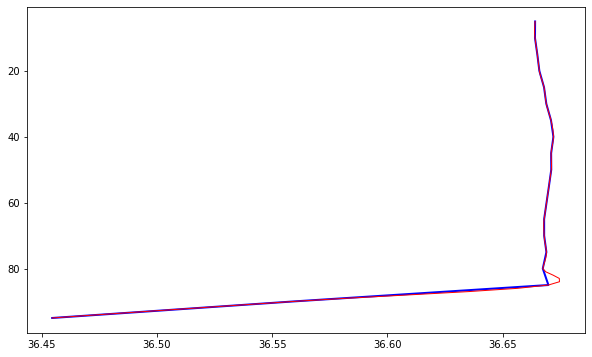

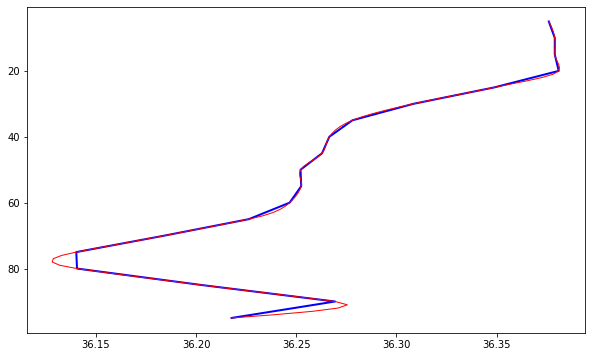

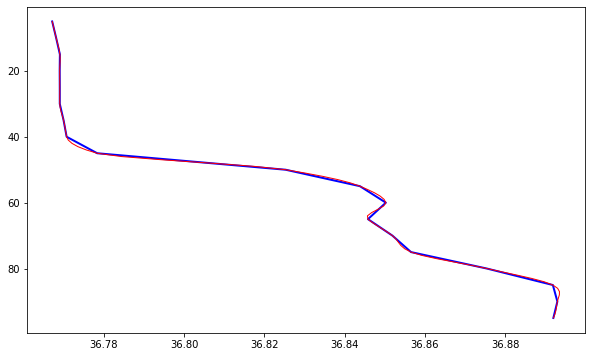

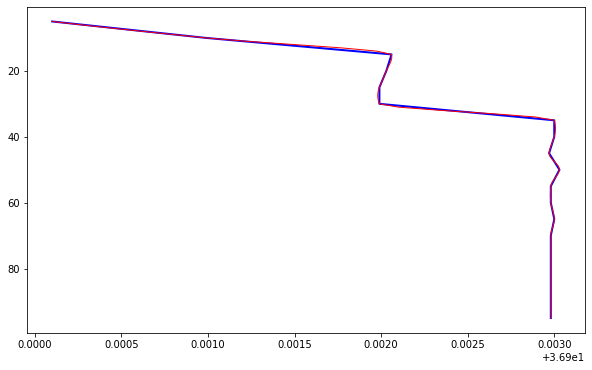

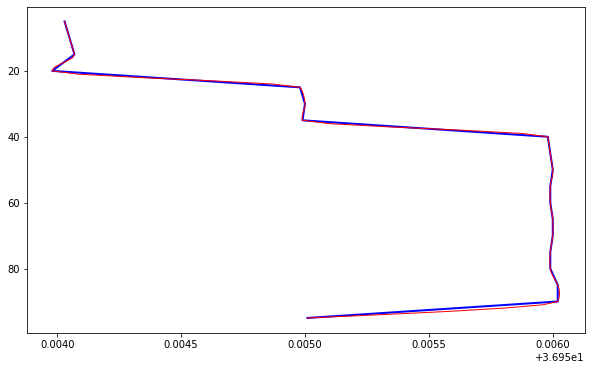

In [ ]:
import scipy.interpolate
from scipy.interpolate import interp1d
from scipy.interpolate import Akima1DInterpolator
import math
import warnings
from itertools import repeat
warnings.filterwarnings("ignore") # Ignorar warnings
enero= lista_dfs[0]
############################################################################################################33
ids= list(enero.Id.unique()) # Ids unicos del dataframe
ciclos= list(enero.Ciclo.unique()) # ciclos unicos del dataframe
dfs= [] # Lista donde voy a almacener cada uno de los dataframes resultantes de la interpolacion
# Creacion de ciclo for para hacer interpolacion
for i in ids[0:1]: # Iterar solo el primer elemento (al final seria 0:len(ids))
  print('------------------------------------')
  print('Id :',i)
  #print('Ciclos disponibles:', ds_3D_m[ds_3D_m['Id']==i].Ciclo.unique()) # Solo para ver los ciclos del primer id
  ciclos=enero[enero['Id']==i].Ciclo.unique()
  for j in ciclos:
    print('Ciclo',j,'......................... Check')
    # Filtro del id y ciclo respectivo
    ds= enero[(enero['Id']==i) & (enero['Ciclo']==j)] # Variable local (se sobre escribe cada vez)
    # Hacer el subset entre 0 y 2000 dbar para que no haya problemas de consistencia
    ds= ds[(ds['Pres_Adj']>=0) &(ds['Pres_Adj']<=100)] # Importante para que todos los valores queden entre 0 y 2000 dbar
    #print(ds) # Si se quiere ver el dataframe original
    # Extraer presion, temperatura y salinidad
    pres= ds.Pres_Adj; S= ds.Sal_Adj; # Variables locales otra vez
    # Objetos interpoladores de Salinidad y Temperatura
    # Caso 1: Spline (Espero que de mejor)
    spline_S= Akima1DInterpolator(pres,S) # Mejor metodo que encontre
    # Ahora se hace la interpolacion entre el rango de valores de presion:
    min_pres= math.floor(np.min(pres));max_pres= math.ceil(np.max(pres))
    # Crear la secuencia de valores entre el minimo y maximo encontrado en el perfil para interpolar
    pres_new= np.arange(min_pres,max_pres+1,1)
    # Interpolar T y S con (Metodo: Splines)
    S_new=spline_S(pres_new)
    #################################################################
    # Nueva grafica
    plt.figure(figsize=(10,6))
    plt.plot(ds.Sal_Adj,ds.Pres_Adj,color='b',linewidth=2)
    plt.plot(S_new,pres_new,color='r',linewidth=1)
    plt.gca().invert_yaxis()
    #################################################################
     # Crear el dataframe para cada perfil
    df_ts=pd.DataFrame();
    # Agregar lat y lon, id y ciclo automatica
    lat_0=ds.Lat.reset_index(drop=True);lon_0=ds.Lon.reset_index(drop=True);id_0=ds.Id.reset_index(drop=True);ciclo_0=ds.Ciclo.reset_index(drop=True)  
    # Valores de 0 a 2000 dbar espaciados cada 1 dbar
    df_ts['Presion_interp']=np.arange(0,100+1,1)
    df_ts['Lon']= np.repeat(lon_0[0],101);df_ts['Lat']= np.repeat(lat_0[0],101)
    df_ts['Id']= np.repeat(id_0[0],101);df_ts['Ciclo']= np.repeat(ciclo_0[0],101);
    df_ts['S_interp']=np.nan; df_ts['S_interp'][min_pres:max_pres+1]= S_new;
    #print(df_ts)
    # Concatenar todos los dataframes en dfs
    dfs.append(df_ts)

## Creacion de funcion para generalizar

In [ ]:
import scipy.interpolate
from scipy.interpolate import interp1d
from scipy.interpolate import Akima1DInterpolator
import math
import warnings
from itertools import repeat
warnings.filterwarnings("ignore") # Ignorar warnings
def interpolador_capas(dataframe, max_depth, intervalo):
  '''
  dataframe= pandas dataframe con columnas Lon, Lat,ciclo, Pres_adj, Id, Variable
  max_depth= valor entero de profundidad maxima a interpolar
  intervalo= intervalo de profundidad en m para interpolacion
  '''
  # Enfocarme en estas profundidades
  lista_prof = list(np.arange(0,max_depth+1,intervalo)) # Intervalos de 5m para extraer capas
  ############################################################################################################33
  ds_3D_m=dataframe
  ids= list(ds_3D_m.Id.unique()) # Ids unicos del dataframe
  ciclos= list(ds_3D_m.Ciclo.unique()) # ciclos unicos del dataframe
  dfs= [] # Lista donde voy a almacener cada uno de los dataframes resultantes de la interpolacion
  for i in ids: 
    # Iterar solo el primer elemento (al final seria 0:len(ids))
    #print('------------------------------------')
    #print('Id :',i,'................... Check')
    #print('Ciclos disponibles:', ds_3D_m[ds_3D_m['Id']==i].Ciclo.unique()) # Solo para ver los ciclos del primer id
    ciclos=ds_3D_m[ds_3D_m['Id']==i].Ciclo.unique()
    for j in ciclos:
      #print('Ciclo',j,'......................... Check')
      # Filtro del id y ciclo respectivo
      ds= ds_3D_m[(ds_3D_m['Id']==i) & (ds_3D_m['Ciclo']==j)] # Variable local (se sobre escribe cada vez)
      # Hacer el subset entre 0 y 2000 dbar para que no haya problemas de consistencia
      ds= ds[(ds['Pres_Adj']>=0) &(ds['Pres_Adj']<=max_depth)] # Importante para que todos los valores queden entre 0 y 2000 dbar
      # Extraer presion, temperatura y salinidad
      pres= ds.Pres_Adj;S= ds.Sal_Adj; # Variables locales otra vez
      # Objetos interpoladores de Salinidad y Temperatura
      # Caso 1: Spline (Espero que de mejor)
      try:
        spline_S= Akima1DInterpolator(pres,S) # Mejor metodo que encontre
        # Ahora se hace la interpolacion entre el rango de valores de presion:
        min_pres= math.floor(np.min(pres));max_pres= math.ceil(np.max(pres))
        # Crear la secuencia de valores entre el minimo y maximo encontrado en el perfil para interpolar
        pres_new= np.arange(min_pres,max_pres+1,1)
        S_new=spline_S(pres_new)# Interpolar T y S con (Metodo: Splines)
        df_ts=pd.DataFrame();# Crear el dataframe para cada perfil
        # Agregar lat y lon, id y ciclo automatica
        lat_0=ds.Lat.reset_index(drop=True);lon_0=ds.Lon.reset_index(drop=True);id_0=ds.Id.reset_index(drop=True);ciclo_0=ds.Ciclo.reset_index(drop=True)  
        df_ts['Presion_interp']=np.arange(0,max_depth+1,1)
        df_ts['Lon']= np.repeat(lon_0[0],max_depth+1);df_ts['Lat']= np.repeat(lat_0[0],max_depth+1)
        df_ts['Id']= np.repeat(id_0[0],max_depth+1);df_ts['Ciclo']= np.repeat(ciclo_0[0],max_depth+1);
        df_ts['S_interp']=np.nan;df_ts['S_interp'][min_pres:max_pres+1]= S_new;
        # Hacer el subset a las profundidades deseadas
        df_ts= df_ts[df_ts['Presion_interp'].isin(lista_prof)]
        dfs.append(df_ts)# Concatenar todos los dataframes en dfs
      except:
        print('Intento fallido en Id:',i, 'Ciclo',j)
        pass
  # Interpolar para llenar la capa superficial
  dfs_final=[]
  for i in dfs:
    try:
      data_f= i.interpolate(method='spline', order=1,limit_direction='backward')
      dfs_final.append(data_f)# Agregar los dataframes
    except:
      dfs_final.append(i)
  print('Tamaño de los dataframes generados :',len(dfs_final))
  df_final= pd.concat(dfs_final)
  # Agrupar por cada Lat, Lon y Presion sacando la media que no tiene en cuenta los nan
  df_final=df_final[['Presion_interp','Lon','Lat','S_interp']].groupby(by=['Lon','Lat','Presion_interp']).mean().reset_index()
  print(df_final.shape)
  return df_final

## Validacion-Enero 

In [ ]:
enero= interpolador_capas(dataframe= lista_dfs[0], max_depth= 100, intervalo=1)
enero

In [ ]:
import scipy
from scipy.interpolate import griddata
ds_final= enero #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_jan = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(-25+0.5,-5+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(15+0.5, 45+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0=griddata(points,values, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur-Norte
  grid_z0_1=np.flip(grid_z0, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_jan.append(grid_z0_1)
datos_jan = np.stack(datos_jan)
#print(datos)
print(datos_jan.shape) 

(100, 30, 20)


In [ ]:
print(np.mean(datos_jan[0:2,:,:], axis=0).shape)
plt.imshow(np.mean(datos_jan[0:2,:,:], axis=0),cmap='jet')

In [ ]:
x1= np.arange(-25+0.5, -5+0.5,1)
y1= list(np.arange(15+0.5, 45+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
SST_jan=basemap.interp(datain=reanal.sel(month=1).SSS.values, xin=reanal.sel(month=1).lon.values-360,
                       yin=reanal.sel(month=1).lat.values,xout=X_t, yout=Y_t, order=1, masked= True)

In [ ]:
print(SST_jan.shape)
plt.imshow(SST_jan,cmap='jet')

In [ ]:
# Diferencia entre modelo y ARGO
plt.imshow(SST_jan-np.mean(datos_jan[0:2,:,:], axis=0),cmap='jet')

## Validacion-Febrero

In [ ]:
febrero= interpolador_capas(dataframe= lista_dfs[1], max_depth= 100, intervalo=1)
febrero

In [ ]:
%%time
import scipy
from scipy.interpolate import griddata
# Coordenadas para grafica
ds_final= febrero #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_feb = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(-25+0.5,-5+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(15+0.5, 45+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0=griddata(points,values, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur -Norte
  grid_z0_1=np.flip(grid_z0, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_feb.append(grid_z0_1)
datos_feb = np.stack(datos_feb)
#print(datos)
print(datos_feb.shape) 

(100, 30, 20)
CPU times: user 3.78 s, sys: 3.24 s, total: 7.02 s
Wall time: 3.62 s


In [ ]:
print(np.mean(datos_feb[0:2,:,:], axis=0).shape)
plt.imshow(np.mean(datos_feb[0:2,:,:], axis=0),cmap='jet')

In [ ]:
x1= np.arange(-25+0.5, -5+0.5,1)
y1= list(np.arange(15+0.5, 45+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
SST_feb=basemap.interp(datain=reanal.sel(month=2).SSS.values, xin=reanal.sel(month=2).lon.values-360,
                       yin=reanal.sel(month=2).lat.values,xout=X_t, yout=Y_t, order=1, masked= True)

In [ ]:
print(SST_feb.shape)
plt.imshow(SST_feb,cmap='jet')

In [ ]:
# Diferencia entre modelo y ARGO
plt.imshow(SST_feb-np.mean(datos_feb[0:2,:,:], axis=0),cmap='jet')

## Validacion-Marzo

In [ ]:
marzo= interpolador_capas(dataframe= lista_dfs[2], max_depth= 100, intervalo=1)
marzo

In [ ]:
%%time
import scipy
from scipy.interpolate import griddata
# Coordenadas para grafica
ds_final= marzo #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_mar = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(-25+0.5,-5+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(15+0.5, 45+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0=griddata(points,values, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur -Norte
  grid_z0_1=np.flip(grid_z0, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_mar.append(grid_z0_1)
datos_mar = np.stack(datos_mar)
#print(datos)
print(datos_mar.shape) 

(100, 30, 20)
CPU times: user 4.15 s, sys: 3.6 s, total: 7.75 s
Wall time: 4 s


In [ ]:
print(np.mean(datos_mar[0:2,:,:], axis=0).shape)
plt.imshow(np.mean(datos_mar[0:2,:,:], axis=0),cmap='jet')

In [ ]:
x1= np.arange(-25+0.5, -5+0.5,1)
y1= list(np.arange(15+0.5, 45+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
SST_mar=basemap.interp(datain=reanal.sel(month=3).SSS.values, xin=reanal.sel(month=3).lon.values-360,
                       yin=reanal.sel(month=3).lat.values,xout=X_t, yout=Y_t, order=1, masked= True)

In [ ]:
print(SST_mar.shape)
plt.imshow(SST_mar,cmap='jet')

In [ ]:
# Diferencia entre modelo y ARGO
plt.imshow(SST_mar-np.mean(datos_mar[0:2,:,:], axis=0),cmap='jet')

## Validacion-Abril

In [ ]:
abril= interpolador_capas(dataframe= lista_dfs[3], max_depth= 100, intervalo=1)
abril

In [ ]:
%%time
import scipy
from scipy.interpolate import griddata
# Coordenadas para grafica
ds_final= abril #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_abr = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(-25+0.5,-5+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(15+0.5, 45+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0=griddata(points,values, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur -Norte
  grid_z0_1=np.flip(grid_z0, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_abr.append(grid_z0_1)
datos_abr = np.stack(datos_abr)
#print(datos)
print(datos_abr.shape) 

(100, 30, 20)
CPU times: user 4.11 s, sys: 3.46 s, total: 7.57 s
Wall time: 3.9 s


In [ ]:
print(np.mean(datos_abr[0:2,:,:], axis=0).shape)
plt.imshow(np.mean(datos_abr[0:2,:,:], axis=0),cmap='jet')

In [ ]:
x1= np.arange(-25+0.5, -5+0.5,1)
y1= list(np.arange(15+0.5, 45+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
SST_abr=basemap.interp(datain=reanal.sel(month=4).SSS.values, xin=reanal.sel(month=4).lon.values-360,
                       yin=reanal.sel(month=4).lat.values,xout=X_t, yout=Y_t, order=1, masked= True)

In [ ]:
print(SST_abr.shape)
plt.imshow(SST_abr,cmap='jet')

In [ ]:
# Diferencia entre modelo y ARGO
plt.imshow(SST_abr-np.mean(datos_abr[0:2,:,:], axis=0),cmap='jet')

## Validacion-Mayo

In [ ]:
mayo= interpolador_capas(dataframe= lista_dfs[4], max_depth= 100, intervalo=1)
mayo

In [ ]:
%%time
import scipy
from scipy.interpolate import griddata
ds_final= mayo #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_may = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(-25+0.5,-5+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(15+0.5, 45+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0=griddata(points,values, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur -Norte
  grid_z0_1=np.flip(grid_z0, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_may.append(grid_z0_1)
datos_may = np.stack(datos_may)
#print(datos)
print(datos_may.shape) 

(100, 30, 20)
CPU times: user 4.54 s, sys: 3.94 s, total: 8.48 s
Wall time: 5.06 s


In [ ]:
print(np.mean(datos_may[0:2,:,:], axis=0).shape)
plt.imshow(np.mean(datos_may[0:2,:,:], axis=0),cmap='jet')

In [ ]:
x1= np.arange(-25+0.5, -5+0.5,1)
y1= list(np.arange(15+0.5, 45+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
SST_may=basemap.interp(datain=reanal.sel(month=5).SSS.values, xin=reanal.sel(month=5).lon.values-360,
                       yin=reanal.sel(month=5).lat.values,xout=X_t, yout=Y_t, order=1, masked= True)

In [ ]:
print(SST_may.shape)
plt.imshow(SST_may,cmap='jet')

In [ ]:
# Diferencia entre modelo y ARGO
plt.imshow(SST_may-np.mean(datos_may[0:2,:,:], axis=0),cmap='jet')

## Validacion-Junio

In [ ]:
junio= interpolador_capas(dataframe= lista_dfs[5], max_depth= 100, intervalo=1)
junio

In [ ]:
%%time
import scipy
from scipy.interpolate import griddata
ds_final= junio #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_jun = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(-25+0.5,-5+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(15+0.5, 45+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0=griddata(points,values, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur -Norte
  grid_z0_1=np.flip(grid_z0, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_jun.append(grid_z0_1)
datos_jun = np.stack(datos_jun)
#print(datos)
print(datos_jun.shape) 

(100, 30, 20)
CPU times: user 4.39 s, sys: 3.65 s, total: 8.04 s
Wall time: 4.12 s


In [ ]:
print(np.mean(datos_jun[0:2,:,:], axis=0).shape)
plt.imshow(np.mean(datos_jun[0:2,:,:], axis=0),cmap='jet')

In [ ]:
x1= np.arange(-25+0.5, -5+0.5,1)
y1= list(np.arange(15+0.5, 45+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
SST_jun=basemap.interp(datain=reanal.sel(month=6).SSS.values, xin=reanal.sel(month=6).lon.values-360,
                       yin=reanal.sel(month=6).lat.values,xout=X_t, yout=Y_t, order=1, masked= True)

In [ ]:
print(SST_jun.shape)
plt.imshow(SST_jun,cmap='jet')

In [ ]:
# Diferencia entre modelo y ARGO
plt.imshow(SST_jun-np.mean(datos_jun[0:2,:,:], axis=0),cmap='jet')

## Validacion-Julio

In [ ]:
julio= interpolador_capas(dataframe= lista_dfs[6], max_depth= 100, intervalo=1)
julio

In [ ]:
%%time
import scipy
from scipy.interpolate import griddata
ds_final= julio #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_jul = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(-25+0.5,-5+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(15+0.5, 45+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0=griddata(points,values, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur -Norte
  grid_z0_1=np.flip(grid_z0, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_jul.append(grid_z0_1)
datos_jul = np.stack(datos_jul)
#print(datos)
print(datos_jul.shape) 

(100, 30, 20)
CPU times: user 4.59 s, sys: 4.02 s, total: 8.61 s
Wall time: 4.45 s


In [ ]:
print(np.mean(datos_jul[0:2,:,:], axis=0).shape)
plt.imshow(np.mean(datos_jul[0:2,:,:], axis=0),cmap='jet')

In [ ]:
x1= np.arange(-25+0.5, -5+0.5,1)
y1= list(np.arange(15+0.5, 45+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
SST_jul=basemap.interp(datain=reanal.sel(month=7).SSS.values, xin=reanal.sel(month=7).lon.values-360,
                       yin=reanal.sel(month=7).lat.values,xout=X_t, yout=Y_t, order=1, masked= True)

In [ ]:
print(SST_jul.shape)
plt.imshow(SST_jul,cmap='jet')

In [ ]:
# Diferencia entre modelo y ARGO
plt.imshow(SST_jul-np.mean(datos_jul[0:2,:,:], axis=0),cmap='jet')

## Validacion-Agosto

In [ ]:
agosto= interpolador_capas(dataframe= lista_dfs[7], max_depth= 100, intervalo=1)
agosto

In [ ]:
%%time
import scipy
from scipy.interpolate import griddata
ds_final= agosto #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_ago = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(-25+0.5,-5+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(15+0.5, 45+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0=griddata(points,values, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur -Norte
  grid_z0_1=np.flip(grid_z0, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_ago.append(grid_z0_1)
datos_ago = np.stack(datos_ago)
#print(datos)
print(datos_ago.shape) 

(100, 30, 20)
CPU times: user 4.37 s, sys: 3.74 s, total: 8.11 s
Wall time: 4.17 s


In [ ]:
print(np.mean(datos_ago[0:2,:,:], axis=0).shape)
plt.imshow(np.mean(datos_ago[0:2,:,:], axis=0),cmap='jet')

In [ ]:
x1= np.arange(-25+0.5, -5+0.5,1)
y1= list(np.arange(15+0.5, 45+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
SST_ago=basemap.interp(datain=reanal.sel(month=8).SSS.values, xin=reanal.sel(month=8).lon.values-360,
                       yin=reanal.sel(month=8).lat.values,xout=X_t, yout=Y_t, order=1, masked= True)

In [ ]:
print(SST_ago.shape)
plt.imshow(SST_ago,cmap='jet')

In [ ]:
# Diferencia entre modelo y ARGO
plt.imshow(SST_ago-np.mean(datos_ago[0:2,:,:], axis=0),cmap='jet')

## Validacion-Septiembre

In [ ]:
septiembre= interpolador_capas(dataframe= lista_dfs[8], max_depth= 100, intervalo=1)
septiembre

In [ ]:
%%time
import scipy
from scipy.interpolate import griddata
ds_final= septiembre #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_sep = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(-25+0.5,-5+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(15+0.5, 45+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0=griddata(points,values, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur -Norte
  grid_z0_1=np.flip(grid_z0, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_sep.append(grid_z0_1)
datos_sep = np.stack(datos_sep)
#print(datos)
print(datos_sep.shape) 

(100, 30, 20)
CPU times: user 4.19 s, sys: 3.6 s, total: 7.79 s
Wall time: 4.03 s


In [ ]:
print(np.mean(datos_sep[0:2,:,:], axis=0).shape)
plt.imshow(np.mean(datos_sep[0:2,:,:], axis=0),cmap='jet')

In [ ]:
x1= np.arange(-25+0.5, -5+0.5,1)
y1= list(np.arange(15+0.5, 45+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
SST_sep=basemap.interp(datain=reanal.sel(month=9).SSS.values, xin=reanal.sel(month=9).lon.values-360,
                       yin=reanal.sel(month=9).lat.values,xout=X_t, yout=Y_t, order=1, masked= True)

In [ ]:
print(SST_sep.shape)
plt.imshow(SST_sep,cmap='jet')

In [ ]:
# Diferencia entre modelo y ARGO
plt.imshow(SST_sep-np.mean(datos_sep[0:2,:,:], axis=0),cmap='jet')

## Validacion-Octubre

In [ ]:
octubre= interpolador_capas(dataframe= lista_dfs[9], max_depth= 100, intervalo=1)
octubre

In [ ]:
%%time
import scipy
from scipy.interpolate import griddata
ds_final= octubre #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_oct = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(-25+0.5,-5+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(15+0.5, 45+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0=griddata(points,values, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur -Norte
  grid_z0_1=np.flip(grid_z0, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_oct.append(grid_z0_1)
datos_oct = np.stack(datos_oct)
#print(datos)
print(datos_oct.shape) 

(100, 30, 20)
CPU times: user 4.32 s, sys: 3.69 s, total: 8.01 s
Wall time: 4.13 s


In [ ]:
print(np.mean(datos_oct[0:2,:,:], axis=0).shape)
plt.imshow(np.mean(datos_oct[0:2,:,:], axis=0),cmap='jet')

In [ ]:
x1= np.arange(-25+0.5, -5+0.5,1)
y1= list(np.arange(15+0.5, 45+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
SST_oct=basemap.interp(datain=reanal.sel(month=10).SSS.values, xin=reanal.sel(month=10).lon.values-360,
                       yin=reanal.sel(month=10).lat.values,xout=X_t, yout=Y_t, order=1, masked= True)

In [ ]:
print(SST_oct.shape)
plt.imshow(SST_oct,cmap='jet')

In [ ]:
# Diferencia entre modelo y ARGO
plt.imshow(SST_oct-np.mean(datos_oct[0:2,:,:], axis=0),cmap='jet')

## Validacion-Noviembre

In [ ]:
noviembre= interpolador_capas(dataframe= lista_dfs[10], max_depth= 100, intervalo=1)
noviembre

In [ ]:
%%time
import scipy
from scipy.interpolate import griddata
ds_final= noviembre #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_nov = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(-25+0.5,-5+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(15+0.5, 45+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0=griddata(points,values, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur -Norte
  grid_z0_1=np.flip(grid_z0, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_nov.append(grid_z0_1)
datos_nov = np.stack(datos_nov)
#print(datos)
print(datos_nov.shape) 

(100, 30, 20)
CPU times: user 4.23 s, sys: 3.55 s, total: 7.78 s
Wall time: 4.03 s


In [ ]:
print(np.mean(datos_nov[0:2,:,:], axis=0).shape)
plt.imshow(np.mean(datos_nov[0:2,:,:], axis=0),cmap='jet')

In [ ]:
x1= np.arange(-25+0.5, -5+0.5,1)
y1= list(np.arange(15+0.5, 45+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
SST_nov=basemap.interp(datain=reanal.sel(month=11).SSS.values, xin=reanal.sel(month=11).lon.values-360,
                       yin=reanal.sel(month=11).lat.values,xout=X_t, yout=Y_t, order=1, masked= True)

In [ ]:
print(SST_nov.shape)
plt.imshow(SST_nov,cmap='jet')

In [ ]:
# Diferencia entre modelo y ARGO
plt.imshow(SST_nov-np.mean(datos_nov[0:2,:,:], axis=0),cmap='jet')

## Validacion-Diciembre

In [ ]:
diciembre= interpolador_capas(dataframe= lista_dfs[11], max_depth= 100, intervalo=1)
diciembre

In [ ]:
%%time
import scipy
from scipy.interpolate import griddata
ds_final= diciembre #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_dic = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(-25+0.5,-5+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(15+0.5, 45+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0=griddata(points,values, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur -Norte
  grid_z0_1=np.flip(grid_z0, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_dic.append(grid_z0_1)
datos_dic = np.stack(datos_dic)
#print(datos)
print(datos_dic.shape) 

(100, 30, 20)
CPU times: user 4.15 s, sys: 3.6 s, total: 7.76 s
Wall time: 3.97 s


In [ ]:
print(np.mean(datos_dic[0:2,:,:], axis=0).shape)
plt.imshow(np.mean(datos_dic[0:2,:,:], axis=0),cmap='jet')

In [ ]:
x1= np.arange(-25+0.5, -5+0.5,1)
y1= list(np.arange(15+0.5, 45+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
SST_dic=basemap.interp(datain=reanal.sel(month=12).SSS.values, xin=reanal.sel(month=12).lon.values-360,
                       yin=reanal.sel(month=12).lat.values,xout=X_t, yout=Y_t, order=1, masked= True)

In [ ]:
print(SST_dic.shape)
plt.imshow(SST_dic,cmap='jet')

In [ ]:
# Diferencia entre modelo y ARGO
plt.imshow(SST_dic-np.mean(datos_dic[0:2,:,:], axis=0),cmap='jet')

## Diagrama de Taylor  

In [ ]:
STD_m =[]
CORRCOEF = []
RMSE=[]
Meses=['January','February','March','April','May','June','July','August','September','October','November','December']
MARCADORES = ['s', 'v', 'X', '*', 'D','.','^','<','>','1','2','3','4','8','p','P','h','H','d']
COLORES = plt.cm.get_cmap('nipy_spectral', 24)
MODELOS=[SST_jan,SST_feb,SST_mar,SST_abr,SST_may,SST_jun,SST_jul,SST_ago,SST_sep,SST_oct,SST_nov, SST_dic]
ARGO=[np.mean(datos_jan[0:2,:,:], axis=0),np.mean(datos_feb[0:2,:,:], axis=0),np.mean(datos_mar[0:2,:,:], axis=0),
      np.mean(datos_abr[0:2,:,:], axis=0),np.mean(datos_may[0:2,:,:], axis=0),np.mean(datos_jun[0:2,:,:], axis=0),
      np.mean(datos_jul[0:2,:,:], axis=0),np.mean(datos_ago[0:2,:,:], axis=0),np.mean(datos_sep[0:2,:,:], axis=0),
      np.mean(datos_oct[0:2,:,:], axis=0),np.mean(datos_nov[0:2,:,:], axis=0),np.mean(datos_dic[0:2,:,:], axis=0)]
for k in range(1,12+1,1):
  # Extraccion de datos de modelo y satelite
  modelo= MODELOS[k-1]# aplicar media en dimension tiempo
  satelite= ARGO[k-1] # aplicar media en dimension tiempo
  # Sacar los indices que comparten en el espacio
  IND = np.invert(np.isnan(satelite) | np.isnan(modelo))
  P = modelo[IND] # Modelo
  A = satelite[IND] # Referencia Era
  DD = np.ma.std(A.ravel()) # Desviacion estandar Referencia
  P = P/DD # Normalizacion por Std referencia
  A = A/DD 
  STD_m.append(np.ma.std(P.ravel()))
  CORRCOEF.append(np.ma.corrcoef(P.ravel(), A.ravel()).data[0,1])
  RMSE.append(np.sqrt(np.mean((P-A)**2)))

In [ ]:
dfr=pd.DataFrame({'STD':STD_m,'CORR':CORRCOEF,'RMSE':RMSE,'Mes':Meses})
dfr

STD      CORR      RMSE        Mes
0   1.028997  0.899150  0.456720    January
1   1.029817  0.922616  0.400585   February
2   1.048754  0.917487  0.419285      March
3   1.028153  0.923652  0.397393      April
4   1.014978  0.909050  0.429957        May
5   0.958788  0.909151  0.420160       June
6   0.953121  0.892930  0.458266       July
7   0.959766  0.886598  0.470310     August
8   0.924081  0.907479  0.420434  September
9   0.970728  0.852702  0.535766    October
10  0.995948  0.817986  0.603041   November
11  0.988643  0.871248  0.505431   December

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/'
dfr.to_csv('Datos_Taylor_Validacion_Salinidad_Canarias.csv',index=False)

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM


In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/'
from taylorDiagram_mod import TaylorDiagram as TaDiM

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM


In [52]:
dfr=pd.read_csv('Datos_Taylor_Validacion_Salinidad_Canarias.csv')
STD_m =list(dfr.STD)
CORRCOEF =list(dfr.CORR)
RMSE=list(dfr.RMSE)
Meses=['January','February','March','April','May','June','July','August','September','October','November','December']
MARCADORES = ['s', 'v', 'X', '*', 'D','.','^','<','>','1','2','3','4','8','p','P','h','H','d']

Text(1.0, 0.21, 'RMSE')

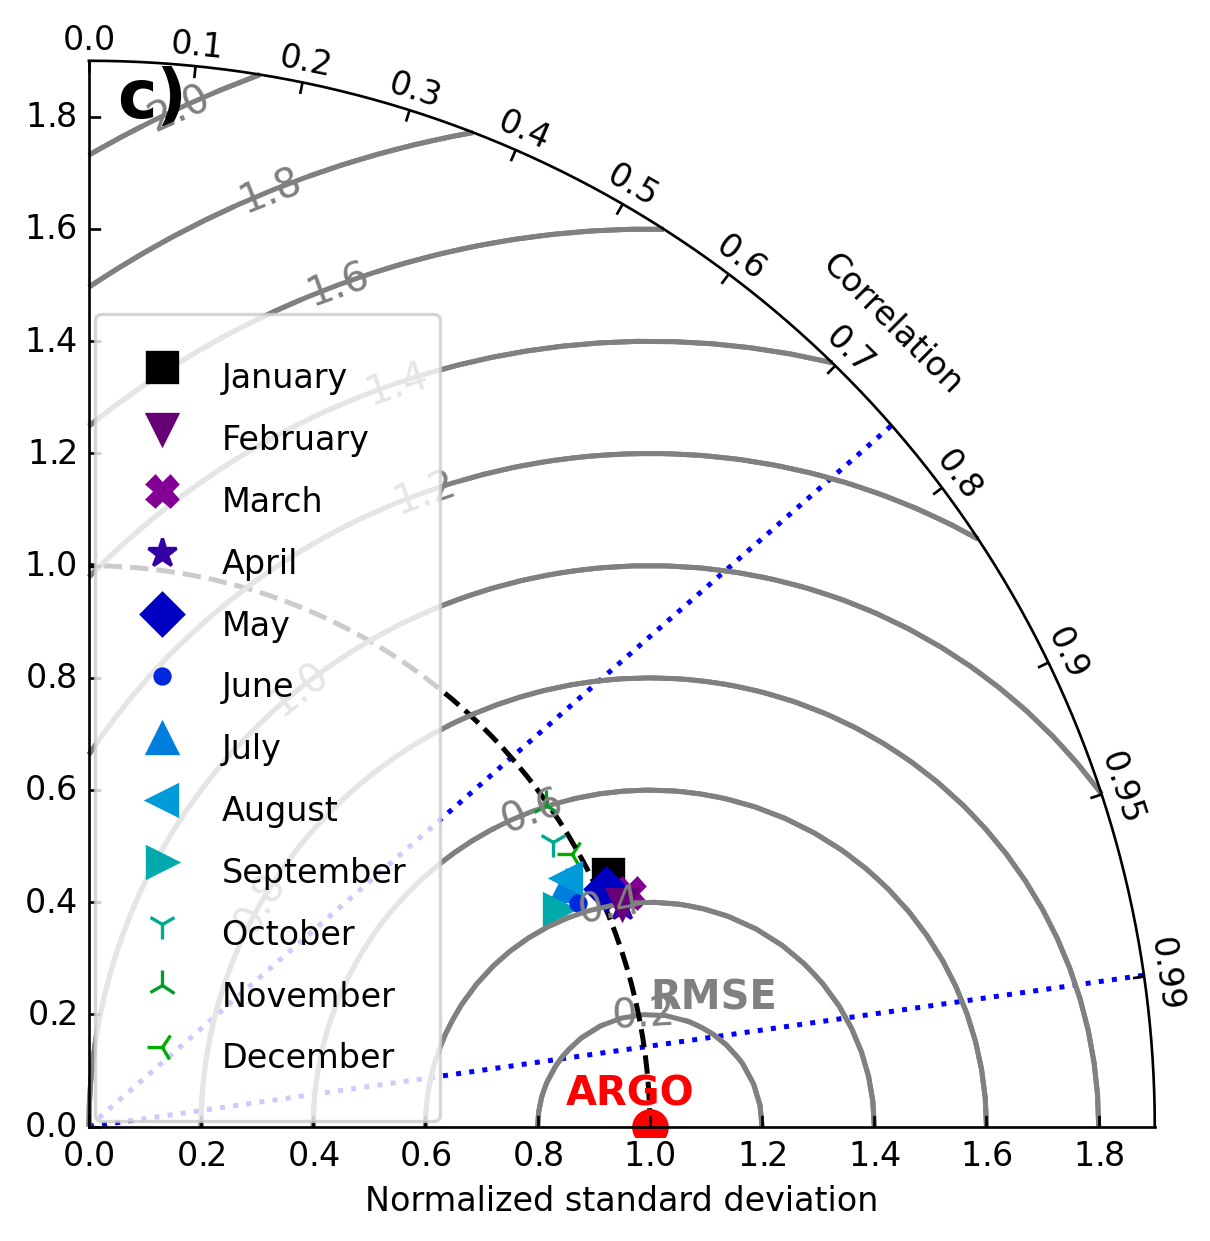

In [53]:
import numpy as NP
figID_Taylor = plt.figure(num=25, dpi=240)
figID_Taylor.set_size_inches(6., 6.)
TayDia = TaDiM(1, fig=figID_Taylor, rect=111, srange=(0., 1.9), label='ARGO')
pp=[]
for i in range(11+1):
  ttt=TayDia.add_sample(STD_m[i], CORRCOEF[i], marker=MARCADORES[i%len(MARCADORES)], linestyle='None', color=COLORES(i), ms=9)#, ax=axs.ravel()[i])
  pp.append(ttt)
contours = TayDia.add_contours(levels=10, colors='0.5')
contours = TayDia.add_contours(levels=10, colors='0.5')
plt.plot([0,NP.sqrt(1.9**2 -1.25**2)],[0,1.25], color='blue',linestyle=':') # correlacion 0.75
plt.plot([0,NP.sqrt(1.9**2 -0.27**2)],[0,0.27], color='blue',linestyle=':') # correlacion 0.99
TayDia.ax.clabel(contours, inline=1, fontsize=12, fmt='%.1f')
plt.legend(pp, Meses,  prop=dict(size='medium'), loc='lower left', borderpad=1.0, ncol=1,handleheight=2.4, labelspacing=0.05) # numpoints=1,
plt.text(0.85,0.04,'ARGO', color='red',weight='bold',fontsize=12)
#plt.text(0.85,0.35,'MMM', color='red',weight='bold')
plt.text(0.05,1.8,'c)', color='black',weight='bold', fontsize=20)
plt.text(1.00,0.21,'RMSE', color='gray',weight='bold',fontsize=12)

Text(1.0, 0.21, 'RMSE')

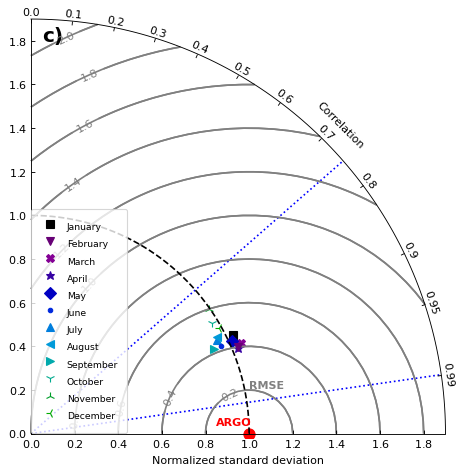

In [ ]:
import numpy as NP
figID_Taylor = plt.figure(num=11, dpi=80)
figID_Taylor.set_size_inches(7., 7.)
TayDia = TaDiM(1, fig=figID_Taylor, rect=111, srange=(0., 1.9), label='ARGO')
pp=[]
for i in range(11+1):
  ttt=TayDia.add_sample(STD_m[i], CORRCOEF[i], marker=MARCADORES[i%len(MARCADORES)], linestyle='None', color=COLORES(i), ms=8)#, ax=axs.ravel()[i])
  pp.append(ttt)
contours = TayDia.add_contours(levels=10, colors='0.5')
contours = TayDia.add_contours(levels=10, colors='0.5')
plt.plot([0,NP.sqrt(1.9**2 -1.25**2)],[0,1.25], color='blue',linestyle=':') # correlacion 0.75
plt.plot([0,NP.sqrt(1.9**2 -0.27**2)],[0,0.27], color='blue',linestyle=':') # correlacion 0.99
TayDia.ax.clabel(contours, inline=1, fontsize=10, fmt='%.1f')
plt.legend(pp, Meses,  prop=dict(size='small'), loc='lower left', borderpad=1.0, ncol=1,handleheight=2.4, labelspacing=0.05) # numpoints=1,
plt.text(0.85,0.04,'ARGO', color='red',weight='bold')
#plt.text(0.85,0.35,'MMM', color='red',weight='bold')
plt.text(0.05,1.8,'c)', color='black',weight='bold', fontsize=18)
plt.text(1.00,0.21,'RMSE', color='gray',weight='bold')

## Grafico de comparacion espacial

In [ ]:
!pip install cmocean
import cmocean

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


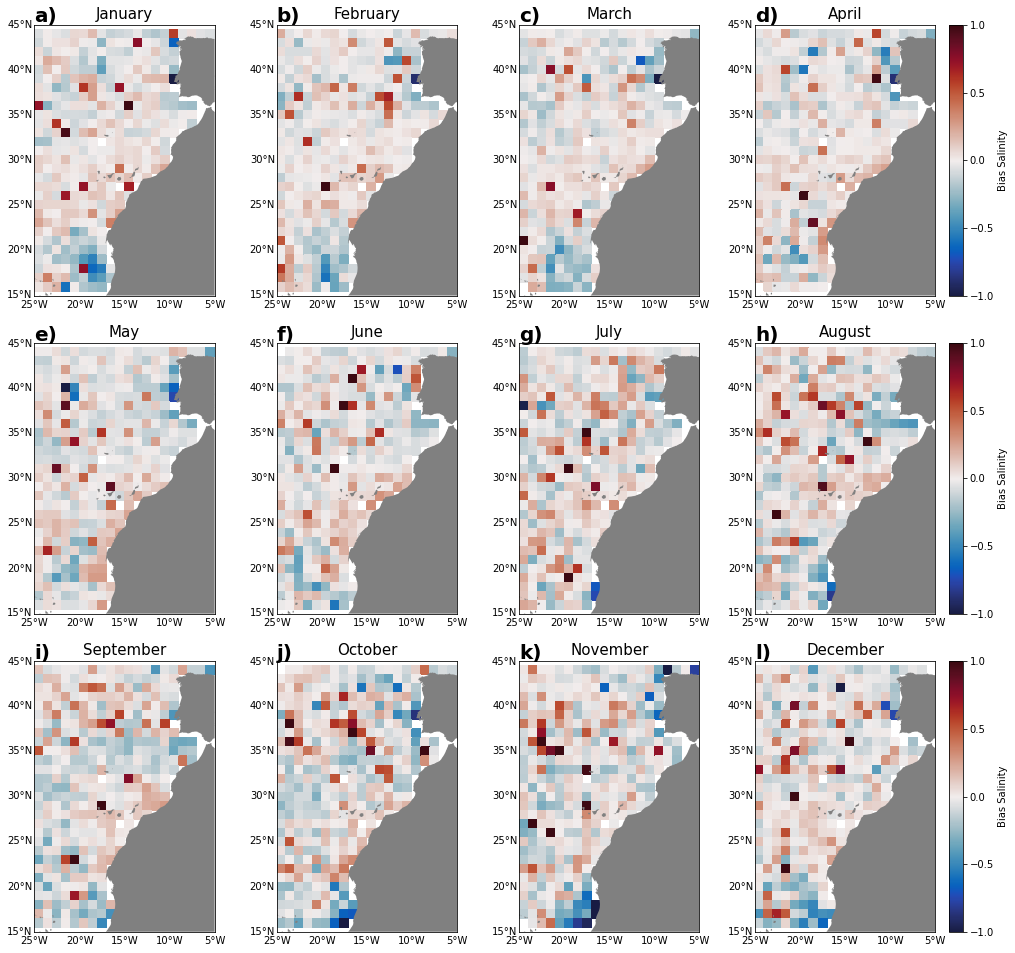

In [ ]:
import string
x1= np.arange(-25, -5+0.5,1)
y1= list(np.arange(15+0.5, 45+0.5,1));y1=y1[::-1];y1= np.array(y1)
ticks= np.array([-1,-0.5,0,0.5,1]) #labels para el colorbar
MODELOS=[SST_jan,SST_feb,SST_mar,SST_abr,SST_may,SST_jun,SST_jul,SST_ago,SST_sep,SST_oct,SST_nov, SST_dic]
ARGO=[np.mean(datos_jan[0:2,:,:], axis=0),np.mean(datos_feb[0:2,:,:], axis=0),np.mean(datos_mar[0:2,:,:], axis=0),
      np.mean(datos_abr[0:2,:,:], axis=0),np.mean(datos_may[0:2,:,:], axis=0),np.mean(datos_jun[0:2,:,:], axis=0),
      np.mean(datos_jul[0:2,:,:], axis=0),np.mean(datos_ago[0:2,:,:], axis=0),np.mean(datos_sep[0:2,:,:], axis=0),
      np.mean(datos_oct[0:2,:,:], axis=0),np.mean(datos_nov[0:2,:,:], axis=0),np.mean(datos_dic[0:2,:,:], axis=0)]
w=0.23;h=0.17
meses=['January','February','March','April','May','June','July','August','September','October','November','December']
# atributos [left, bottom, width,height] en escala (0,1)
list_o=[[0,0.9,w,h],[0.2,0.9,w,h],[0.4,0.9,w,h],[0.6,0.9,w,h],
        [0,0.70,w,h],[0.2,0.7,w,h],[0.4,0.7,w,h],[0.6,0.7,w,h],
        [0,0.5,w,h],[0.2,0.5,w,h],[0.4,0.5,w,h],[0.6,0.5,w,h],]
fig = plt.figure(figsize=(3.3*5.1,4.7*4.7)) # tamaño de figura
for i,j in zip(list_o,range(12)):
  ax = plt.axes(i)
  ax.text(0.,1.01,string.ascii_lowercase[j]+')',fontsize=20, fontweight = 'bold', transform = ax.transAxes)
  ax.set_title(meses[j], fontsize=15)
  m=Basemap(projection='cyl',llcrnrlon=-25,llcrnrlat=15,urcrnrlon=-5,urcrnrlat=45, resolution ='h')
  x, y = m(x1, y1)
  z= MODELOS[j]-ARGO[j]
  cmap= plt.get_cmap("jet")
  cs=m.pcolormesh(x1, y1, z,cmap=cmocean.cm.balance,shading='flat',latlon=True,vmin=-1, vmax=1)
  m.drawcoastlines(color='white',zorder=0)
  m.fillcontinents(color='grey',lake_color='grey')
  m.drawparallels(np.arange(15,46,5.),labels=[1,0,0,0],linewidth=0.0)
  m.drawmeridians([-25,-20,-15,-10,-5],labels=[0,0,0,1],linewidth=0.0)
  if j in [3,7,11]:
    cbar=plt.colorbar(ticks=ticks)
    cbar.set_label('Bias Salinity', rotation=90)

# Benguela

## Leer datos crudos (ARGO)

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/ARGO/Benguela/Core/'

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/ARGO/Benguela/Core


In [ ]:
import datetime as dt
ds_final=pd.read_csv('df_T_S_final.csv',sep=',')
ds_final['Fecha']=pd.to_datetime(ds_final['Fecha'])
ds_final['Year']= ds_final['Fecha'].dt.year
ds_final['Month']= ds_final['Fecha'].dt.month
ds_final['Day']= ds_final['Fecha'].dt.day
print(ds_final.shape)
ds_final.head()

(4254725, 19)


Fecha     Lon     Lat  Pres  Pres_Adj       Temp   Temp_Adj  \
0 2002-05-13 04:26:31  14.162 -31.226  10.0      10.0  19.056000  19.056000   
1 2002-05-13 04:26:31  14.162 -31.226  20.0      20.0  19.007999  19.007999   
2 2002-05-13 04:26:31  14.162 -31.226  30.0      30.0  19.002001  19.002001   
3 2002-05-13 04:26:31  14.162 -31.226  40.0      40.0  18.996000  18.996000   
4 2002-05-13 04:26:31  14.162 -31.226  50.0      50.0  18.990000  18.990000   

         Sal    Sal_Adj  Ciclo       Id  time_x  Lon_x  Lat_x  Cyc_x  Id_x  \
0  35.703999  35.704460      1  5900134     NaN    NaN    NaN    NaN   NaN   
1  35.706001  35.706120      1  5900134     NaN    NaN    NaN    NaN   NaN   
2  35.708000  35.708099      1  5900134     NaN    NaN    NaN    NaN   NaN   
3  35.703999  35.704124      1  5900134     NaN    NaN    NaN    NaN   NaN   
4  35.706001  35.706116      1  5900134     NaN    NaN    NaN    NaN   NaN   

   Year  Month  Day  
0  2002      5   13  
1  2002      5   13  
2  2002      5   13  
3  2002      5   13  
4  2002      5   13

In [ ]:
print(ds_final.shape)
df_perfil= ds_final[['Fecha','Lon','Lat','Ciclo','Month']]
df_perfil = df_perfil.drop_duplicates(subset = ['Fecha','Lon','Lat','Ciclo','Month'])
print(df_perfil.shape)
df_perfil.head()

(4254725, 19)
(20555, 5)


Fecha     Lon        Lat  Ciclo  Month
0   2002-05-13 04:26:31  14.162 -31.226000      1      5
19  2002-05-23 05:32:30  13.777 -30.617001      2      5
50  2002-06-02 05:01:06  13.338 -29.870001      3      6
84  2002-06-12 06:06:35  13.683 -29.656000      4      6
118 2002-06-22 05:34:55  14.230 -29.997000      5      6

In [ ]:
# Conteos por mes
for i in range(1,13,1):
  mes= df_perfil[df_perfil.Month == i]
  print('Mes: ',i, len(mes.Ciclo.unique()))

Mes:  1 266
Mes:  2 246
Mes:  3 255
Mes:  4 248
Mes:  5 246
Mes:  6 245
Mes:  7 251
Mes:  8 252
Mes:  9 257
Mes:  10 260
Mes:  11 265
Mes:  12 266


In [ ]:
# Funcion para sacar el numero de perfiles por cada mes
import numpy as np
import matplotlib.pyplot as plt
def cantidad_perfiles_mes(data):
  x = data.Lon;y = data.Lat;
  # Creacion de la grilla
  gridx = np.arange(5,25+1,1) # valores de lon
  #print(gridx.shape);print(gridx);
  gridy = np.arange(-40,-10+1,1)
  #print(gridy.shape);print(gridy);
  grid, _, _ = np.histogram2d(x, y, bins=[gridx, gridy]);
  #print(grid.shape)
  # Ponerlo en el mismo sentido para que quede alineado con Chile
  grid1=np.flip(grid.T, axis=0) # Izquierda°-85W , derecha -70°W, arriba -15°S, abajo -45°S
  x1= np.arange(5+0.5, 25+0.5,1);y1= list(np.arange(-40+0.5,-10+0.5,1));y1=y1[::-1];y1= np.array(y1);
  #print(x1.shape);print(y1.shape)
  # Reemplazar 0 por nan
  grid1[grid1 == 0] = np.nan
  return grid1

In [ ]:
lista_conteos=[]
for j in range(1,13,1):
  lista_conteos.append(cantidad_perfiles_mes(df_perfil[df_perfil.Month == j]))

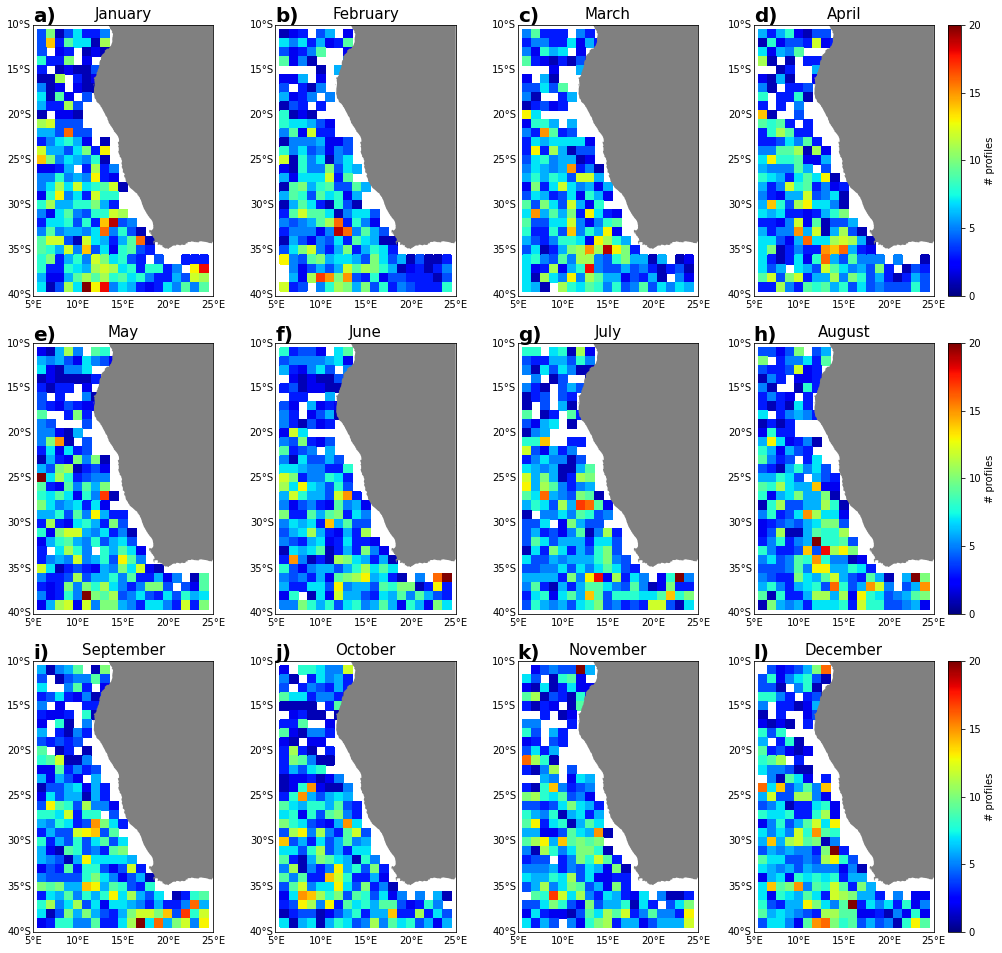

In [ ]:
import string
ticks= np.array([0,5,10,15,20]) #labels para el colorbar
x1= np.arange(5+0.5, 25+0.5,1);y1= list(np.arange(-40+0.5,-10+0.5,1));y1=y1[::-1];y1= np.array(y1);
w=0.23;h=0.17
meses=['January','February','March','April','May','June','July','August','September','October','November','December']
# atributos [left, bottom, width,height] en escala (0,1)
list_o=[[0,0.9,w,h],[0.2,0.9,w,h],[0.4,0.9,w,h],[0.6,0.9,w,h],
        [0,0.70,w,h],[0.2,0.7,w,h],[0.4,0.7,w,h],[0.6,0.7,w,h],
        [0,0.5,w,h],[0.2,0.5,w,h],[0.4,0.5,w,h],[0.6,0.5,w,h],]
fig = plt.figure(figsize=(3.3*5.1,4.7*4.7)) # tamaño de figura
for i,j in zip(list_o,range(len(lista_conteos))):
  ax = plt.axes(i)
  ax.text(0.,1.01,string.ascii_lowercase[j]+')',fontsize=20, fontweight = 'bold', transform = ax.transAxes)
  ax.set_title(meses[j], fontsize=15)
  m=Basemap(projection='cyl',llcrnrlon=5,llcrnrlat=-40,urcrnrlon=25,urcrnrlat=-10, resolution ='h')
  x, y = m(x1, y1)
  z= lista_conteos[j]
  cmap= plt.get_cmap("jet")
  cs=m.pcolormesh(x1, y1, z,cmap='jet',shading='flat',latlon=True,vmin=0, vmax=20)
  m.drawcoastlines(color='white',zorder=0)
  m.fillcontinents(color='grey',lake_color='grey')
  m.drawparallels(np.arange(-40,-9,5.),labels=[1,0,0,0],linewidth=0.0)
  m.drawmeridians([5,10,15,20,25],labels=[0,0,0,1],linewidth=0.0)
  if j in [3,7,11]:
    cbar=plt.colorbar(ticks=ticks)
    cbar.set_label('# profiles', rotation=90)

## Leer datos Producto reanalisis

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/GLOBAL_REANALYSIS_PHY_SSS/Benguela/Data_anual/'
reanal=xr.open_dataset('GLOBAL_REANALYSIS_PHY_SSS.nc').groupby("time.month").mean()
reanal

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/GLOBAL_REANALYSIS_PHY_SSS/Benguela/Data_anual


<xarray.Dataset>
Dimensions:  (lat: 121, lon: 81, month: 12)
Coordinates:
  * lon      (lon) float32 5.0 5.25 5.5 5.75 6.0 ... 24.0 24.25 24.5 24.75 25.0
  * lat      (lat) float32 -40.0 -39.75 -39.5 -39.25 ... -10.5 -10.25 -10.0
    depth    float32 0.5058
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    SSS      (month, lat, lon) float32 34.54 34.56 34.57 34.58 ... nan nan nan

**Filtro de 0 -100 dbar** (ARGO)

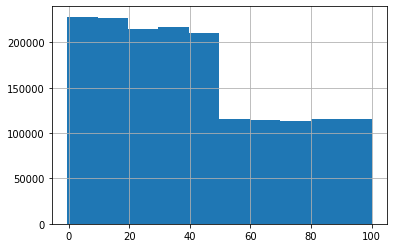

In [ ]:
ds_final = ds_final[ds_final['Pres_Adj']< 100]
ds_final.Pres_Adj.hist()

In [ ]:
# crear dataframes para cada mes a analizar, agrupar y sacar la media para evitar duplicados
lista_dfs=[]
for i in range(12):
  mes_i= ds_final[ds_final.Month == i+1]
  mes_i=mes_i[['Lon','Lat','Pres_Adj','Sal_Adj','Ciclo','Id']].groupby(by=['Lon','Lat','Ciclo','Pres_Adj','Id']).mean()
  mes_i=mes_i.reset_index()
  print('Mes: ', i+1, '- Dimension:',mes_i.shape)
  lista_dfs.append(mes_i)

Mes:  1 - Dimension: (86119, 6)
Mes:  2 - Dimension: (69302, 6)
Mes:  3 - Dimension: (73780, 6)
Mes:  4 - Dimension: (83818, 6)
Mes:  5 - Dimension: (84452, 6)
Mes:  6 - Dimension: (138072, 6)
Mes:  7 - Dimension: (122415, 6)
Mes:  8 - Dimension: (107268, 6)
Mes:  9 - Dimension: (110407, 6)
Mes:  10 - Dimension: (100109, 6)
Mes:  11 - Dimension: (91607, 6)
Mes:  12 - Dimension: (112530, 6)


## Ejemplo de prueba para un mes (Interpolacion vertical Akima)

------------------------------------
Id : 1900935
Ciclo 48 ......................... Check
Ciclo 49 ......................... Check
Ciclo 85 ......................... Check
Ciclo 86 ......................... Check
Ciclo 87 ......................... Check


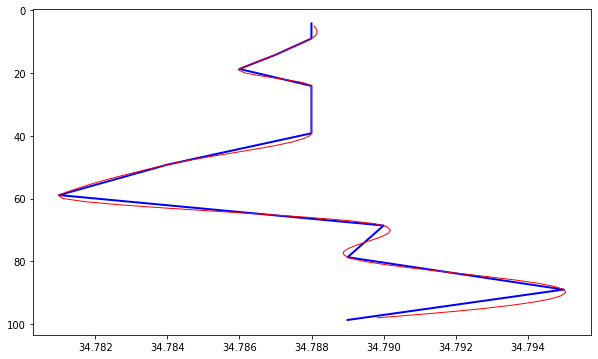

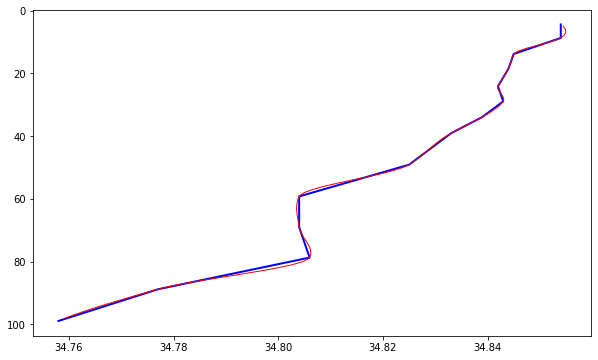

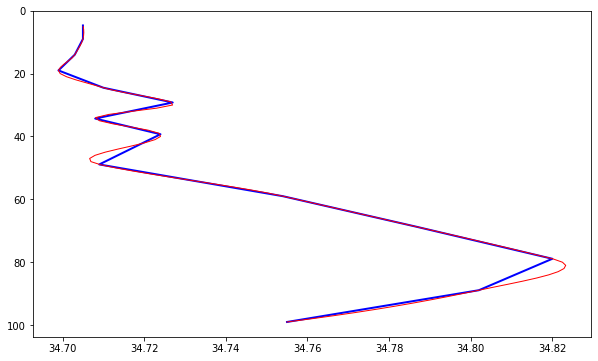

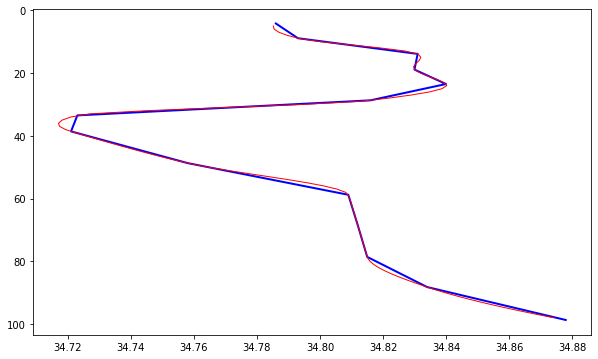

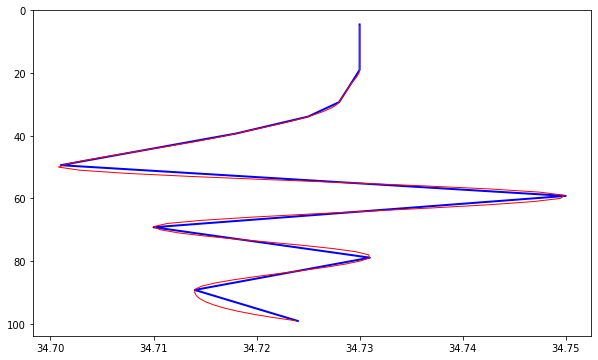

In [ ]:
import scipy.interpolate
from scipy.interpolate import interp1d
from scipy.interpolate import Akima1DInterpolator
import math
import warnings
from itertools import repeat
warnings.filterwarnings("ignore") # Ignorar warnings
enero= lista_dfs[0]
############################################################################################################33
ids= list(enero.Id.unique()) # Ids unicos del dataframe
ciclos= list(enero.Ciclo.unique()) # ciclos unicos del dataframe
dfs= [] # Lista donde voy a almacener cada uno de los dataframes resultantes de la interpolacion
# Creacion de ciclo for para hacer interpolacion
for i in ids[0:1]: # Iterar solo el primer elemento (al final seria 0:len(ids))
  print('------------------------------------')
  print('Id :',i)
  #print('Ciclos disponibles:', ds_3D_m[ds_3D_m['Id']==i].Ciclo.unique()) # Solo para ver los ciclos del primer id
  ciclos=enero[enero['Id']==i].Ciclo.unique()
  for j in ciclos:
    print('Ciclo',j,'......................... Check')
    # Filtro del id y ciclo respectivo
    ds= enero[(enero['Id']==i) & (enero['Ciclo']==j)] # Variable local (se sobre escribe cada vez)
    # Hacer el subset entre 0 y 2000 dbar para que no haya problemas de consistencia
    ds= ds[(ds['Pres_Adj']>=0) &(ds['Pres_Adj']<=100)] # Importante para que todos los valores queden entre 0 y 2000 dbar
    #print(ds) # Si se quiere ver el dataframe original
    # Extraer presion, temperatura y salinidad
    pres= ds.Pres_Adj; S= ds.Sal_Adj; # Variables locales otra vez
    # Objetos interpoladores de Salinidad y Temperatura
    # Caso 1: Spline (Espero que de mejor)
    spline_S= Akima1DInterpolator(pres,S) # Mejor metodo que encontre
    # Ahora se hace la interpolacion entre el rango de valores de presion:
    min_pres= math.floor(np.min(pres));max_pres= math.ceil(np.max(pres))
    # Crear la secuencia de valores entre el minimo y maximo encontrado en el perfil para interpolar
    pres_new= np.arange(min_pres,max_pres+1,1)
    # Interpolar T y S con (Metodo: Splines)
    S_new=spline_S(pres_new)
    #################################################################
    # Nueva grafica
    plt.figure(figsize=(10,6))
    plt.plot(ds.Sal_Adj,ds.Pres_Adj,color='b',linewidth=2)
    plt.plot(S_new,pres_new,color='r',linewidth=1)
    plt.gca().invert_yaxis()
    #################################################################
     # Crear el dataframe para cada perfil
    df_ts=pd.DataFrame();
    # Agregar lat y lon, id y ciclo automatica
    lat_0=ds.Lat.reset_index(drop=True);lon_0=ds.Lon.reset_index(drop=True);id_0=ds.Id.reset_index(drop=True);ciclo_0=ds.Ciclo.reset_index(drop=True)  
    # Valores de 0 a 2000 dbar espaciados cada 1 dbar
    df_ts['Presion_interp']=np.arange(0,100+1,1)
    df_ts['Lon']= np.repeat(lon_0[0],101);df_ts['Lat']= np.repeat(lat_0[0],101)
    df_ts['Id']= np.repeat(id_0[0],101);df_ts['Ciclo']= np.repeat(ciclo_0[0],101);
    df_ts['S_interp']=np.nan; df_ts['S_interp'][min_pres:max_pres+1]= S_new;
    #print(df_ts)
    # Concatenar todos los dataframes en dfs
    dfs.append(df_ts)

## Creacion de funcion para generalizar

In [ ]:
import scipy.interpolate
from scipy.interpolate import interp1d
from scipy.interpolate import Akima1DInterpolator
import math
import warnings
from itertools import repeat
warnings.filterwarnings("ignore") # Ignorar warnings
def interpolador_capas(dataframe, max_depth, intervalo):
  '''
  dataframe= pandas dataframe con columnas Lon, Lat,ciclo, Pres_adj, Id, Variable
  max_depth= valor entero de profundidad maxima a interpolar
  intervalo= intervalo de profundidad en m para interpolacion
  '''
  # Enfocarme en estas profundidades
  lista_prof = list(np.arange(0,max_depth+1,intervalo)) # Intervalos de 5m para extraer capas
  ############################################################################################################33
  ds_3D_m=dataframe
  ids= list(ds_3D_m.Id.unique()) # Ids unicos del dataframe
  ciclos= list(ds_3D_m.Ciclo.unique()) # ciclos unicos del dataframe
  dfs= [] # Lista donde voy a almacener cada uno de los dataframes resultantes de la interpolacion
  for i in ids: 
    # Iterar solo el primer elemento (al final seria 0:len(ids))
    #print('------------------------------------')
    #print('Id :',i,'................... Check')
    #print('Ciclos disponibles:', ds_3D_m[ds_3D_m['Id']==i].Ciclo.unique()) # Solo para ver los ciclos del primer id
    ciclos=ds_3D_m[ds_3D_m['Id']==i].Ciclo.unique()
    for j in ciclos:
      #print('Ciclo',j,'......................... Check')
      # Filtro del id y ciclo respectivo
      ds= ds_3D_m[(ds_3D_m['Id']==i) & (ds_3D_m['Ciclo']==j)] # Variable local (se sobre escribe cada vez)
      # Hacer el subset entre 0 y 2000 dbar para que no haya problemas de consistencia
      ds= ds[(ds['Pres_Adj']>=0) &(ds['Pres_Adj']<=max_depth)] # Importante para que todos los valores queden entre 0 y 2000 dbar
      # Extraer presion, temperatura y salinidad
      pres= ds.Pres_Adj;S= ds.Sal_Adj; # Variables locales otra vez
      # Objetos interpoladores de Salinidad y Temperatura
      # Caso 1: Spline (Espero que de mejor)
      try:
        spline_S= Akima1DInterpolator(pres,S) # Mejor metodo que encontre
        # Ahora se hace la interpolacion entre el rango de valores de presion:
        min_pres= math.floor(np.min(pres));max_pres= math.ceil(np.max(pres))
        # Crear la secuencia de valores entre el minimo y maximo encontrado en el perfil para interpolar
        pres_new= np.arange(min_pres,max_pres+1,1)
        S_new=spline_S(pres_new)# Interpolar T y S con (Metodo: Splines)
        df_ts=pd.DataFrame();# Crear el dataframe para cada perfil
        # Agregar lat y lon, id y ciclo automatica
        lat_0=ds.Lat.reset_index(drop=True);lon_0=ds.Lon.reset_index(drop=True);id_0=ds.Id.reset_index(drop=True);ciclo_0=ds.Ciclo.reset_index(drop=True)  
        df_ts['Presion_interp']=np.arange(0,max_depth+1,1)
        df_ts['Lon']= np.repeat(lon_0[0],max_depth+1);df_ts['Lat']= np.repeat(lat_0[0],max_depth+1)
        df_ts['Id']= np.repeat(id_0[0],max_depth+1);df_ts['Ciclo']= np.repeat(ciclo_0[0],max_depth+1);
        df_ts['S_interp']=np.nan;df_ts['S_interp'][min_pres:max_pres+1]= S_new;
        # Hacer el subset a las profundidades deseadas
        df_ts= df_ts[df_ts['Presion_interp'].isin(lista_prof)]
        dfs.append(df_ts)# Concatenar todos los dataframes en dfs
      except:
        print('Intento fallido en Id:',i, 'Ciclo',j)
        pass
  # Interpolar para llenar la capa superficial
  dfs_final=[]
  for i in dfs:
    try:
      data_f= i.interpolate(method='spline', order=1,limit_direction='backward')
      dfs_final.append(data_f)# Agregar los dataframes
    except:
      dfs_final.append(i)
  print('Tamaño de los dataframes generados :',len(dfs_final))
  df_final= pd.concat(dfs_final)
  # Agrupar por cada Lat, Lon y Presion sacando la media que no tiene en cuenta los nan
  df_final=df_final[['Presion_interp','Lon','Lat','S_interp']].groupby(by=['Lon','Lat','Presion_interp']).mean().reset_index()
  print(df_final.shape)
  return df_final

## Validacion-Enero 

In [ ]:
enero= interpolador_capas(dataframe= lista_dfs[0], max_depth= 100, intervalo=1)
enero

Intento fallido en Id: 3901964 Ciclo 46
Intento fallido en Id: 3901964 Ciclo 47
Intento fallido en Id: 3901964 Ciclo 48
Intento fallido en Id: 3901846 Ciclo 46
Intento fallido en Id: 3901846 Ciclo 47
Intento fallido en Id: 3901903 Ciclo 41
Intento fallido en Id: 3901903 Ciclo 40
Intento fallido en Id: 3901903 Ciclo 39
Intento fallido en Id: 1900110 Ciclo 44
Intento fallido en Id: 3901870 Ciclo 43
Intento fallido en Id: 3901870 Ciclo 44
Intento fallido en Id: 3901870 Ciclo 45
Intento fallido en Id: 3901901 Ciclo 41
Intento fallido en Id: 3901901 Ciclo 40
Intento fallido en Id: 3901901 Ciclo 39
Intento fallido en Id: 3901937 Ciclo 1
Intento fallido en Id: 3901935 Ciclo 1
Intento fallido en Id: 3901869 Ciclo 45
Intento fallido en Id: 3901869 Ciclo 43
Intento fallido en Id: 3901965 Ciclo 48
Intento fallido en Id: 3901965 Ciclo 46
Intento fallido en Id: 3901965 Ciclo 47
Intento fallido en Id: 6901582 Ciclo 280
Intento fallido en Id: 6901582 Ciclo 279
Intento fallido en Id: 6901582 Ciclo 275

Lon     Lat  Presion_interp   S_interp
0        5.001 -38.867               0  34.784986
1        5.001 -38.867               1  34.785043
2        5.001 -38.867               2  34.785100
3        5.001 -38.867               3  34.785157
4        5.001 -38.867               4  34.785214
...        ...     ...             ...        ...
173614  24.841 -39.262              96        NaN
173615  24.841 -39.262              97        NaN
173616  24.841 -39.262              98        NaN
173617  24.841 -39.262              99        NaN
173618  24.841 -39.262             100        NaN

[173619 rows x 4 columns]

In [ ]:
import scipy
from scipy.interpolate import griddata
ds_final= enero #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_jan = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(5+0.5,25+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(-40+0.5, -10+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0=griddata(points,values, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur-Norte
  grid_z0_1=np.flip(grid_z0, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_jan.append(grid_z0_1)
datos_jan = np.stack(datos_jan)
#print(datos)
print(datos_jan.shape) 

(100, 30, 20)


(30, 20)


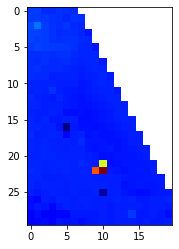

In [ ]:
print(np.mean(datos_jan[0:2,:,:], axis=0).shape)
plt.imshow(np.mean(datos_jan[0:2,:,:], axis=0),cmap='jet')

In [ ]:
x1= np.arange(5+0.5, 25+0.5,1)
y1= list(np.arange(-40+0.5, -10+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
SST_jan=basemap.interp(datain=reanal.sel(month=1).SSS.values, xin=reanal.sel(month=1).lon.values,
                       yin=reanal.sel(month=1).lat.values,xout=X_t, yout=Y_t, order=1, masked= True)

(30, 20)


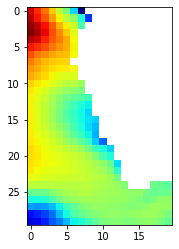

In [ ]:
print(SST_jan.shape)
plt.imshow(SST_jan,cmap='jet')

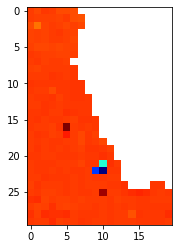

In [ ]:
# Diferencia entre modelo y ARGO
plt.imshow(SST_jan-np.mean(datos_jan[0:2,:,:], axis=0),cmap='jet')

## Validacion-Febrero

In [ ]:
febrero= interpolador_capas(dataframe= lista_dfs[1], max_depth= 100, intervalo=1)
febrero

Intento fallido en Id: 3901870 Ciclo 46
Intento fallido en Id: 3901870 Ciclo 47
Intento fallido en Id: 3901870 Ciclo 48
Intento fallido en Id: 3901964 Ciclo 51
Intento fallido en Id: 3901964 Ciclo 49
Intento fallido en Id: 3901964 Ciclo 50
Intento fallido en Id: 3901901 Ciclo 42
Intento fallido en Id: 3901901 Ciclo 43
Intento fallido en Id: 3901901 Ciclo 44
Intento fallido en Id: 6901436 Ciclo 1
Intento fallido en Id: 3901903 Ciclo 44
Intento fallido en Id: 3901903 Ciclo 43
Intento fallido en Id: 3901903 Ciclo 42
Intento fallido en Id: 1901601 Ciclo 153
Intento fallido en Id: 6901582 Ciclo 292
Intento fallido en Id: 6901582 Ciclo 293
Intento fallido en Id: 6901582 Ciclo 291
Intento fallido en Id: 6901582 Ciclo 294
Intento fallido en Id: 6901582 Ciclo 288
Intento fallido en Id: 6901582 Ciclo 290
Intento fallido en Id: 6901582 Ciclo 289
Intento fallido en Id: 6901582 Ciclo 287
Intento fallido en Id: 6901582 Ciclo 284
Intento fallido en Id: 6901582 Ciclo 285
Intento fallido en Id: 6901582

Lon       Lat  Presion_interp   S_interp
0        5.00822 -12.70731               0  36.647435
1        5.00822 -12.70731               1  36.632897
2        5.00822 -12.70731               2  36.450974
3        5.00822 -12.70731               3  36.452771
4        5.00822 -12.70731               4  36.451098
...          ...       ...             ...        ...
148263  24.98800 -38.31800              96  35.039528
148264  24.98800 -38.31800              97  35.032745
148265  24.98800 -38.31800              98  35.025531
148266  24.98800 -38.31800              99  35.017849
148267  24.98800 -38.31800             100        NaN

[148268 rows x 4 columns]

In [ ]:
%%time
import scipy
from scipy.interpolate import griddata
# Coordenadas para grafica
ds_final= febrero #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_feb = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(5+0.5,25+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(-40+0.5, -10+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0=griddata(points,values, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur -Norte
  grid_z0_1=np.flip(grid_z0, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_feb.append(grid_z0_1)
datos_feb = np.stack(datos_feb)
#print(datos)
print(datos_feb.shape) 

(100, 30, 20)
CPU times: user 3.03 s, sys: 2.7 s, total: 5.73 s
Wall time: 4.02 s


(30, 20)


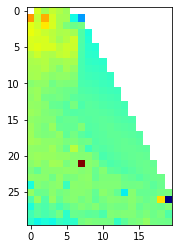

In [ ]:
print(np.mean(datos_feb[0:2,:,:], axis=0).shape)
plt.imshow(np.mean(datos_feb[0:2,:,:], axis=0),cmap='jet')

In [ ]:
x1= np.arange(5+0.5, 25+0.5,1)
y1= list(np.arange(-40+0.5, -10+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
SST_feb=basemap.interp(datain=reanal.sel(month=2).SSS.values, xin=reanal.sel(month=2).lon.values,
                       yin=reanal.sel(month=2).lat.values,xout=X_t, yout=Y_t, order=1, masked= True)

(30, 20)


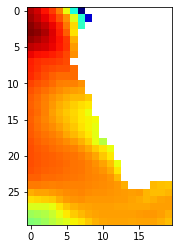

In [ ]:
print(SST_feb.shape)
plt.imshow(SST_feb,cmap='jet')

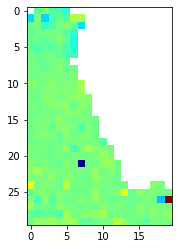

In [ ]:
# Diferencia entre modelo y ARGO
plt.imshow(SST_feb-np.mean(datos_feb[0:2,:,:], axis=0),cmap='jet')

## Validacion-Marzo

In [ ]:
marzo= interpolador_capas(dataframe= lista_dfs[2], max_depth= 100, intervalo=1)
marzo

Intento fallido en Id: 3901901 Ciclo 47
Intento fallido en Id: 3901901 Ciclo 46
Intento fallido en Id: 3901901 Ciclo 45
Intento fallido en Id: 3901964 Ciclo 52
Intento fallido en Id: 3901964 Ciclo 53
Intento fallido en Id: 3901903 Ciclo 47
Intento fallido en Id: 3901903 Ciclo 46
Intento fallido en Id: 3901903 Ciclo 45
Intento fallido en Id: 6900727 Ciclo 119
Intento fallido en Id: 6900727 Ciclo 120
Intento fallido en Id: 4901225 Ciclo 255
Intento fallido en Id: 3901965 Ciclo 53
Intento fallido en Id: 3901965 Ciclo 52
Intento fallido en Id: 3901965 Ciclo 54
Intento fallido en Id: 6902605 Ciclo 1
Intento fallido en Id: 3901846 Ciclo 53
Intento fallido en Id: 3901846 Ciclo 52
Intento fallido en Id: 3901846 Ciclo 51
Intento fallido en Id: 3901670 Ciclo 27
Intento fallido en Id: 6901582 Ciclo 299
Intento fallido en Id: 6901582 Ciclo 297
Intento fallido en Id: 6901582 Ciclo 298
Intento fallido en Id: 6901582 Ciclo 300
Intento fallido en Id: 6901582 Ciclo 296
Intento fallido en Id: 6901582 Ci

Lon       Lat  Presion_interp   S_interp
0        5.00400 -30.55900               0  35.775019
1        5.00400 -30.55900               1  35.772371
2        5.00400 -30.55900               2  35.769723
3        5.00400 -30.55900               3  35.767075
4        5.00400 -30.55900               4  35.764427
...          ...       ...             ...        ...
160383  24.91483 -35.96599              96  35.551070
160384  24.91483 -35.96599              97  35.542770
160385  24.91483 -35.96599              98  35.537247
160386  24.91483 -35.96599              99  35.541882
160387  24.91483 -35.96599             100        NaN

[160388 rows x 4 columns]

In [ ]:
%%time
import scipy
from scipy.interpolate import griddata
# Coordenadas para grafica
ds_final= marzo #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_mar = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(5+0.5,25+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(-40+0.5, -10+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0=griddata(points,values, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur -Norte
  grid_z0_1=np.flip(grid_z0, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_mar.append(grid_z0_1)
datos_mar = np.stack(datos_mar)
#print(datos)
print(datos_mar.shape) 

(100, 30, 20)
CPU times: user 3.2 s, sys: 2.89 s, total: 6.08 s
Wall time: 3.16 s


(30, 20)


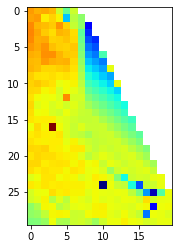

In [ ]:
print(np.mean(datos_mar[0:2,:,:], axis=0).shape)
plt.imshow(np.mean(datos_mar[0:2,:,:], axis=0),cmap='jet')

In [ ]:
x1= np.arange(5+0.5, 25+0.5,1)
y1= list(np.arange(-40+0.5, -10+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
SST_mar=basemap.interp(datain=reanal.sel(month=3).SSS.values, xin=reanal.sel(month=3).lon.values,
                       yin=reanal.sel(month=3).lat.values,xout=X_t, yout=Y_t, order=1, masked= True)

(30, 20)


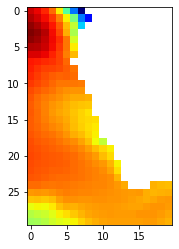

In [ ]:
print(SST_mar.shape)
plt.imshow(SST_mar,cmap='jet')

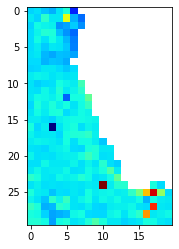

In [ ]:
# Diferencia entre modelo y ARGO
plt.imshow(SST_mar-np.mean(datos_mar[0:2,:,:], axis=0),cmap='jet')

## Validacion-Abril

In [ ]:
abril= interpolador_capas(dataframe= lista_dfs[3], max_depth= 100, intervalo=1)
abril

Intento fallido en Id: 3901901 Ciclo 49
Intento fallido en Id: 3901901 Ciclo 50
Intento fallido en Id: 3901903 Ciclo 50
Intento fallido en Id: 3901903 Ciclo 49
Intento fallido en Id: 3901965 Ciclo 56
Intento fallido en Id: 3901965 Ciclo 57
Intento fallido en Id: 3901965 Ciclo 55
Intento fallido en Id: 3901964 Ciclo 55
Intento fallido en Id: 3901964 Ciclo 56
Intento fallido en Id: 3901964 Ciclo 57
Intento fallido en Id: 3901846 Ciclo 55
Intento fallido en Id: 3901846 Ciclo 56
Intento fallido en Id: 3901846 Ciclo 54
Intento fallido en Id: 6901582 Ciclo 301
Intento fallido en Id: 6901582 Ciclo 304
Intento fallido en Id: 6901582 Ciclo 305
Intento fallido en Id: 6901582 Ciclo 302
Intento fallido en Id: 6901582 Ciclo 303
Intento fallido en Id: 3901869 Ciclo 54
Intento fallido en Id: 3901869 Ciclo 53
Intento fallido en Id: 3901869 Ciclo 52
Intento fallido en Id: 3901847 Ciclo 56
Intento fallido en Id: 3901847 Ciclo 55
Intento fallido en Id: 6902721 Ciclo 130
Intento fallido en Id: 3901915 Cic

Lon     Lat  Presion_interp   S_interp
0        5.010 -12.994               0  36.803939
1        5.010 -12.994               1  36.789731
2        5.010 -12.994               2  36.586998
3        5.010 -12.994               3  36.586997
4        5.010 -12.994               4  36.586998
...        ...     ...             ...        ...
155636  24.983 -39.020              96  35.143683
155637  24.983 -39.020              97  35.134953
155638  24.983 -39.020              98  35.125343
155639  24.983 -39.020              99        NaN
155640  24.983 -39.020             100        NaN

[155641 rows x 4 columns]

In [ ]:
%%time
import scipy
from scipy.interpolate import griddata
# Coordenadas para grafica
ds_final= abril #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_abr = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(5+0.5,25+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(-40+0.5, -10+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0=griddata(points,values, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur -Norte
  grid_z0_1=np.flip(grid_z0, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_abr.append(grid_z0_1)
datos_abr = np.stack(datos_abr)
#print(datos)
print(datos_abr.shape) 

(100, 30, 20)
CPU times: user 3.1 s, sys: 2.8 s, total: 5.89 s
Wall time: 3.07 s


(30, 20)


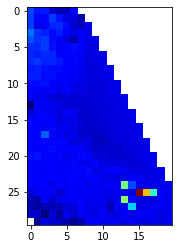

In [ ]:
print(np.mean(datos_abr[0:2,:,:], axis=0).shape)
plt.imshow(np.mean(datos_abr[0:2,:,:], axis=0),cmap='jet')

In [ ]:
x1= np.arange(5+0.5, 25+0.5,1)
y1= list(np.arange(-40+0.5, -10+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
SST_abr=basemap.interp(datain=reanal.sel(month=4).SSS.values, xin=reanal.sel(month=4).lon.values,
                       yin=reanal.sel(month=4).lat.values,xout=X_t, yout=Y_t, order=1, masked= True)

(30, 20)


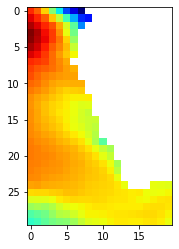

In [ ]:
print(SST_abr.shape)
plt.imshow(SST_abr,cmap='jet')

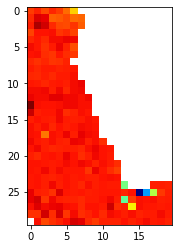

In [ ]:
# Diferencia entre modelo y ARGO
plt.imshow(SST_abr-np.mean(datos_abr[0:2,:,:], axis=0),cmap='jet')

## Validacion-Mayo

In [ ]:
mayo= interpolador_capas(dataframe= lista_dfs[4], max_depth= 100, intervalo=1)
mayo

Intento fallido en Id: 3901901 Ciclo 51
Intento fallido en Id: 3901901 Ciclo 52
Intento fallido en Id: 3901901 Ciclo 53
Intento fallido en Id: 3901903 Ciclo 53
Intento fallido en Id: 3901903 Ciclo 52
Intento fallido en Id: 3901903 Ciclo 51
Intento fallido en Id: 3901915 Ciclo 83
Intento fallido en Id: 3901915 Ciclo 82
Intento fallido en Id: 3901915 Ciclo 81
Intento fallido en Id: 3901964 Ciclo 60
Intento fallido en Id: 3901964 Ciclo 59
Intento fallido en Id: 3901964 Ciclo 58
Intento fallido en Id: 3901965 Ciclo 58
Intento fallido en Id: 3901965 Ciclo 59
Intento fallido en Id: 3901965 Ciclo 60
Intento fallido en Id: 3901846 Ciclo 59
Intento fallido en Id: 3901846 Ciclo 58
Intento fallido en Id: 3901846 Ciclo 57
Intento fallido en Id: 3901869 Ciclo 57
Intento fallido en Id: 3901869 Ciclo 56
Intento fallido en Id: 3901869 Ciclo 55
Intento fallido en Id: 6901582 Ciclo 307
Intento fallido en Id: 6901582 Ciclo 309
Intento fallido en Id: 6901582 Ciclo 308
Intento fallido en Id: 6901492 Ciclo 

Lon     Lat  Presion_interp   S_interp
0        4.99978 -15.232               0  36.607462
1        4.99978 -15.232               1  36.592806
2        4.99978 -15.232               2  36.363823
3        4.99978 -15.232               3  36.364226
4        4.99978 -15.232               4  36.364080
...          ...     ...             ...        ...
160989  24.99200 -37.532              96  34.796924
160990  24.99200 -37.532              97  34.788801
160991  24.99200 -37.532              98  34.781058
160992  24.99200 -37.532              99  34.776195
160993  24.99200 -37.532             100        NaN

[160994 rows x 4 columns]

In [ ]:
%%time
import scipy
from scipy.interpolate import griddata
ds_final= mayo #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_may = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(5+0.5,25+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(-40+0.5, -10+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0=griddata(points,values, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur -Norte
  grid_z0_1=np.flip(grid_z0, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_may.append(grid_z0_1)
datos_may = np.stack(datos_may)
#print(datos)
print(datos_may.shape) 

(100, 30, 20)
CPU times: user 3.3 s, sys: 3.03 s, total: 6.33 s
Wall time: 3.31 s


(30, 20)


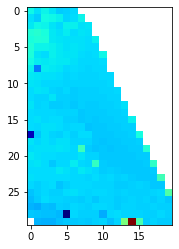

In [ ]:
print(np.mean(datos_may[0:2,:,:], axis=0).shape)
plt.imshow(np.mean(datos_may[0:2,:,:], axis=0),cmap='jet')

In [ ]:
x1= np.arange(5+0.5, 25+0.5,1)
y1= list(np.arange(-40+0.5, -10+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
SST_may=basemap.interp(datain=reanal.sel(month=5).SSS.values, xin=reanal.sel(month=5).lon.values,
                       yin=reanal.sel(month=5).lat.values,xout=X_t, yout=Y_t, order=1, masked= True)

(30, 20)


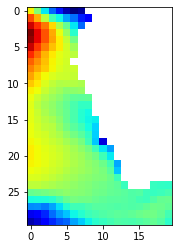

In [ ]:
print(SST_may.shape)
plt.imshow(SST_may,cmap='jet')

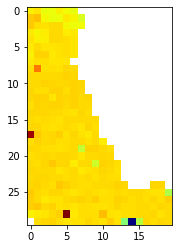

In [ ]:
# Diferencia entre modelo y ARGO
plt.imshow(SST_may-np.mean(datos_may[0:2,:,:], axis=0),cmap='jet')

## Validacion-Junio

In [ ]:
junio= interpolador_capas(dataframe= lista_dfs[5], max_depth= 100, intervalo=1)
junio

Intento fallido en Id: 3901915 Ciclo 85
Intento fallido en Id: 3901915 Ciclo 84
Intento fallido en Id: 3901903 Ciclo 54
Intento fallido en Id: 3901903 Ciclo 55
Intento fallido en Id: 3901903 Ciclo 56
Intento fallido en Id: 1900110 Ciclo 24
Intento fallido en Id: 3901901 Ciclo 55
Intento fallido en Id: 3901901 Ciclo 54
Intento fallido en Id: 3901901 Ciclo 56
Intento fallido en Id: 3901869 Ciclo 59
Intento fallido en Id: 3901869 Ciclo 58
Intento fallido en Id: 3901964 Ciclo 63
Intento fallido en Id: 3901964 Ciclo 61
Intento fallido en Id: 3901964 Ciclo 62
Intento fallido en Id: 3901846 Ciclo 60
Intento fallido en Id: 3901846 Ciclo 61
Intento fallido en Id: 3901846 Ciclo 62
Intento fallido en Id: 3901847 Ciclo 60
Intento fallido en Id: 3901847 Ciclo 61
Intento fallido en Id: 3901847 Ciclo 62
Intento fallido en Id: 3901870 Ciclo 60
Intento fallido en Id: 3901870 Ciclo 59
Intento fallido en Id: 3901870 Ciclo 58
Intento fallido en Id: 3901671 Ciclo 1
Intento fallido en Id: 6902721 Ciclo 136


Lon       Lat  Presion_interp   S_interp
0        5.00800 -27.03100               0  35.656074
1        5.00800 -27.03100               1  35.656108
2        5.00800 -27.03100               2  35.656143
3        5.00800 -27.03100               3  35.656177
4        5.00800 -27.03100               4  35.656212
...          ...       ...             ...        ...
163514  24.97856 -35.05865              96  35.423890
163515  24.97856 -35.05865              97  35.420646
163516  24.97856 -35.05865              98  35.391204
163517  24.97856 -35.05865              99  35.338611
163518  24.97856 -35.05865             100        NaN

[163519 rows x 4 columns]

In [ ]:
%%time
import scipy
from scipy.interpolate import griddata
ds_final= junio #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_jun = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(5+0.5,25+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(-40+0.5, -10+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0=griddata(points,values, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur -Norte
  grid_z0_1=np.flip(grid_z0, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_jun.append(grid_z0_1)
datos_jun = np.stack(datos_jun)
#print(datos)
print(datos_jun.shape) 

(100, 30, 20)
CPU times: user 3.2 s, sys: 2.99 s, total: 6.19 s
Wall time: 3.23 s


(30, 20)


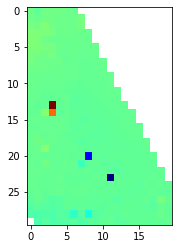

In [ ]:
print(np.mean(datos_jun[0:2,:,:], axis=0).shape)
plt.imshow(np.mean(datos_jun[0:2,:,:], axis=0),cmap='jet')

In [ ]:
x1= np.arange(5+0.5, 25+0.5,1)
y1= list(np.arange(-40+0.5, -10+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
SST_jun=basemap.interp(datain=reanal.sel(month=6).SSS.values, xin=reanal.sel(month=6).lon.values,
                       yin=reanal.sel(month=6).lat.values,xout=X_t, yout=Y_t, order=1, masked= True)

(30, 20)


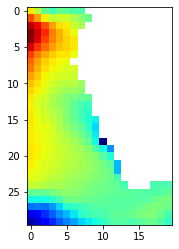

In [ ]:
print(SST_jun.shape)
plt.imshow(SST_jun,cmap='jet')

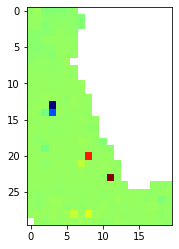

In [ ]:
# Diferencia entre modelo y ARGO
plt.imshow(SST_jun-np.mean(datos_jun[0:2,:,:], axis=0),cmap='jet')

## Validacion-Julio

In [ ]:
julio= interpolador_capas(dataframe= lista_dfs[6], max_depth= 100, intervalo=1)
julio

Intento fallido en Id: 1901601 Ciclo 171
Intento fallido en Id: 3901903 Ciclo 57
Intento fallido en Id: 3901903 Ciclo 58
Intento fallido en Id: 3901903 Ciclo 59
Intento fallido en Id: 3901903 Ciclo 60
Intento fallido en Id: 3901901 Ciclo 57
Intento fallido en Id: 3901901 Ciclo 58
Intento fallido en Id: 3901901 Ciclo 59
Intento fallido en Id: 3901869 Ciclo 63
Intento fallido en Id: 3901869 Ciclo 62
Intento fallido en Id: 3901869 Ciclo 61
Intento fallido en Id: 3901964 Ciclo 65
Intento fallido en Id: 3901964 Ciclo 66
Intento fallido en Id: 3901964 Ciclo 64
Intento fallido en Id: 3901847 Ciclo 65
Intento fallido en Id: 3901847 Ciclo 63
Intento fallido en Id: 3901847 Ciclo 64
Intento fallido en Id: 3901846 Ciclo 63
Intento fallido en Id: 3901846 Ciclo 64
Intento fallido en Id: 3901846 Ciclo 65
Intento fallido en Id: 6902721 Ciclo 137
Intento fallido en Id: 6902721 Ciclo 138
Intento fallido en Id: 6902721 Ciclo 139
Intento fallido en Id: 3901870 Ciclo 61
Intento fallido en Id: 3901870 Ciclo

Lon       Lat  Presion_interp   S_interp
0        5.00200 -30.19700               0  35.760514
1        5.00200 -30.19700               1  35.759181
2        5.00200 -30.19700               2  35.757849
3        5.00200 -30.19700               3  35.756516
4        5.00200 -30.19700               4  35.755184
...          ...       ...             ...        ...
167251  24.98668 -37.11365              96  35.527750
167252  24.98668 -37.11365              97  35.720361
167253  24.98668 -37.11365              98  35.496378
167254  24.98668 -37.11365              99  35.517500
167255  24.98668 -37.11365             100        NaN

[167256 rows x 4 columns]

In [ ]:
%%time
import scipy
from scipy.interpolate import griddata
ds_final= julio #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_jul = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(5+0.5,25+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(-40+0.5, -10+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0=griddata(points,values, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur -Norte
  grid_z0_1=np.flip(grid_z0, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_jul.append(grid_z0_1)
datos_jul = np.stack(datos_jul)
#print(datos)
print(datos_jul.shape) 

(100, 30, 20)
CPU times: user 3.22 s, sys: 2.98 s, total: 6.2 s
Wall time: 3.45 s


(30, 20)


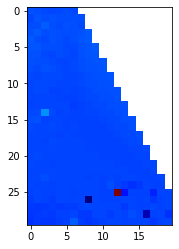

In [ ]:
print(np.mean(datos_jul[0:2,:,:], axis=0).shape)
plt.imshow(np.mean(datos_jul[0:2,:,:], axis=0),cmap='jet')

In [ ]:
x1= np.arange(5+0.5, 25+0.5,1)
y1= list(np.arange(-40+0.5, -10+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
SST_jul=basemap.interp(datain=reanal.sel(month=7).SSS.values, xin=reanal.sel(month=7).lon.values,
                       yin=reanal.sel(month=7).lat.values,xout=X_t, yout=Y_t, order=1, masked= True)

(30, 20)


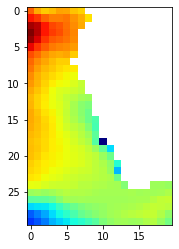

In [ ]:
print(SST_jul.shape)
plt.imshow(SST_jul,cmap='jet')

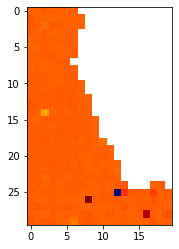

In [ ]:
# Diferencia entre modelo y ARGO
plt.imshow(SST_jul-np.mean(datos_jul[0:2,:,:], axis=0),cmap='jet')

## Validacion-Agosto

In [ ]:
agosto= interpolador_capas(dataframe= lista_dfs[7], max_depth= 100, intervalo=1)
agosto

Intento fallido en Id: 1900387 Ciclo 0
Intento fallido en Id: 1901052 Ciclo 35
Intento fallido en Id: 1900392 Ciclo 0
Intento fallido en Id: 1901618 Ciclo 63
Intento fallido en Id: 1900384 Ciclo 0
Intento fallido en Id: 3901869 Ciclo 66
Intento fallido en Id: 3901869 Ciclo 65
Intento fallido en Id: 3901869 Ciclo 64
Intento fallido en Id: 3901901 Ciclo 61
Intento fallido en Id: 3901901 Ciclo 62
Intento fallido en Id: 3901901 Ciclo 63
Intento fallido en Id: 3901847 Ciclo 66
Intento fallido en Id: 3901847 Ciclo 67
Intento fallido en Id: 3901847 Ciclo 68
Intento fallido en Id: 3901846 Ciclo 68
Intento fallido en Id: 3901846 Ciclo 67
Intento fallido en Id: 3901846 Ciclo 66
Intento fallido en Id: 3901964 Ciclo 68
Intento fallido en Id: 3901964 Ciclo 67
Intento fallido en Id: 3901964 Ciclo 69
Intento fallido en Id: 6901582 Ciclo 316
Intento fallido en Id: 6901582 Ciclo 317
Intento fallido en Id: 6901582 Ciclo 318
Intento fallido en Id: 3901903 Ciclo 61
Intento fallido en Id: 3901903 Ciclo 62


Lon     Lat  Presion_interp   S_interp
0        5.000 -37.729               0  34.654924
1        5.000 -37.729               1  34.653812
2        5.000 -37.729               2  34.652700
3        5.000 -37.729               3  34.651588
4        5.000 -37.729               4  34.650476
...        ...     ...             ...        ...
168867  24.986 -38.789              96        NaN
168868  24.986 -38.789              97        NaN
168869  24.986 -38.789              98        NaN
168870  24.986 -38.789              99        NaN
168871  24.986 -38.789             100        NaN

[168872 rows x 4 columns]

In [ ]:
%%time
import scipy
from scipy.interpolate import griddata
ds_final= agosto #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_ago = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(5+0.5,25+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(-40+0.5, -10+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0=griddata(points,values, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur -Norte
  grid_z0_1=np.flip(grid_z0, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_ago.append(grid_z0_1)
datos_ago = np.stack(datos_ago)
#print(datos)
print(datos_ago.shape) 

(100, 30, 20)
CPU times: user 3.21 s, sys: 2.97 s, total: 6.17 s
Wall time: 3.2 s


(30, 20)


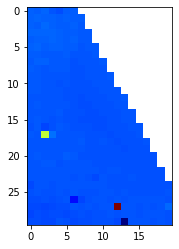

In [ ]:
print(np.mean(datos_ago[0:2,:,:], axis=0).shape)
plt.imshow(np.mean(datos_ago[0:2,:,:], axis=0),cmap='jet')

In [ ]:
x1= np.arange(5+0.5, 25+0.5,1)
y1= list(np.arange(-40+0.5, -10+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
SST_ago=basemap.interp(datain=reanal.sel(month=8).SSS.values, xin=reanal.sel(month=8).lon.values,
                       yin=reanal.sel(month=8).lat.values,xout=X_t, yout=Y_t, order=1, masked= True)

(30, 20)


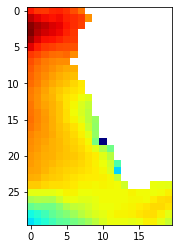

In [ ]:
print(SST_ago.shape)
plt.imshow(SST_ago,cmap='jet')

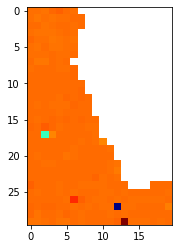

In [ ]:
# Diferencia entre modelo y ARGO
plt.imshow(SST_ago-np.mean(datos_ago[0:2,:,:], axis=0),cmap='jet')

## Validacion-Septiembre

In [ ]:
septiembre= interpolador_capas(dataframe= lista_dfs[8], max_depth= 100, intervalo=1)
septiembre

Intento fallido en Id: 3901915 Ciclo 94
Intento fallido en Id: 3901915 Ciclo 95
Intento fallido en Id: 6902835 Ciclo 1
Intento fallido en Id: 6901500 Ciclo 1
Intento fallido en Id: 3901901 Ciclo 64
Intento fallido en Id: 3901901 Ciclo 65
Intento fallido en Id: 3901901 Ciclo 66
Intento fallido en Id: 3901964 Ciclo 72
Intento fallido en Id: 3901964 Ciclo 70
Intento fallido en Id: 3901869 Ciclo 69
Intento fallido en Id: 3901869 Ciclo 68
Intento fallido en Id: 3901869 Ciclo 67
Intento fallido en Id: 6901020 Ciclo 1
Intento fallido en Id: 6902834 Ciclo 1
Intento fallido en Id: 3901847 Ciclo 69
Intento fallido en Id: 3901847 Ciclo 70
Intento fallido en Id: 3901847 Ciclo 71
Intento fallido en Id: 3901870 Ciclo 69
Intento fallido en Id: 3901870 Ciclo 68
Intento fallido en Id: 3901870 Ciclo 67
Intento fallido en Id: 3901846 Ciclo 71
Intento fallido en Id: 3901846 Ciclo 70
Intento fallido en Id: 3901846 Ciclo 69
Intento fallido en Id: 6902721 Ciclo 145
Intento fallido en Id: 6902721 Ciclo 143
In

Lon        Lat  Presion_interp   S_interp
0        5.004000 -34.539000               0  35.462006
1        5.004000 -34.539000               1  35.462049
2        5.004000 -34.539000               2  35.462093
3        5.004000 -34.539000               3  35.462136
4        5.004000 -34.539000               4  35.463001
...           ...        ...             ...        ...
170483  24.937518 -36.042265              96  35.564079
170484  24.937518 -36.042265              97  35.564952
170485  24.937518 -36.042265              98  35.564355
170486  24.937518 -36.042265              99  35.563448
170487  24.937518 -36.042265             100        NaN

[170488 rows x 4 columns]

In [ ]:
%%time
import scipy
from scipy.interpolate import griddata
ds_final= septiembre #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_sep = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(5+0.5,25+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(-40+0.5, -10+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0=griddata(points,values, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur -Norte
  grid_z0_1=np.flip(grid_z0, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_sep.append(grid_z0_1)
datos_sep = np.stack(datos_sep)
#print(datos)
print(datos_sep.shape) 

(100, 30, 20)
CPU times: user 3.53 s, sys: 3.34 s, total: 6.86 s
Wall time: 5.69 s


(30, 20)


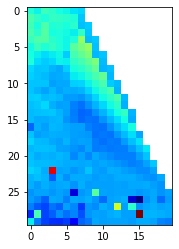

In [ ]:
print(np.mean(datos_sep[0:2,:,:], axis=0).shape)
plt.imshow(np.mean(datos_sep[0:2,:,:], axis=0),cmap='jet')

In [ ]:
x1= np.arange(5+0.5, 25+0.5,1)
y1= list(np.arange(-40+0.5, -10+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
SST_sep=basemap.interp(datain=reanal.sel(month=9).SSS.values, xin=reanal.sel(month=9).lon.values,
                       yin=reanal.sel(month=9).lat.values,xout=X_t, yout=Y_t, order=1, masked= True)

(30, 20)


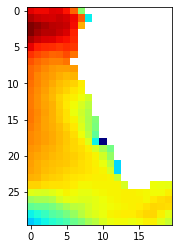

In [ ]:
print(SST_sep.shape)
plt.imshow(SST_sep,cmap='jet')

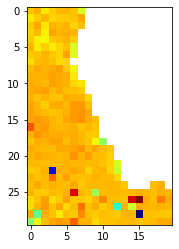

In [ ]:
# Diferencia entre modelo y ARGO
plt.imshow(SST_sep-np.mean(datos_sep[0:2,:,:], axis=0),cmap='jet')

## Validacion-Octubre

In [ ]:
octubre= interpolador_capas(dataframe= lista_dfs[9], max_depth= 100, intervalo=1)
octubre

Intento fallido en Id: 3901915 Ciclo 96
Intento fallido en Id: 1900918 Ciclo 0
Intento fallido en Id: 3901901 Ciclo 67
Intento fallido en Id: 3901901 Ciclo 68
Intento fallido en Id: 3901901 Ciclo 69
Intento fallido en Id: 3901869 Ciclo 72
Intento fallido en Id: 3901869 Ciclo 71
Intento fallido en Id: 3901869 Ciclo 70
Intento fallido en Id: 3901964 Ciclo 73
Intento fallido en Id: 3901964 Ciclo 75
Intento fallido en Id: 3901847 Ciclo 72
Intento fallido en Id: 3901847 Ciclo 73
Intento fallido en Id: 3901847 Ciclo 74
Intento fallido en Id: 3901903 Ciclo 69
Intento fallido en Id: 3901903 Ciclo 68
Intento fallido en Id: 3901903 Ciclo 67
Intento fallido en Id: 3901870 Ciclo 70
Intento fallido en Id: 3901870 Ciclo 72
Intento fallido en Id: 3901870 Ciclo 71
Intento fallido en Id: 3901846 Ciclo 74
Intento fallido en Id: 3901846 Ciclo 72
Intento fallido en Id: 3901846 Ciclo 73
Intento fallido en Id: 3901846 Ciclo 1
Intento fallido en Id: 1900919 Ciclo 0
Intento fallido en Id: 6902721 Ciclo 148
In

Lon     Lat  Presion_interp   S_interp
0        5.000 -11.221               0  36.465763
1        5.000 -11.221               1  36.453612
2        5.000 -11.221               2  36.441460
3        5.000 -11.221               3  36.429308
4        5.000 -11.221               4  36.417157
...        ...     ...             ...        ...
161898  24.963 -39.644              96  34.852502
161899  24.963 -39.644              97  34.855795
161900  24.963 -39.644              98  34.862732
161901  24.963 -39.644              99  34.872883
161902  24.963 -39.644             100        NaN

[161903 rows x 4 columns]

In [ ]:
%%time
import scipy
from scipy.interpolate import griddata
ds_final= octubre #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_oct = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(5+0.5,25+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(-40+0.5, -10+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0=griddata(points,values, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur -Norte
  grid_z0_1=np.flip(grid_z0, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_oct.append(grid_z0_1)
datos_oct = np.stack(datos_oct)
#print(datos)
print(datos_oct.shape) 

(100, 30, 20)
CPU times: user 3.19 s, sys: 2.95 s, total: 6.15 s
Wall time: 3.2 s


(30, 20)


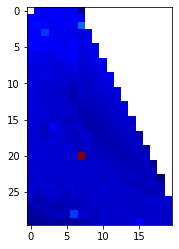

In [ ]:
print(np.mean(datos_oct[0:2,:,:], axis=0).shape)
plt.imshow(np.mean(datos_oct[0:2,:,:], axis=0),cmap='jet')

In [ ]:
x1= np.arange(5+0.5, 25+0.5,1)
y1= list(np.arange(-40+0.5, -10+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
SST_oct=basemap.interp(datain=reanal.sel(month=10).SSS.values, xin=reanal.sel(month=10).lon.values,
                       yin=reanal.sel(month=10).lat.values,xout=X_t, yout=Y_t, order=1, masked= True)

(30, 20)


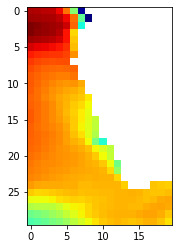

In [ ]:
print(SST_oct.shape)
plt.imshow(SST_oct,cmap='jet')

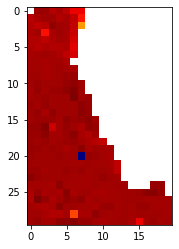

In [ ]:
# Diferencia entre modelo y ARGO
plt.imshow(SST_oct-np.mean(datos_oct[0:2,:,:], axis=0),cmap='jet')

## Validacion-Noviembre

In [ ]:
noviembre= interpolador_capas(dataframe= lista_dfs[10], max_depth= 100, intervalo=1)
noviembre

Intento fallido en Id: 6900707 Ciclo 1
Intento fallido en Id: 3901901 Ciclo 70
Intento fallido en Id: 3901901 Ciclo 71
Intento fallido en Id: 3901901 Ciclo 72
Intento fallido en Id: 3901964 Ciclo 78
Intento fallido en Id: 3901964 Ciclo 76
Intento fallido en Id: 3901964 Ciclo 77
Intento fallido en Id: 3901869 Ciclo 73
Intento fallido en Id: 3901869 Ciclo 75
Intento fallido en Id: 3901869 Ciclo 1
Intento fallido en Id: 3901869 Ciclo 2
Intento fallido en Id: 6902631 Ciclo 1
Intento fallido en Id: 3901903 Ciclo 72
Intento fallido en Id: 3901903 Ciclo 70
Intento fallido en Id: 3901903 Ciclo 71
Intento fallido en Id: 3901847 Ciclo 75
Intento fallido en Id: 3901847 Ciclo 76
Intento fallido en Id: 3901847 Ciclo 77
Intento fallido en Id: 3901846 Ciclo 77
Intento fallido en Id: 3901846 Ciclo 76
Intento fallido en Id: 3901846 Ciclo 75
Intento fallido en Id: 3901846 Ciclo 4
Intento fallido en Id: 3901846 Ciclo 3
Intento fallido en Id: 3901846 Ciclo 2
Intento fallido en Id: 3901870 Ciclo 75
Intento

Lon     Lat  Presion_interp   S_interp
0        5.036 -26.514               0  35.842792
1        5.036 -26.514               1  35.841644
2        5.036 -26.514               2  35.840495
3        5.036 -26.514               3  35.839346
4        5.036 -26.514               4  35.838198
...        ...     ...             ...        ...
157353  24.975 -37.064              96        NaN
157354  24.975 -37.064              97        NaN
157355  24.975 -37.064              98        NaN
157356  24.975 -37.064              99        NaN
157357  24.975 -37.064             100        NaN

[157358 rows x 4 columns]

In [ ]:
%%time
import scipy
from scipy.interpolate import griddata
ds_final= noviembre #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_nov = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(5+0.5,25+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(-40+0.5, -10+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0=griddata(points,values, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur -Norte
  grid_z0_1=np.flip(grid_z0, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_nov.append(grid_z0_1)
datos_nov = np.stack(datos_nov)
#print(datos)
print(datos_nov.shape) 

(100, 30, 20)
CPU times: user 2.99 s, sys: 2.86 s, total: 5.85 s
Wall time: 3.03 s


(30, 20)


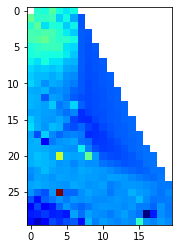

In [ ]:
print(np.mean(datos_nov[0:2,:,:], axis=0).shape)
plt.imshow(np.mean(datos_nov[0:2,:,:], axis=0),cmap='jet')

In [ ]:
x1= np.arange(5+0.5, 25+0.5,1)
y1= list(np.arange(-40+0.5, -10+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
SST_nov=basemap.interp(datain=reanal.sel(month=11).SSS.values, xin=reanal.sel(month=11).lon.values,
                       yin=reanal.sel(month=11).lat.values,xout=X_t, yout=Y_t, order=1, masked= True)

(30, 20)


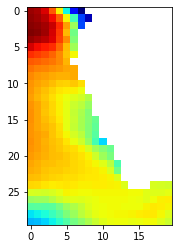

In [ ]:
print(SST_nov.shape)
plt.imshow(SST_nov,cmap='jet')

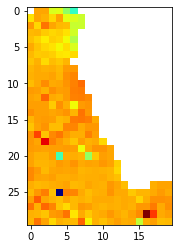

In [ ]:
# Diferencia entre modelo y ARGO
plt.imshow(SST_nov-np.mean(datos_nov[0:2,:,:], axis=0),cmap='jet')

## Validacion-Diciembre

In [ ]:
diciembre= interpolador_capas(dataframe= lista_dfs[11], max_depth= 100, intervalo=1)
diciembre

Intento fallido en Id: 3901846 Ciclo 80
Intento fallido en Id: 3901846 Ciclo 79
Intento fallido en Id: 3901846 Ciclo 78
Intento fallido en Id: 3901846 Ciclo 5
Intento fallido en Id: 3901846 Ciclo 6
Intento fallido en Id: 3901846 Ciclo 7
Intento fallido en Id: 3901903 Ciclo 75
Intento fallido en Id: 3901903 Ciclo 74
Intento fallido en Id: 3901903 Ciclo 73
Intento fallido en Id: 3901903 Ciclo 2
Intento fallido en Id: 3901903 Ciclo 1
Intento fallido en Id: 3901964 Ciclo 79
Intento fallido en Id: 3901964 Ciclo 81
Intento fallido en Id: 3901964 Ciclo 80
Intento fallido en Id: 5902281 Ciclo 0
Intento fallido en Id: 3901901 Ciclo 73
Intento fallido en Id: 3901901 Ciclo 2
Intento fallido en Id: 3901901 Ciclo 74
Intento fallido en Id: 3901901 Ciclo 75
Intento fallido en Id: 3901901 Ciclo 1
Intento fallido en Id: 6900728 Ciclo 0
Intento fallido en Id: 6900727 Ciclo 0
Intento fallido en Id: 3901869 Ciclo 76
Intento fallido en Id: 3901869 Ciclo 77
Intento fallido en Id: 3901869 Ciclo 5
Intento fal

Lon     Lat  Presion_interp   S_interp
0        5.005 -27.089               0  35.756691
1        5.005 -27.089               1  35.754441
2        5.005 -27.089               2  35.752190
3        5.005 -27.089               3  35.749940
4        5.005 -27.089               4  35.747689
...        ...     ...             ...        ...
168160  24.977 -39.347              96  35.244355
168161  24.977 -39.347              97  35.239936
168162  24.977 -39.347              98  35.235618
168163  24.977 -39.347              99  35.231413
168164  24.977 -39.347             100        NaN

[168165 rows x 4 columns]

In [ ]:
%%time
import scipy
from scipy.interpolate import griddata
ds_final= diciembre #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_dic = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(5+0.5,25+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(-40+0.5, -10+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0=griddata(points,values, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur -Norte
  grid_z0_1=np.flip(grid_z0, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_dic.append(grid_z0_1)
datos_dic = np.stack(datos_dic)
#print(datos)
print(datos_dic.shape) 

(100, 30, 20)
CPU times: user 3.32 s, sys: 3.06 s, total: 6.38 s
Wall time: 3.34 s


(30, 20)


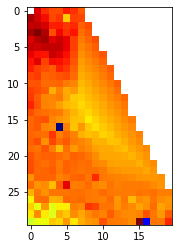

In [ ]:
print(np.mean(datos_dic[0:2,:,:], axis=0).shape)
plt.imshow(np.mean(datos_dic[0:2,:,:], axis=0),cmap='jet')

In [ ]:
x1= np.arange(5+0.5, 25+0.5,1)
y1= list(np.arange(-40+0.5, -10+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
SST_dic=basemap.interp(datain=reanal.sel(month=12).SSS.values, xin=reanal.sel(month=12).lon.values,
                       yin=reanal.sel(month=12).lat.values,xout=X_t, yout=Y_t, order=1, masked= True)

(30, 20)


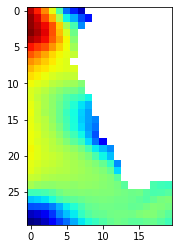

In [ ]:
print(SST_dic.shape)
plt.imshow(SST_dic,cmap='jet')

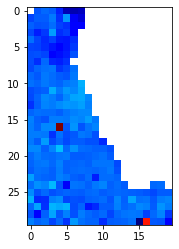

In [ ]:
# Diferencia entre modelo y ARGO
plt.imshow(SST_dic-np.mean(datos_dic[0:2,:,:], axis=0),cmap='jet')

## Diagrama de Taylor  

In [ ]:
STD_m =[]
CORRCOEF = []
RMSE=[]
Meses=['January','February','March','April','May','June','July','August','September','October','November','December']
MARCADORES = ['s', 'v', 'X', '*', 'D','.','^','<','>','1','2','3','4','8','p','P','h','H','d']
COLORES = plt.cm.get_cmap('nipy_spectral', 24)
MODELOS=[SST_jan,SST_feb,SST_mar,SST_abr,SST_may,SST_jun,SST_jul,SST_ago,SST_sep,SST_oct,SST_nov, SST_dic]
ARGO=[np.mean(datos_jan[0:2,:,:], axis=0),np.mean(datos_feb[0:2,:,:], axis=0),np.mean(datos_mar[0:2,:,:], axis=0),
      np.mean(datos_abr[0:2,:,:], axis=0),np.mean(datos_may[0:2,:,:], axis=0),np.mean(datos_jun[0:2,:,:], axis=0),
      np.mean(datos_jul[0:2,:,:], axis=0),np.mean(datos_ago[0:2,:,:], axis=0),np.mean(datos_sep[0:2,:,:], axis=0),
      np.mean(datos_oct[0:2,:,:], axis=0),np.mean(datos_nov[0:2,:,:], axis=0),np.mean(datos_dic[0:2,:,:], axis=0)]
for k in range(1,12+1,1):
  # Extraccion de datos de modelo y satelite
  modelo= MODELOS[k-1]# aplicar media en dimension tiempo
  satelite= ARGO[k-1] # aplicar media en dimension tiempo
  # Sacar los indices que comparten en el espacio
  IND = np.invert(np.isnan(satelite) | np.isnan(modelo))
  P = modelo[IND] # Modelo
  A = satelite[IND] # Referencia Era
  DD = np.ma.std(A.ravel()) # Desviacion estandar Referencia
  P = P/DD # Normalizacion por Std referencia
  A = A/DD 
  STD_m.append(np.ma.std(P.ravel()))
  CORRCOEF.append(np.ma.corrcoef(P.ravel(), A.ravel()).data[0,1])
  RMSE.append(np.sqrt(np.mean((P-A)**2)))

In [29]:
dfr=pd.DataFrame({'STD':STD_m,'CORR':CORRCOEF,'RMSE':RMSE,'Mes':Meses})
dfr['STD']=[0.753075,0.528268,0.836697,0.952523,0.865013,0.759011,0.856931,0.931552,0.978589,0.935503,0.880888,0.775927]
dfr['CORR']=[0.876618,0.604624,0.829100,0.775721,0.761308,0.857367,0.861526,0.855521,0.880790,0.836048,0.789379,0.805696]
dfr['RMSE']=[0.566026,0.801088,0.591434,0.697356,0.736901,0.626993,0.578823,0.604512,0.585606,0.634356,0.688549,0.667731]
dfr

STD      CORR      RMSE        Mes
0   0.753075  0.876618  0.566026    January
1   0.528268  0.604624  0.801088   February
2   0.836697  0.829100  0.591434      March
3   0.952523  0.775721  0.697356      April
4   0.865013  0.761308  0.736901        May
5   0.759011  0.857367  0.626993       June
6   0.856931  0.861526  0.578823       July
7   0.931552  0.855521  0.604512     August
8   0.978589  0.880790  0.585606  September
9   0.935503  0.836048  0.634356    October
10  0.880888  0.789379  0.688549   November
11  0.775927  0.805696  0.667731   December

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/'
dfr.to_csv('Datos_Taylor_Validacion_Salinidad_Benguela.csv',index=False)

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM


In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/'
from taylorDiagram_mod import TaylorDiagram as TaDiM

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM


In [49]:
dfr=pd.read_csv('Datos_Taylor_Validacion_Salinidad_Benguela.csv')
STD_m =list(dfr.STD)
CORRCOEF =list(dfr.CORR)
RMSE=list(dfr.RMSE)
Meses=['January','February','March','April','May','June','July','August','September','October','November','December']
MARCADORES = ['s', 'v', 'X', '*', 'D','.','^','<','>','1','2','3','4','8','p','P','h','H','d']
dfr

STD      CORR      RMSE        Mes
0   0.753075  0.876618  0.566026    January
1   0.528268  0.604624  0.801088   February
2   0.836697  0.829100  0.591434      March
3   0.952523  0.775721  0.697356      April
4   0.865013  0.761308  0.736901        May
5   0.759011  0.857367  0.626993       June
6   0.856931  0.861526  0.578823       July
7   0.931552  0.855521  0.604512     August
8   0.978589  0.880790  0.585606  September
9   0.935503  0.836048  0.634356    October
10  0.880888  0.789379  0.688549   November
11  0.775927  0.805696  0.667731   December

Text(1.0, 0.21, 'RMSE')

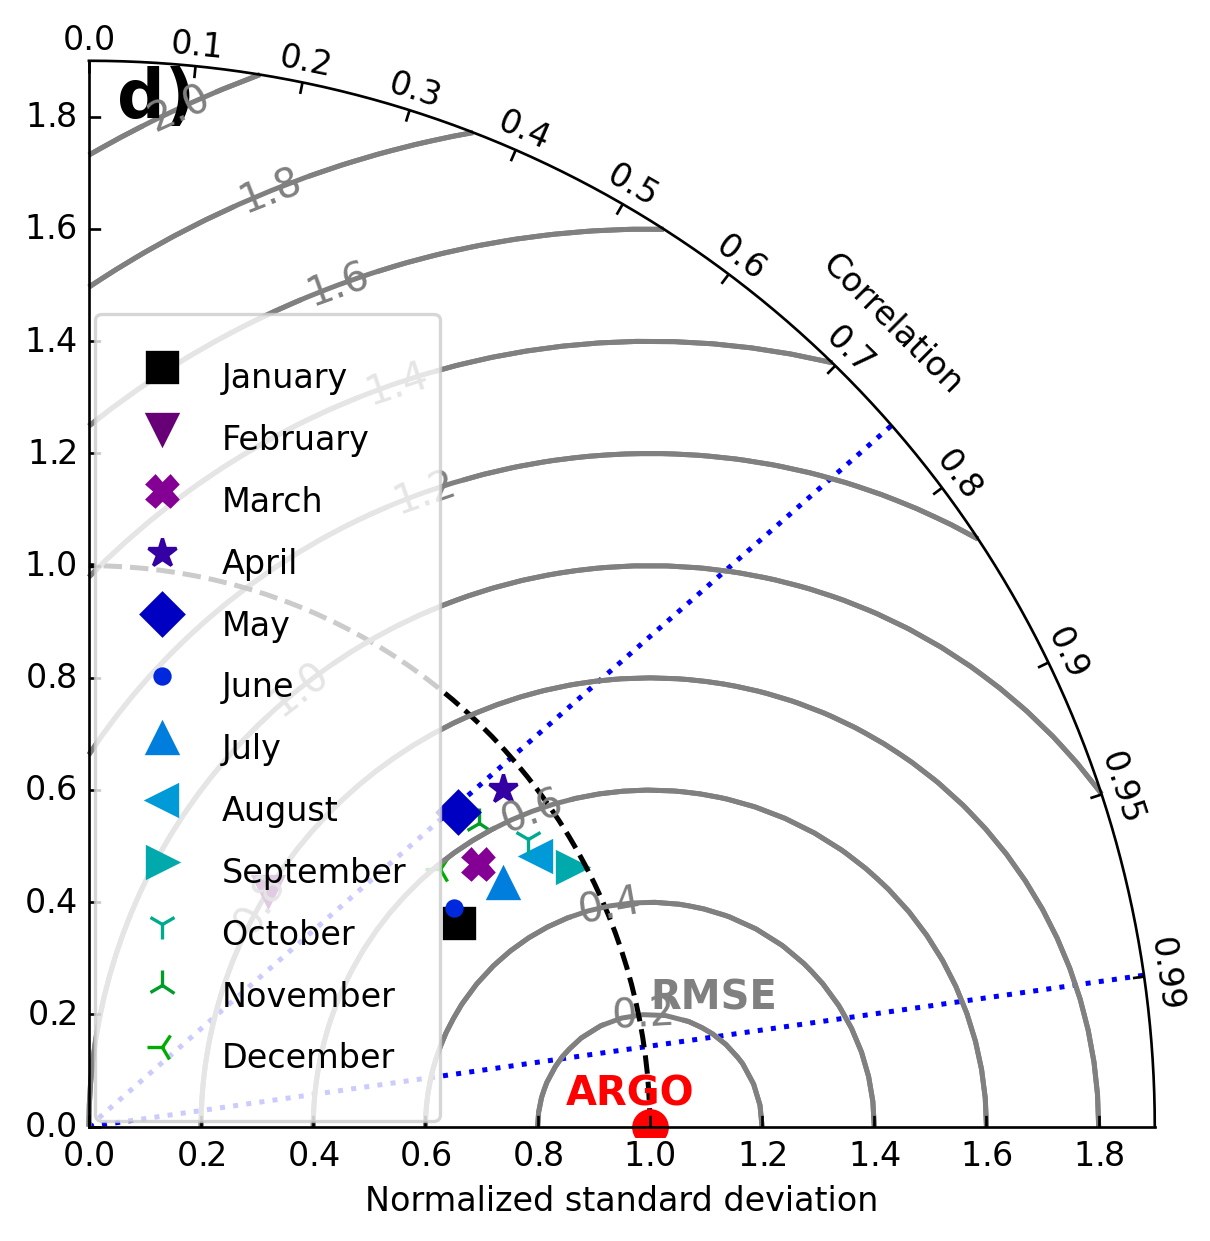

In [51]:
import numpy as NP
figID_Taylor = plt.figure(num=25, dpi=240)
figID_Taylor.set_size_inches(6., 6.)
TayDia = TaDiM(1, fig=figID_Taylor, rect=111, srange=(0., 1.9), label='ARGO')
pp=[]
for i in range(11+1):
  ttt=TayDia.add_sample(STD_m[i], CORRCOEF[i], marker=MARCADORES[i%len(MARCADORES)], linestyle='None', color=COLORES(i), ms=9)#, ax=axs.ravel()[i])
  pp.append(ttt)
contours = TayDia.add_contours(levels=10, colors='0.5')
contours = TayDia.add_contours(levels=10, colors='0.5')
plt.plot([0,NP.sqrt(1.9**2 -1.25**2)],[0,1.25], color='blue',linestyle=':') # correlacion 0.75
plt.plot([0,NP.sqrt(1.9**2 -0.27**2)],[0,0.27], color='blue',linestyle=':') # correlacion 0.99
TayDia.ax.clabel(contours, inline=1, fontsize=12, fmt='%.1f')
plt.legend(pp, Meses,  prop=dict(size='medium'), loc='lower left', borderpad=1.0, ncol=1,handleheight=2.4, labelspacing=0.05) # numpoints=1,
plt.text(0.85,0.04,'ARGO', color='red',weight='bold',fontsize=12)
#plt.text(0.85,0.35,'MMM', color='red',weight='bold')
plt.text(0.05,1.8,'d)', color='black',weight='bold', fontsize=20)
plt.text(1.00,0.21,'RMSE', color='gray',weight='bold',fontsize=12)

Text(1.0, 0.21, 'RMSE')

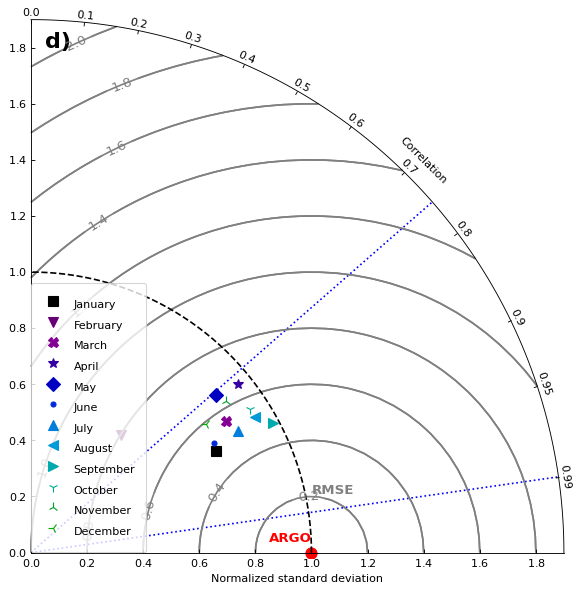

In [ ]:
import numpy as NP
figID_Taylor = plt.figure(num=11, dpi=80)
figID_Taylor.set_size_inches(9., 9.)
TayDia = TaDiM(1, fig=figID_Taylor, rect=111, srange=(0., 1.9), label='ARGO')
pp=[]
for i in range(11+1):
  ttt=TayDia.add_sample(STD_m[i], CORRCOEF[i], marker=MARCADORES[i%len(MARCADORES)], linestyle='None', color=COLORES(i), ms=9)#, ax=axs.ravel()[i])
  pp.append(ttt)
contours = TayDia.add_contours(levels=10, colors='0.5')
contours = TayDia.add_contours(levels=10, colors='0.5')
plt.plot([0,NP.sqrt(1.9**2 -1.25**2)],[0,1.25], color='blue',linestyle=':') # correlacion 0.75
plt.plot([0,NP.sqrt(1.9**2 -0.27**2)],[0,0.27], color='blue',linestyle=':') # correlacion 0.99
TayDia.ax.clabel(contours, inline=1, fontsize=12, fmt='%.1f')
plt.legend(pp, Meses,  prop=dict(size='medium'), loc='lower left', borderpad=1.0, ncol=1,handleheight=2.4, labelspacing=0.05) # numpoints=1,
plt.text(0.85,0.04,'ARGO', color='red',weight='bold',fontsize=12)
#plt.text(0.85,0.35,'MMM', color='red',weight='bold')
plt.text(0.05,1.8,'d)', color='black',weight='bold', fontsize=20)
plt.text(1.00,0.21,'RMSE', color='gray',weight='bold',fontsize=12)

Text(1.0, 0.21, 'RMSE')

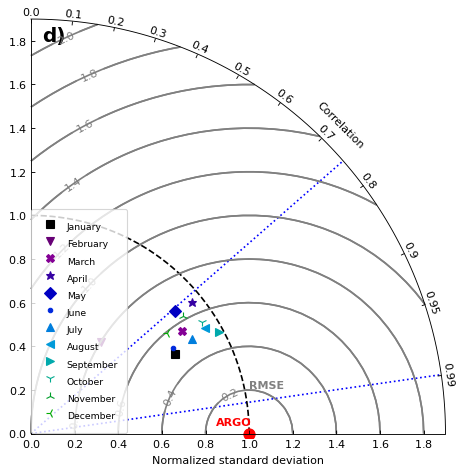

In [ ]:
import numpy as NP
figID_Taylor = plt.figure(num=11, dpi=80)
figID_Taylor.set_size_inches(7., 7.)
TayDia = TaDiM(1, fig=figID_Taylor, rect=111, srange=(0., 1.9), label='ARGO')
pp=[]
for i in range(11+1):
  ttt=TayDia.add_sample(STD_m[i], CORRCOEF[i], marker=MARCADORES[i%len(MARCADORES)], linestyle='None', color=COLORES(i), ms=8)#, ax=axs.ravel()[i])
  pp.append(ttt)
contours = TayDia.add_contours(levels=10, colors='0.5')
contours = TayDia.add_contours(levels=10, colors='0.5')
plt.plot([0,NP.sqrt(1.9**2 -1.25**2)],[0,1.25], color='blue',linestyle=':') # correlacion 0.75
plt.plot([0,NP.sqrt(1.9**2 -0.27**2)],[0,0.27], color='blue',linestyle=':') # correlacion 0.99
TayDia.ax.clabel(contours, inline=1, fontsize=10, fmt='%.1f')
plt.legend(pp, Meses,  prop=dict(size='small'), loc='lower left', borderpad=1.0, ncol=1,handleheight=2.4, labelspacing=0.05) # numpoints=1,
plt.text(0.85,0.04,'ARGO', color='red',weight='bold')
#plt.text(0.85,0.35,'MMM', color='red',weight='bold')
plt.text(0.05,1.8,'d)', color='black',weight='bold', fontsize=18)
plt.text(1.00,0.21,'RMSE', color='gray',weight='bold')

## Grafico de comparacion espacial

In [ ]:
!pip install cmocean
import cmocean

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


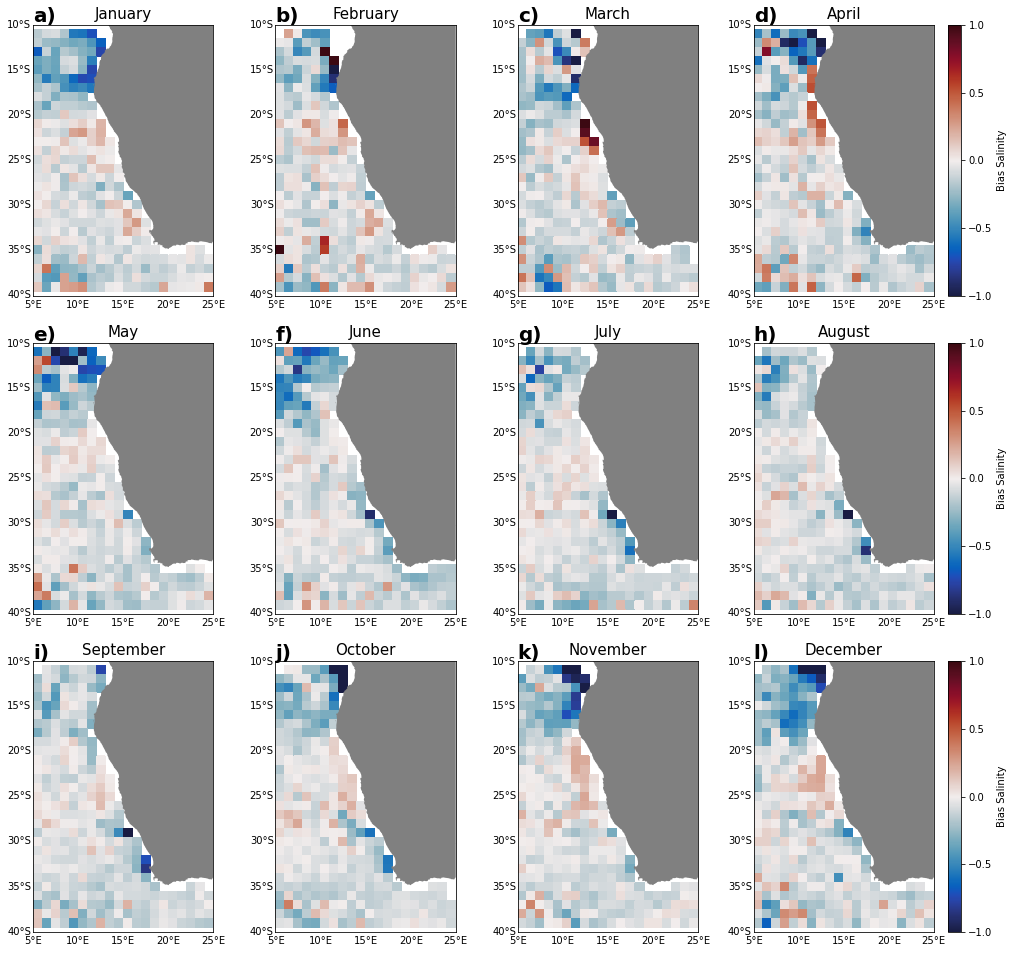

In [ ]:
import string
x1= np.arange(5, 25+0.5,1)
y1= list(np.arange(-40+0.5, -10+0.5,1));y1=y1[::-1];y1= np.array(y1)
ticks= np.array([-1,-0.5,0,0.5,1]) #labels para el colorbar
MODELOS=[SST_jan,SST_feb,SST_mar,SST_abr,SST_may,SST_jun,SST_jul,SST_ago,SST_sep,SST_oct,SST_nov, SST_dic]
ARGO=[np.mean(datos_jan[0:2,:,:], axis=0),np.mean(datos_feb[0:2,:,:], axis=0),np.mean(datos_mar[0:2,:,:], axis=0),
      np.mean(datos_abr[0:2,:,:], axis=0),np.mean(datos_may[0:2,:,:], axis=0),np.mean(datos_jun[0:2,:,:], axis=0),
      np.mean(datos_jul[0:2,:,:], axis=0),np.mean(datos_ago[0:2,:,:], axis=0),np.mean(datos_sep[0:2,:,:], axis=0),
      np.mean(datos_oct[0:2,:,:], axis=0),np.mean(datos_nov[0:2,:,:], axis=0),np.mean(datos_dic[0:2,:,:], axis=0)]
w=0.23;h=0.17
meses=['January','February','March','April','May','June','July','August','September','October','November','December']
# atributos [left, bottom, width,height] en escala (0,1)
list_o=[[0,0.9,w,h],[0.2,0.9,w,h],[0.4,0.9,w,h],[0.6,0.9,w,h],
        [0,0.70,w,h],[0.2,0.7,w,h],[0.4,0.7,w,h],[0.6,0.7,w,h],
        [0,0.5,w,h],[0.2,0.5,w,h],[0.4,0.5,w,h],[0.6,0.5,w,h],]
fig = plt.figure(figsize=(3.3*5.1,4.7*4.7)) # tamaño de figura
for i,j in zip(list_o,range(12)):
  ax = plt.axes(i)
  ax.text(0.,1.01,string.ascii_lowercase[j]+')',fontsize=20, fontweight = 'bold', transform = ax.transAxes)
  ax.set_title(meses[j], fontsize=15)
  m=Basemap(projection='cyl',llcrnrlon=5,llcrnrlat=-40,urcrnrlon=25,urcrnrlat=-10, resolution ='h')
  x, y = m(x1, y1)
  z= MODELOS[j]-ARGO[j]
  cmap= plt.get_cmap("jet")
  cs=m.pcolormesh(x1, y1, z,cmap=cmocean.cm.balance,shading='flat',latlon=True,vmin=-1, vmax=1)
  m.drawcoastlines(color='white',zorder=0)
  m.fillcontinents(color='grey',lake_color='grey')
  m.drawparallels(np.arange(-40,-9,5.),labels=[1,0,0,0],linewidth=0.0)
  m.drawmeridians([5,10,15,20,25],labels=[0,0,0,1],linewidth=0.0)
  if j in [3,7,11]:
    cbar=plt.colorbar(ticks=ticks)
    cbar.set_label('Bias Salinity', rotation=90)